In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

# Load Data

In [2]:
train = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/train.csv')
test = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/test.csv')
submission = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/sample_submission.csv')

In [3]:
#데이터 가공 전후의 비교를 위해 copy모듈을 이용하여 원본 데이터를 보존합니다.
import copy

raw_train = copy.deepcopy(train)
raw_test = copy.deepcopy(test)

## 피쳐 엔지니어링

In [4]:
# 전처리를 위해 임시로 concat
all_data = pd.concat((train,test),axis=0).reset_index(drop=True)

In [5]:
## 새로운 파생변수의 추가 ## 

all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

all_data.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

In [6]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data.drop(['YrBltAndRemod','YearBuilt', 'YearRemodAdd'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,No2ndFlr,NoBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500.0,2566.0,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500.0,2524.0,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500.0,2706.0,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000.0,2473.0,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000.0,3343.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,NaN,1638.0,False,False
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,NaN,1638.0,False,False
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,NaN,2448.0,True,False
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,NaN,1882.0,True,False


In [7]:
#빌딩 넘버는 수치적인 의미라기보단 범주형 의미

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)  
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

In [8]:
# 순서의 범주를 가지는 형태를 직접 값을 할당

Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = all_data[Basement]

Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt = Bsmt.replace(to_replace='No', value=1)
Bsmt = Bsmt.replace(to_replace='Mn', value=2)
Bsmt = Bsmt.replace(to_replace='Av', value=3)
Bsmt = Bsmt.replace(to_replace='Gd', value=4)

Bsmt = Bsmt.replace(to_replace='Unf', value=1)
Bsmt = Bsmt.replace(to_replace='LwQ', value=2)
Bsmt = Bsmt.replace(to_replace='Rec', value=3)
Bsmt = Bsmt.replace(to_replace='BLQ', value=4)
Bsmt = Bsmt.replace(to_replace='ALQ', value=5)
Bsmt = Bsmt.replace(to_replace='GLQ', value=6)

In [9]:
## Score 파생 변수 ##

# 점수부여, 곱
Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore'] = Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore'] = Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

all_data.drop(Basement, axis=1, inplace=True)



In [10]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)
all_data['LotScore']=Lot['LotScore']

all_data.drop(lot, axis=1, inplace=True)

In [11]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)


Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [12]:
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish'])*(Garage['GarageQual']) * \
(Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']


all_data.drop(garage, axis=1, inplace=True)

In [13]:
### 선형회귀를 위한 log transformation ###
# target log transformation
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

### 결측치

In [14]:
missing_value = train.isnull().sum().sort_values(ascending=False) 
missing_value = missing_value[missing_value !=0]

pd.DataFrame({'percentage': missing_value / len(train) * 100 ,  'value' : missing_value})

,percentage,value
PoolQC,99.520548,1453
MiscFeature,96.301370,1406
Alley,93.767123,1369
Fence,80.753425,1179
MasVnrType,59.726027,872
FireplaceQu,47.260274,690
LotFrontage,17.739726,259
GarageYrBlt,5.547945,81
GarageCond,5.547945,81
GarageType,5.547945,81


In [15]:
all_data.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)  # 결측치가 과도한 칼럼은 삭제

In [16]:
all_data.mean(numeric_only=True)

OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
SalePrice           12.024057
TotalSF           2548.048663
No2ndFlr             0.571429
NoBsmt               0.026721
YrBltAndRemod     3955.577252
BsmtScore        12088.153792
BsmtFinScore      2498.021134
BsmtDNF              0.291538
LotScore            13.245125
NoGarage             0.053786
GarageScore      35469.460145
dtype: flo

In [17]:
# Numerical 칼럼은 평균으로 대체
all_data.fillna(all_data.mean(numeric_only=True), inplace=True)

In [18]:
# 트리 모델용 dataset을 만들어 둡니다.
tree_data = copy.deepcopy(all_data)

print(tree_data.shape)

(2919, 64)


In [19]:
# Categorical 칼럼의 결측치 처리 및 원핫 인코딩
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

print('원핫 인코딩전 shape :', all_data.shape)

cat_cols = [col for col in all_data.columns if all_data[col].dtypes == 'object']
num_cols = [col for col in all_data.columns if all_data[col].dtypes != 'object']

ohe.fit(all_data[cat_cols]) #엄밀하게는 train
encoded_columns = ohe.transform(all_data[cat_cols])
feature_names = ohe.get_feature_names_out()  
encoded_columns = pd.DataFrame(encoded_columns, columns=feature_names)

all_data.drop(cat_cols, axis=1, inplace=True)

# 원래의 데이터와 인코딩 데이터 결합
all_data = pd.concat([all_data, encoded_columns], axis=1)

print('원핫 인코딩 이후 shape :', all_data.shape)


원핫 인코딩전 shape : (2919, 64)
원핫 인코딩 이후 shape : (2919, 262)


In [20]:
# 완전 공선성의 해결을 위해  nan칼럼을 지웁니다.
def nan_col_remover(df):
    for col in df:
        if 'nan' in col:
            df.drop(col, axis=1, inplace=True)
    print('제거 이후의 shape: ' , df.shape)

nan_col_remover(all_data)

제거 이후의 shape:  (2919, 252)


In [21]:
# 수치형 변수 칼럼의 skewness를 조절합니다.
from scipy.stats import skew

skew_features = all_data[num_cols].apply(lambda x: skew(x))
# skewness가 1 이상인 칼럼 추출
skew_features_top = skew_features[skew_features>1]

In [22]:
#skew feature의 log transformation
all_data[skew_features_top.index] = np.log1p(all_data[skew_features_top.index])
tree_data[skew_features_top.index] = np.log1p(tree_data[skew_features_top.index])

In [23]:
#데이터의 shape 확인
print(train.shape, test.shape)
train=all_data[:len(train)]
test=all_data[len(train):]
print(train.shape, test.shape)
tree_train = tree_data[:len(train)]
tree_test = tree_data[len(train):]
print(tree_train.shape, tree_test.shape)

(1460, 81) (1459, 80)
(1460, 252) (1459, 252)
(1460, 64) (1459, 64)


## 선형 회귀 모델

In [24]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변한된 RMSE(RMSLE):', np.round(rmse,3))
    return mse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train['SalePrice']
X_features = train.drop('SalePrice', axis=1 , inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [26]:
# Model define

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) 

LinearRegression 로그 변한된 RMSE(RMSLE): 163783.184
Ridge 로그 변한된 RMSE(RMSLE): 0.128
Lasso 로그 변한된 RMSE(RMSLE): 0.328


[26824931203.252716, 0.016380823240575142, 0.10760550353773349]

In [27]:
def get_coef(model, n =10):  #coefficient값이 높거나 낮은 상위 n개의 값을 가져옵니다.
    coef = pd.Series(model.coef_, index= X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low 

def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()

    for i,model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])

        axs[i].set_title(model.__class__.__name__ + 'Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)

        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

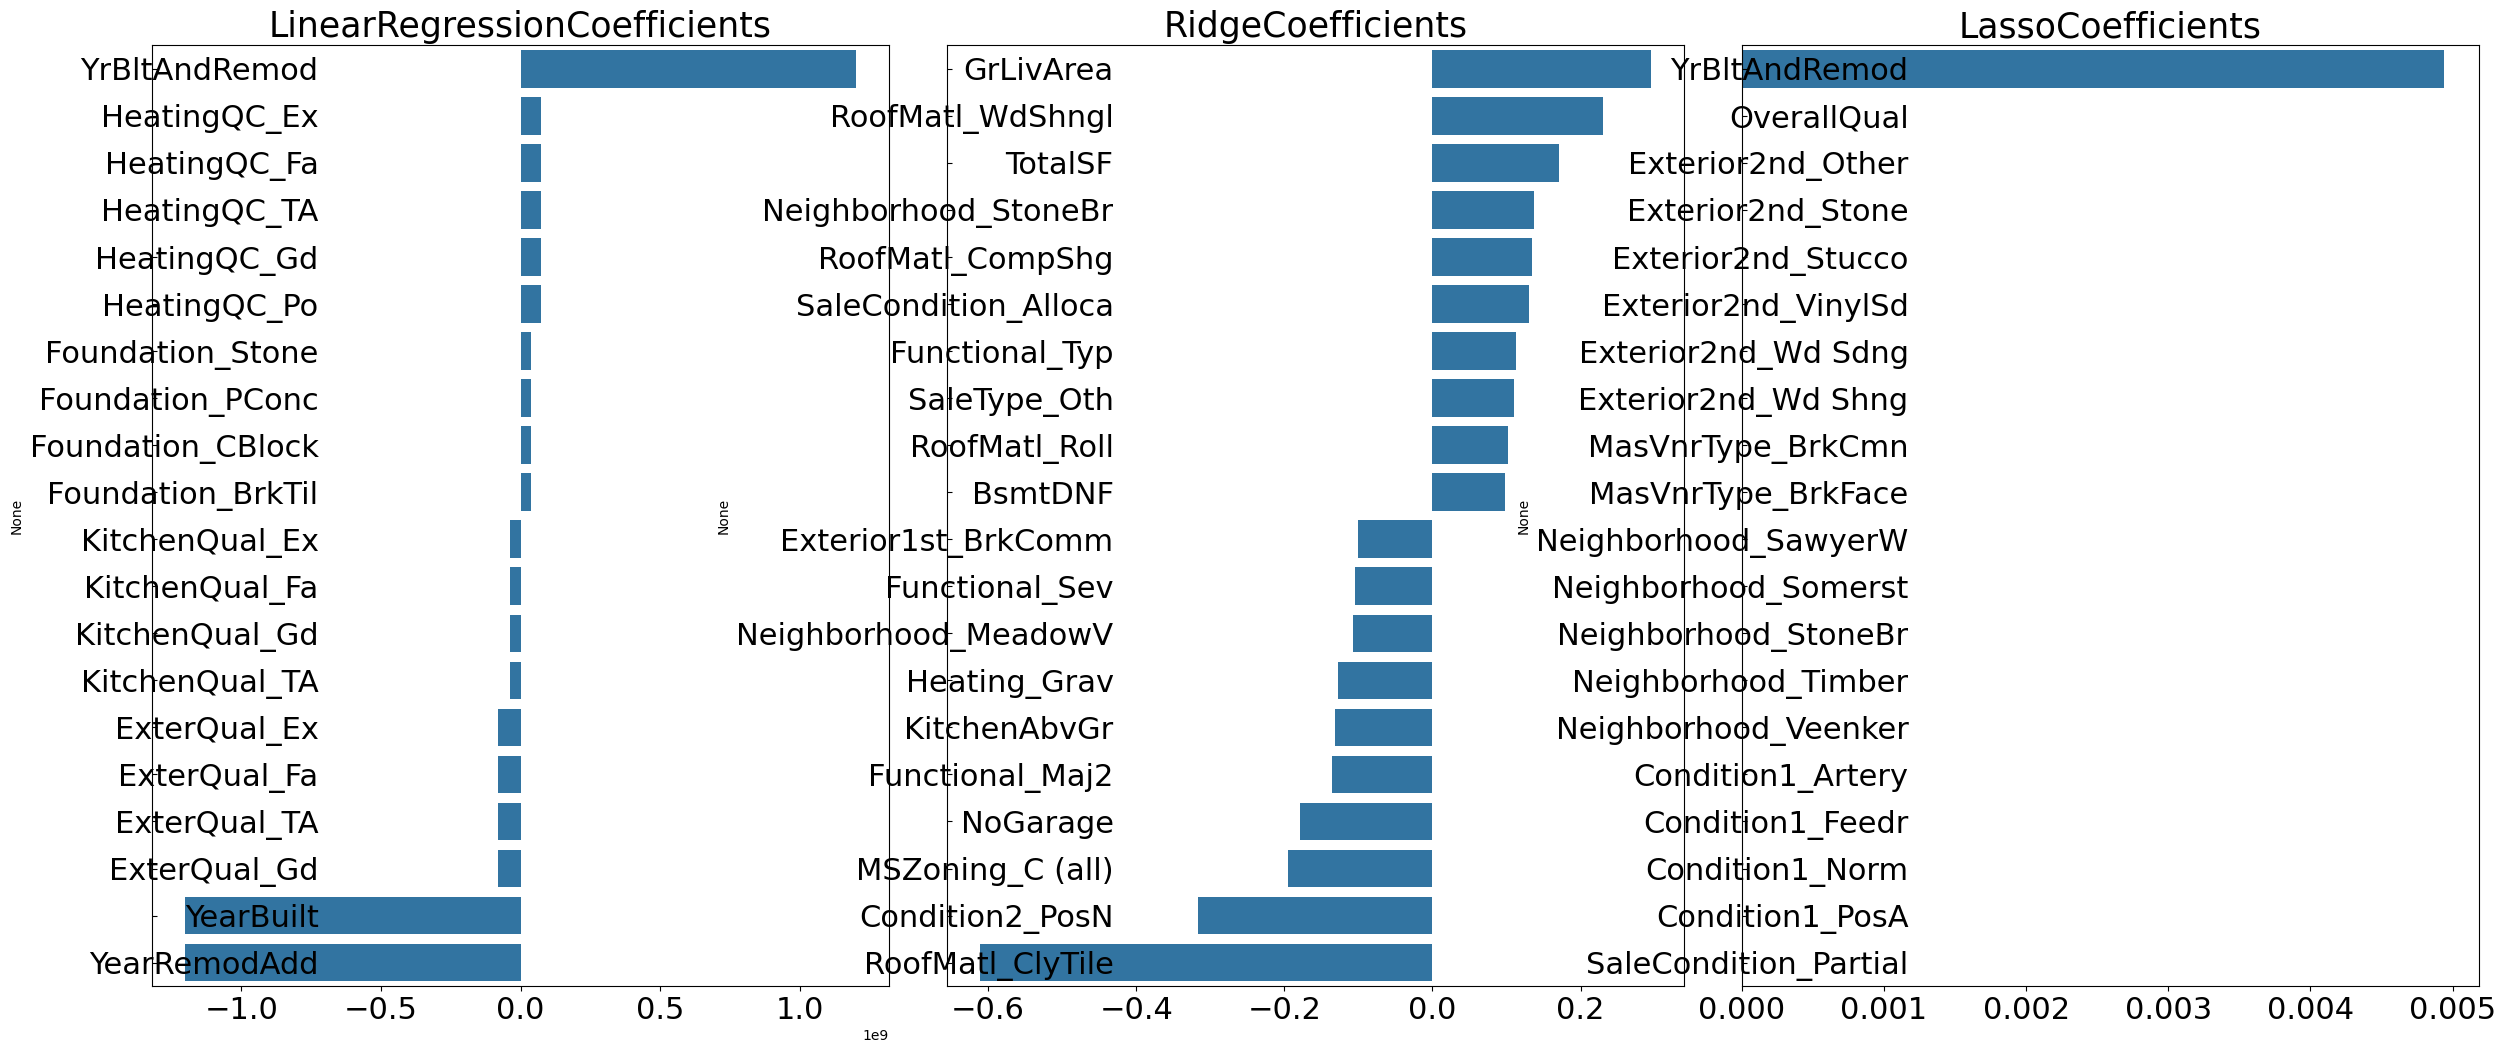

In [28]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

In [29]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring= 'neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))


In [30]:
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

In [31]:
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.13, 최적 alpha : {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE값 : 0.1281, 최적 alpha : {'alpha': 0.001}


In [32]:
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(X_train,y_train)

models = [ridge_reg, lasso_reg]
get_rmses(models)

Ridge 로그 변한된 RMSE(RMSLE): 0.131
Lasso 로그 변한된 RMSE(RMSLE): 0.132


[0.01711566225426594, 0.017499707761586682]

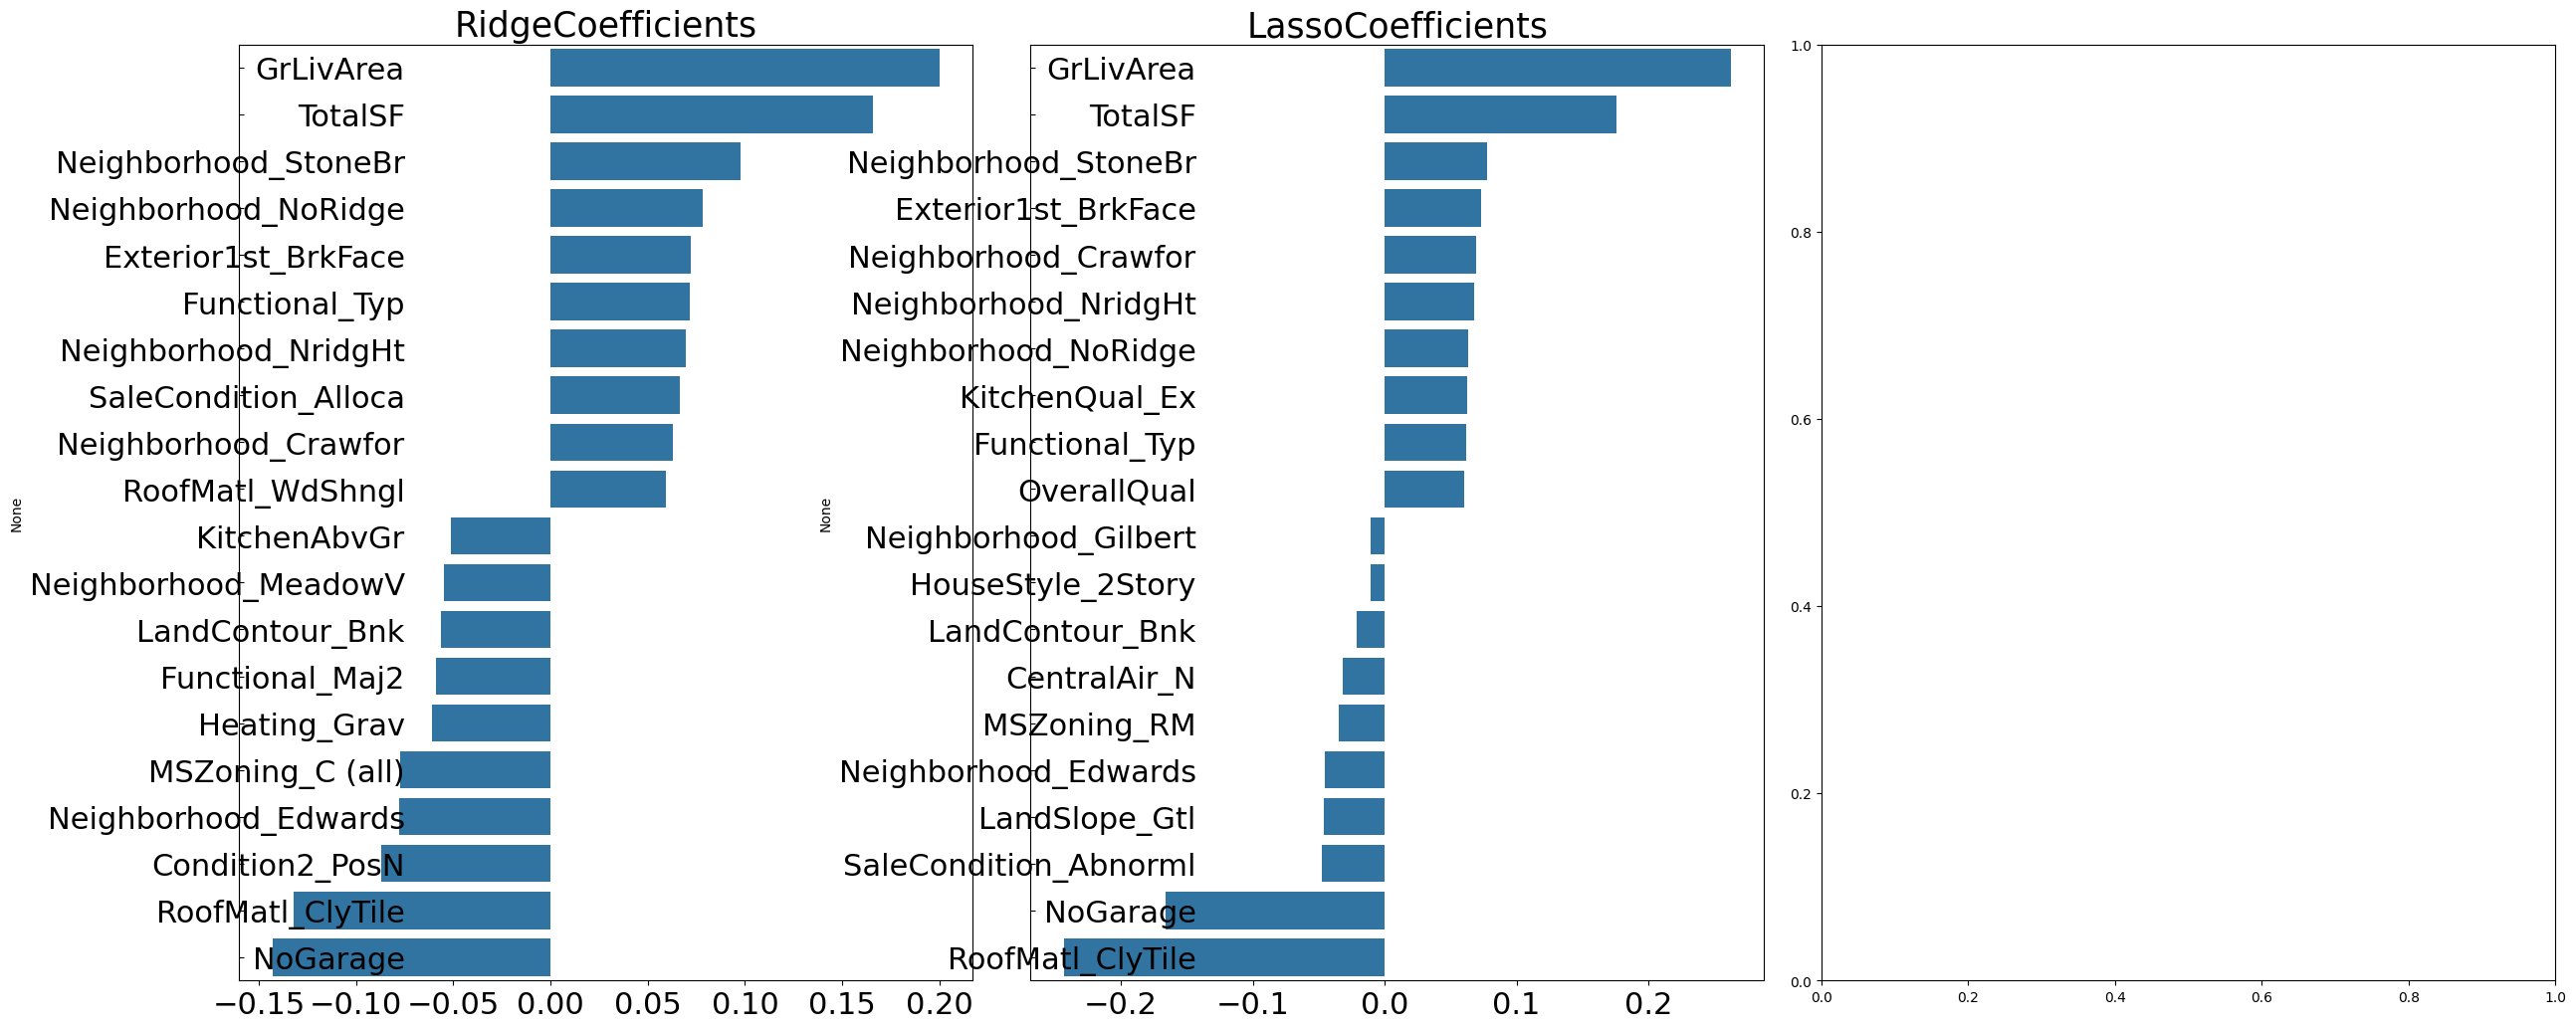

In [33]:
visualize_coef(models)

## 트리계열

In [34]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate = 0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE값 : 0.1219, 최적 alpha : {'n_estimators': 1000}


In [35]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)

print_best_params(lgbm_reg,lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 161
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 157
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found

### 범주형 변수의 원핫 인코딩을 적용하지 않고 처리

In [36]:
tree_train.isnull().sum().sort_values(ascending=False)

MasVnrType      872
FireplaceQu     690
Electrical        1
MSSubClass        0
PoolArea          0
               ... 
CentralAir        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
GarageScore       0
Length: 64, dtype: int64

In [37]:
tree_train['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [38]:
tree_train['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [39]:
# tree data중 처리되지 않은 결측치 칼럼 핸들링이 어려울 것 같아 일단 drop하기로 결정
tree_train.drop(['MasVnrType','FireplaceQu'],axis=1,inplace=True)
tree_test.drop(['MasVnrType','FireplaceQu'],axis=1,inplace=True)
tree_data.drop(['MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [40]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(tree_train, y_target, test_size=0.2, random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

def print_best_tree_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring= 'neg_mean_squared_error', cv=5)  
    grid_model.fit(X_tree_train, y_tree_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

In [42]:
cat_cols.remove('MasVnrType')
cat_cols.remove('FireplaceQu')

In [44]:
##lightgbm사용시 pandas DataFrame의 범주형 칼럼들을 'category'로 명시해 주어야아함.

for col in X_tree_train[cat_cols].columns:
    X_tree_train[col] = X_tree_train[col].astype('category')
    X_tree_test[col] = X_tree_test[col].astype('category')
    tree_test[cat_cols] = tree_test[cat_cols].astype('category')

In [45]:
print_best_tree_params(lgbm_reg,lgbm_params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 57
[LightGBM] [Info] Start training from score 12.029314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2648
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 56
[LightGBM] [Info] Start training from score 12.020798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

## Optuna

In [72]:
# lightgbm+optuna
import optuna
import lightgbm as lgb

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "verbosity" : -1,
        "boosting_type" : "gbdt",
        "learning_rate" : trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth" : trial.suggest_int("max_depth", 1,10),
        "num_leaves" : trial.suggest_int("num_leaves", 2,256),
        "subsample" : trial.suggest_float("subsample", 0.05,1.0),
        "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.05,1.0),
        "min_child_weight" : trial.suggest_int("min_child_weight", 1, 20),
        "reg_alpha" : trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda" : trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True)
    }

    model = lgb.train(params, dtrain, valid_sets=[dvalid], num_boost_round=1000,
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])
    predictions = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


In [73]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-03-27 03:03:49,242] A new study created in memory with name: no-name-3d1ac1b3-3ca2-4cb3-a4b1-e50c71812be1


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:49,752] Trial 0 finished with value: 0.13739455963748357 and parameters: {'learning_rate': 0.028015914800356565, 'max_depth': 10, 'num_leaves': 125, 'subsample': 0.7092585434272801, 'colsample_bytree': 0.35498262232307404, 'min_child_weight': 17, 'reg_alpha': 0.08069944014485476, 'reg_lambda': 0.005763846807131295}. Best is trial 0 with value: 0.13739455963748357.


Early stopping, best iteration is:
[421]	valid_0's rmse: 0.137395
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:50,301] Trial 1 finished with value: 0.18575836116784383 and parameters: {'learning_rate': 0.0024286830595512997, 'max_depth': 8, 'num_leaves': 80, 'subsample': 0.878112787841529, 'colsample_bytree': 0.5942362488296085, 'min_child_weight': 13, 'reg_alpha': 2.5063867946785257, 'reg_lambda': 1.1705383940971583}. Best is trial 0 with value: 0.13739455963748357.
[I 2024-03-27 03:03:50,427] Trial 2 finished with value: 0.13681197199814224 and parameters: {'learning_rate': 0.06544671735260403, 'max_depth': 6, 'num_leaves': 64, 'subsample': 0.8348566836539032, 'colsample_bytree': 0.5793929316845681, 'min_child_weight': 14, 'reg_alpha': 0.00740341740268782, 'reg_lambda': 0.004958380098146492}. Best is trial 2 with value: 0.13681197199814224.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.185758
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[199]	valid_0's rmse: 0.136812
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:50,616] Trial 3 finished with value: 0.278460508536019 and parameters: {'learning_rate': 0.001067250192428261, 'max_depth': 2, 'num_leaves': 124, 'subsample': 0.9731754126730805, 'colsample_bytree': 0.8412542011686567, 'min_child_weight': 5, 'reg_alpha': 7.670728954861562, 'reg_lambda': 0.008408237684377295}. Best is trial 2 with value: 0.13681197199814224.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.278461
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:51,049] Trial 4 finished with value: 0.13914693936091965 and parameters: {'learning_rate': 0.027904777094998574, 'max_depth': 7, 'num_leaves': 242, 'subsample': 0.19795061932675923, 'colsample_bytree': 0.704923925086011, 'min_child_weight': 1, 'reg_alpha': 0.29634284184760973, 'reg_lambda': 8.451785221602972}. Best is trial 2 with value: 0.13681197199814224.


Early stopping, best iteration is:
[667]	valid_0's rmse: 0.139147
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:51,912] Trial 5 finished with value: 0.2250665106124795 and parameters: {'learning_rate': 0.0012276393668292313, 'max_depth': 9, 'num_leaves': 113, 'subsample': 0.6393070917931865, 'colsample_bytree': 0.20281776087057757, 'min_child_weight': 20, 'reg_alpha': 0.01303891387168383, 'reg_lambda': 0.03137951365895904}. Best is trial 2 with value: 0.13681197199814224.
[I 2024-03-27 03:03:52,044] Trial 6 finished with value: 0.14062072103721918 and parameters: {'learning_rate': 0.05640366685405604, 'max_depth': 8, 'num_leaves': 215, 'subsample': 0.6766373346111781, 'colsample_bytree': 0.8885440998763112, 'min_child_weight': 16, 'reg_alpha': 0.053021436142091385, 'reg_lambda': 0.29512274324455406}. Best is trial 2 with value: 0.13681197199814224.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.225067
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	valid_0's rmse: 0.140621


[I 2024-03-27 03:03:52,207] Trial 7 finished with value: 0.1337164932378516 and parameters: {'learning_rate': 0.07669785954794059, 'max_depth': 2, 'num_leaves': 58, 'subsample': 0.4628845558285754, 'colsample_bytree': 0.23885643200516365, 'min_child_weight': 14, 'reg_alpha': 0.1468857215708689, 'reg_lambda': 1.155374248615646}. Best is trial 7 with value: 0.1337164932378516.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[774]	valid_0's rmse: 0.133716
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:52,482] Trial 8 finished with value: 0.13470630423842098 and parameters: {'learning_rate': 0.011971153235390213, 'max_depth': 3, 'num_leaves': 43, 'subsample': 0.536361768511661, 'colsample_bytree': 0.15737980846616567, 'min_child_weight': 6, 'reg_alpha': 0.01652681979612311, 'reg_lambda': 0.00419748160166464}. Best is trial 7 with value: 0.1337164932378516.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.134706
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.148597


[I 2024-03-27 03:03:52,680] Trial 9 finished with value: 0.14859715420786918 and parameters: {'learning_rate': 0.031294780429671244, 'max_depth': 1, 'num_leaves': 176, 'subsample': 0.8533848171881588, 'colsample_bytree': 0.25566088519932473, 'min_child_weight': 9, 'reg_alpha': 2.0058769892219517, 'reg_lambda': 1.073713069259803}. Best is trial 7 with value: 0.1337164932378516.


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:52,970] Trial 10 finished with value: 0.1451777432182454 and parameters: {'learning_rate': 0.006237445466064104, 'max_depth': 3, 'num_leaves': 10, 'subsample': 0.2716524336976527, 'colsample_bytree': 0.4142011348560977, 'min_child_weight': 10, 'reg_alpha': 0.001586903792944366, 'reg_lambda': 7.844924068609077}. Best is trial 7 with value: 0.1337164932378516.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.145178
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:53,225] Trial 11 finished with value: 0.1517508693676657 and parameters: {'learning_rate': 0.008715587273427515, 'max_depth': 4, 'num_leaves': 4, 'subsample': 0.42973112332229707, 'colsample_bytree': 0.05455763147460013, 'min_child_weight': 6, 'reg_alpha': 0.4258408190414294, 'reg_lambda': 0.09117633074036706}. Best is trial 7 with value: 0.1337164932378516.
[I 2024-03-27 03:03:53,351] Trial 12 finished with value: 0.13562932707030548 and parameters: {'learning_rate': 0.09638765382619686, 'max_depth': 4, 'num_leaves': 53, 'subsample': 0.444034423796444, 'colsample_bytree': 0.10111611965822784, 'min_child_weight': 4, 'reg_alpha': 0.016206862589757252, 'reg_lambda': 0.001206956490620597}. Best is trial 7 with value: 0.1337164932378516.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.151751
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	valid_0's rmse: 0.135629


[I 2024-03-27 03:03:53,527] Trial 13 finished with value: 0.2001793545241651 and parameters: {'learning_rate': 0.004631544516268684, 'max_depth': 1, 'num_leaves': 40, 'subsample': 0.3424228064208829, 'colsample_bytree': 0.2567083737011857, 'min_child_weight': 8, 'reg_alpha': 0.0017804788285787914, 'reg_lambda': 0.5327839371683917}. Best is trial 7 with value: 0.1337164932378516.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.200179
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:53,868] Trial 14 finished with value: 0.13540504129501948 and parameters: {'learning_rate': 0.015164613651003104, 'max_depth': 4, 'num_leaves': 89, 'subsample': 0.5489452962326077, 'colsample_bytree': 0.4339095047949799, 'min_child_weight': 12, 'reg_alpha': 0.2851685674259681, 'reg_lambda': 0.049351875763314734}. Best is trial 7 with value: 0.1337164932378516.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.135405
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:54,203] Trial 15 finished with value: 0.13298882884351765 and parameters: {'learning_rate': 0.016680754794867837, 'max_depth': 3, 'num_leaves': 160, 'subsample': 0.06402652758801525, 'colsample_bytree': 0.17750978984451318, 'min_child_weight': 1, 'reg_alpha': 0.032510959191373145, 'reg_lambda': 0.0010870572450232812}. Best is trial 15 with value: 0.13298882884351765.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132989
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:54,559] Trial 16 finished with value: 0.13506059170063228 and parameters: {'learning_rate': 0.017593524287566564, 'max_depth': 5, 'num_leaves': 170, 'subsample': 0.14299143108198364, 'colsample_bytree': 0.3214600257910503, 'min_child_weight': 1, 'reg_alpha': 0.050315842437524926, 'reg_lambda': 2.6459925417401142}. Best is trial 15 with value: 0.13298882884351765.


Early stopping, best iteration is:
[730]	valid_0's rmse: 0.135061
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:54,784] Trial 17 finished with value: 0.13613128381455777 and parameters: {'learning_rate': 0.049292978184846827, 'max_depth': 2, 'num_leaves': 160, 'subsample': 0.08034104891354443, 'colsample_bytree': 0.5214367851942521, 'min_child_weight': 20, 'reg_alpha': 0.6916604379708989, 'reg_lambda': 0.22085735645129298}. Best is trial 15 with value: 0.13298882884351765.


Early stopping, best iteration is:
[866]	valid_0's rmse: 0.136131
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:55,039] Trial 18 finished with value: 0.1737686954520243 and parameters: {'learning_rate': 0.003837049767208405, 'max_depth': 2, 'num_leaves': 204, 'subsample': 0.3216642127789471, 'colsample_bytree': 0.1391538034873676, 'min_child_weight': 16, 'reg_alpha': 0.12696794078979787, 'reg_lambda': 0.0012022282367440465}. Best is trial 15 with value: 0.13298882884351765.
[I 2024-03-27 03:03:55,147] Trial 19 finished with value: 0.1421255010701368 and parameters: {'learning_rate': 0.08503666846702167, 'max_depth': 5, 'num_leaves': 148, 'subsample': 0.22883998413660553, 'colsample_bytree': 0.9759015957624835, 'min_child_weight': 3, 'reg_alpha': 0.003944308556558016, 'reg_lambda': 0.01640947561533166}. Best is trial 15 with value: 0.13298882884351765.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.173769
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's rmse: 0.142126
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:55,410] Trial 20 finished with value: 0.13179202070310872 and parameters: {'learning_rate': 0.03779981445319672, 'max_depth': 3, 'num_leaves': 102, 'subsample': 0.057499735656849016, 'colsample_bytree': 0.2900324122711775, 'min_child_weight': 11, 'reg_alpha': 0.03750875313776816, 'reg_lambda': 3.0782975275181137}. Best is trial 20 with value: 0.13179202070310872.


Early stopping, best iteration is:
[779]	valid_0's rmse: 0.131792
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:55,641] Trial 21 finished with value: 0.13172890413437952 and parameters: {'learning_rate': 0.03982160999425386, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.07039106323903287, 'colsample_bytree': 0.27526654544044016, 'min_child_weight': 11, 'reg_alpha': 0.0308124875321157, 'reg_lambda': 2.9954149438275195}. Best is trial 21 with value: 0.13172890413437952.
[I 2024-03-27 03:03:55,781] Trial 22 finished with value: 0.13384580043434371 and parameters: {'learning_rate': 0.03740670774794732, 'max_depth': 3, 'num_leaves': 99, 'subsample': 0.0625034512376371, 'colsample_bytree': 0.35139629520699245, 'min_child_weight': 12, 'reg_alpha': 0.030823714893535078, 'reg_lambda': 2.825261535450772}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[783]	valid_0's rmse: 0.131729
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	valid_0's rmse: 0.133846
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:56,147] Trial 23 finished with value: 0.13558777510785577 and parameters: {'learning_rate': 0.022868294676646295, 'max_depth': 6, 'num_leaves': 145, 'subsample': 0.13765970015334172, 'colsample_bytree': 0.4724195359055145, 'min_child_weight': 8, 'reg_alpha': 0.02799750911649239, 'reg_lambda': 3.437606380026756}. Best is trial 21 with value: 0.13172890413437952.
[I 2024-03-27 03:03:56,313] Trial 24 finished with value: 0.133134159202809 and parameters: {'learning_rate': 0.045475512232762715, 'max_depth': 4, 'num_leaves': 106, 'subsample': 0.14312706264454267, 'colsample_bytree': 0.2973907647248875, 'min_child_weight': 10, 'reg_alpha': 0.0036329619650125053, 'reg_lambda': 0.12056848779383691}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[772]	valid_0's rmse: 0.135588
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	valid_0's rmse: 0.133134
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:56,633] Trial 25 finished with value: 0.1320647064220415 and parameters: {'learning_rate': 0.019512164164276223, 'max_depth': 3, 'num_leaves': 193, 'subsample': 0.07411668169140725, 'colsample_bytree': 0.18576635820128623, 'min_child_weight': 12, 'reg_alpha': 0.006734668542700836, 'reg_lambda': 5.138207932357527}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.132065
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:56,855] Trial 26 finished with value: 0.14751616253201605 and parameters: {'learning_rate': 0.02102069062374673, 'max_depth': 1, 'num_leaves': 192, 'subsample': 0.19569434679907427, 'colsample_bytree': 0.06745552889777937, 'min_child_weight': 11, 'reg_alpha': 0.008842917220612966, 'reg_lambda': 4.844273128737197}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.147516
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:57,294] Trial 27 finished with value: 0.1361117329788078 and parameters: {'learning_rate': 0.010051422349979716, 'max_depth': 5, 'num_leaves': 228, 'subsample': 0.32548082993884864, 'colsample_bytree': 0.3884884467090607, 'min_child_weight': 8, 'reg_alpha': 0.005745107275746791, 'reg_lambda': 0.7031358535660102}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.136112
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:57,520] Trial 28 finished with value: 0.13550040537444577 and parameters: {'learning_rate': 0.04024135537669932, 'max_depth': 3, 'num_leaves': 80, 'subsample': 0.12791622084275672, 'colsample_bytree': 0.6550605036088406, 'min_child_weight': 13, 'reg_alpha': 0.0011312636672077552, 'reg_lambda': 1.8863787217180252}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[697]	valid_0's rmse: 0.1355
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:57,753] Trial 29 finished with value: 0.13546454265042454 and parameters: {'learning_rate': 0.02843853869148387, 'max_depth': 4, 'num_leaves': 256, 'subsample': 0.25085770452352807, 'colsample_bytree': 0.3086245128088719, 'min_child_weight': 17, 'reg_alpha': 0.09840448716188238, 'reg_lambda': 4.982353066630273}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[551]	valid_0's rmse: 0.135465
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.140606


[I 2024-03-27 03:03:57,958] Trial 30 finished with value: 0.14060564225059602 and parameters: {'learning_rate': 0.013784347414578778, 'max_depth': 2, 'num_leaves': 133, 'subsample': 0.3808206638945456, 'colsample_bytree': 0.12951190767691068, 'min_child_weight': 15, 'reg_alpha': 0.0026487899274406203, 'reg_lambda': 0.4092869140658002}. Best is trial 21 with value: 0.13172890413437952.
[I 2024-03-27 03:03:58,205] Trial 31 finished with value: 0.13330751844281302 and parameters: {'learning_rate': 0.021191261176123053, 'max_depth': 3, 'num_leaves': 194, 'subsample': 0.0877828882937339, 'colsample_bytree': 0.18833357127694866, 'min_child_weight': 11, 'reg_alpha': 0.028562961096234605, 'reg_lambda': 9.869637992850729}. Best is trial 21 with value: 0.13172890413437952.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133308


[I 2024-03-27 03:03:58,410] Trial 32 finished with value: 0.13277699826073883 and parameters: {'learning_rate': 0.03426439155929413, 'max_depth': 3, 'num_leaves': 128, 'subsample': 0.05241260254214894, 'colsample_bytree': 0.20125286803867432, 'min_child_weight': 12, 'reg_alpha': 0.052191961989481256, 'reg_lambda': 1.841918254830538}. Best is trial 21 with value: 0.13172890413437952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[680]	valid_0's rmse: 0.132777
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:58,590] Trial 33 finished with value: 0.13301879169445247 and parameters: {'learning_rate': 0.05901871030490051, 'max_depth': 5, 'num_leaves': 127, 'subsample': 0.17136559248682431, 'colsample_bytree': 0.23683591293314127, 'min_child_weight': 13, 'reg_alpha': 0.07405410860101101, 'reg_lambda': 1.7864549950942321}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[321]	valid_0's rmse: 0.133019
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:59,018] Trial 34 finished with value: 0.13444353369828643 and parameters: {'learning_rate': 0.03361900971957204, 'max_depth': 10, 'num_leaves': 113, 'subsample': 0.09383664287533311, 'colsample_bytree': 0.3492133847857247, 'min_child_weight': 12, 'reg_alpha': 0.012709547157451576, 'reg_lambda': 5.249584448615513}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[515]	valid_0's rmse: 0.134444
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:59,350] Trial 35 finished with value: 0.1362609708077521 and parameters: {'learning_rate': 0.024692588798012706, 'max_depth': 6, 'num_leaves': 74, 'subsample': 0.7735525008640759, 'colsample_bytree': 0.4634885092797419, 'min_child_weight': 14, 'reg_alpha': 0.007697016524296776, 'reg_lambda': 0.7586853839411859}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[550]	valid_0's rmse: 0.136261
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[741]	valid_0's rmse: 0.13463


[I 2024-03-27 03:03:59,530] Trial 36 finished with value: 0.13463021404415357 and parameters: {'learning_rate': 0.06795722640608394, 'max_depth': 2, 'num_leaves': 96, 'subsample': 0.26471578056532835, 'colsample_bytree': 0.28444390331778907, 'min_child_weight': 9, 'reg_alpha': 0.1923544857650137, 'reg_lambda': 1.929027343113298}. Best is trial 21 with value: 0.13172890413437952.


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:03:59,823] Trial 37 finished with value: 0.13553417705844575 and parameters: {'learning_rate': 0.04522605560302411, 'max_depth': 7, 'num_leaves': 138, 'subsample': 0.05233373576676273, 'colsample_bytree': 0.19978075084174146, 'min_child_weight': 18, 'reg_alpha': 0.05570368412765915, 'reg_lambda': 3.9388853744876022}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[453]	valid_0's rmse: 0.135534
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:00,065] Trial 38 finished with value: 0.1367015949613135 and parameters: {'learning_rate': 0.035209214212547135, 'max_depth': 4, 'num_leaves': 123, 'subsample': 0.18492693850297764, 'colsample_bytree': 0.5420884328057717, 'min_child_weight': 13, 'reg_alpha': 0.04470284108373299, 'reg_lambda': 1.1197475040431901}. Best is trial 21 with value: 0.13172890413437952.
[I 2024-03-27 03:04:00,255] Trial 39 finished with value: 0.2885396893265574 and parameters: {'learning_rate': 0.0014055763695620571, 'max_depth': 1, 'num_leaves': 76, 'subsample': 0.11712355715829904, 'colsample_bytree': 0.785695607779398, 'min_child_weight': 10, 'reg_alpha': 0.019790511797836675, 'reg_lambda': 0.2324618259138879}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[545]	valid_0's rmse: 0.136702
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.28854


[I 2024-03-27 03:04:00,470] Trial 40 finished with value: 0.13498663646866682 and parameters: {'learning_rate': 0.05630915078680881, 'max_depth': 2, 'num_leaves': 121, 'subsample': 0.5956268980376386, 'colsample_bytree': 0.10889367727225319, 'min_child_weight': 15, 'reg_alpha': 0.010751970120351381, 'reg_lambda': 6.956573167631557}. Best is trial 21 with value: 0.13172890413437952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[631]	valid_0's rmse: 0.134987
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:00,778] Trial 41 finished with value: 0.13391443595836694 and parameters: {'learning_rate': 0.01774287171917362, 'max_depth': 3, 'num_leaves': 156, 'subsample': 0.9534568029981532, 'colsample_bytree': 0.16358035266486348, 'min_child_weight': 11, 'reg_alpha': 0.08458803647389922, 'reg_lambda': 0.00299253472272047}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.133914
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:01,086] Trial 42 finished with value: 0.132924285876834 and parameters: {'learning_rate': 0.028252872695817974, 'max_depth': 3, 'num_leaves': 173, 'subsample': 0.050610681480183994, 'colsample_bytree': 0.21855160183516306, 'min_child_weight': 9, 'reg_alpha': 0.02994229199833489, 'reg_lambda': 0.010388909738441875}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[785]	valid_0's rmse: 0.132924
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:01,334] Trial 43 finished with value: 0.13311609086779158 and parameters: {'learning_rate': 0.02649135918847452, 'max_depth': 3, 'num_leaves': 181, 'subsample': 0.2019382269264565, 'colsample_bytree': 0.23359132996486676, 'min_child_weight': 7, 'reg_alpha': 0.0054704347222761145, 'reg_lambda': 0.019458649033291656}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[718]	valid_0's rmse: 0.133116
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:01,656] Trial 44 finished with value: 0.1339255439171846 and parameters: {'learning_rate': 0.02926868805418764, 'max_depth': 2, 'num_leaves': 224, 'subsample': 0.1630431432862488, 'colsample_bytree': 0.21814888672089805, 'min_child_weight': 9, 'reg_alpha': 0.01997234660777966, 'reg_lambda': 1.649497348583541}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[985]	valid_0's rmse: 0.133926
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:02,018] Trial 45 finished with value: 0.17258813767500938 and parameters: {'learning_rate': 0.01106565204539984, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.052635116739971885, 'colsample_bytree': 0.36779544900827804, 'min_child_weight': 12, 'reg_alpha': 8.806363930908095, 'reg_lambda': 0.007333007003595827}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.172588
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:02,334] Trial 46 finished with value: 0.14359220291929994 and parameters: {'learning_rate': 0.008427412266358207, 'max_depth': 3, 'num_leaves': 203, 'subsample': 0.11346714701977081, 'colsample_bytree': 0.09133063361127014, 'min_child_weight': 10, 'reg_alpha': 0.15700973567157472, 'reg_lambda': 0.0025704984500833053}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.143592
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:02,532] Trial 47 finished with value: 0.13623818203047722 and parameters: {'learning_rate': 0.07425641924139967, 'max_depth': 4, 'num_leaves': 176, 'subsample': 0.2246563859097969, 'colsample_bytree': 0.2865452529262664, 'min_child_weight': 7, 'reg_alpha': 0.7670269908133699, 'reg_lambda': 0.06405890061578748}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[368]	valid_0's rmse: 0.136238
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:02,825] Trial 48 finished with value: 0.13367787865148248 and parameters: {'learning_rate': 0.038887845867953116, 'max_depth': 2, 'num_leaves': 141, 'subsample': 0.2838165758299921, 'colsample_bytree': 0.15943838806487237, 'min_child_weight': 11, 'reg_alpha': 0.04106376132460752, 'reg_lambda': 6.287207621568663}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[781]	valid_0's rmse: 0.133678
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:03,095] Trial 49 finished with value: 0.13443805502253792 and parameters: {'learning_rate': 0.0517626424331387, 'max_depth': 7, 'num_leaves': 29, 'subsample': 0.11828819857579725, 'colsample_bytree': 0.2676301818109103, 'min_child_weight': 9, 'reg_alpha': 0.07298537814042329, 'reg_lambda': 2.637131148456995}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[308]	valid_0's rmse: 0.134438
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:03,320] Trial 50 finished with value: 0.15533236290425095 and parameters: {'learning_rate': 0.01281907076022981, 'max_depth': 1, 'num_leaves': 92, 'subsample': 0.052312929110726575, 'colsample_bytree': 0.41139681449113896, 'min_child_weight': 13, 'reg_alpha': 0.01874370101026824, 'reg_lambda': 0.824658356864462}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.155332
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:03,634] Trial 51 finished with value: 0.13371385125126467 and parameters: {'learning_rate': 0.017579593167422424, 'max_depth': 3, 'num_leaves': 164, 'subsample': 0.09164818373921502, 'colsample_bytree': 0.1881922748672418, 'min_child_weight': 4, 'reg_alpha': 0.03226567791581306, 'reg_lambda': 0.011376682898542094}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.133714
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:03,936] Trial 52 finished with value: 0.13294526142752547 and parameters: {'learning_rate': 0.015909210312033233, 'max_depth': 3, 'num_leaves': 155, 'subsample': 0.16178830472781142, 'colsample_bytree': 0.3251812557121008, 'min_child_weight': 2, 'reg_alpha': 0.024064771724045093, 'reg_lambda': 0.001643483759939987}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[989]	valid_0's rmse: 0.132945
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:04,453] Trial 53 finished with value: 0.13280902927001811 and parameters: {'learning_rate': 0.020945704318600936, 'max_depth': 3, 'num_leaves': 184, 'subsample': 0.16648861055901165, 'colsample_bytree': 0.2580790348839819, 'min_child_weight': 14, 'reg_alpha': 0.013325911146901974, 'reg_lambda': 0.0023613784970204907}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.132809
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:04,757] Trial 54 finished with value: 0.13662499714247434 and parameters: {'learning_rate': 0.021445991776258836, 'max_depth': 2, 'num_leaves': 206, 'subsample': 0.10468124873278944, 'colsample_bytree': 0.2550926150361629, 'min_child_weight': 14, 'reg_alpha': 0.01411903378950063, 'reg_lambda': 0.0022349808799855277}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[976]	valid_0's rmse: 0.136625
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:05,029] Trial 55 finished with value: 0.15369530530523692 and parameters: {'learning_rate': 0.03232472424705218, 'max_depth': 4, 'num_leaves': 189, 'subsample': 0.21514963694081873, 'colsample_bytree': 0.22556286807435372, 'min_child_weight': 14, 'reg_alpha': 4.884509392223533, 'reg_lambda': 0.004924707978850008}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[805]	valid_0's rmse: 0.153695
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:05,253] Trial 56 finished with value: 0.13340447384048326 and parameters: {'learning_rate': 0.04268368346821562, 'max_depth': 3, 'num_leaves': 211, 'subsample': 0.09241193234184567, 'colsample_bytree': 0.12205217723407832, 'min_child_weight': 12, 'reg_alpha': 0.009402366088787027, 'reg_lambda': 0.003615547331575892}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[603]	valid_0's rmse: 0.133404
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:05,626] Trial 57 finished with value: 0.13663689419111255 and parameters: {'learning_rate': 0.024981955226194088, 'max_depth': 4, 'num_leaves': 230, 'subsample': 0.15021776916132956, 'colsample_bytree': 0.05598519645210698, 'min_child_weight': 15, 'reg_alpha': 0.005203400534786515, 'reg_lambda': 0.03977749550383379}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[918]	valid_0's rmse: 0.136637
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:06,099] Trial 58 finished with value: 0.1344374482010008 and parameters: {'learning_rate': 0.018653884560343642, 'max_depth': 5, 'num_leaves': 183, 'subsample': 0.2934545580532756, 'colsample_bytree': 0.3292329265206392, 'min_child_weight': 11, 'reg_alpha': 0.002498346963359568, 'reg_lambda': 0.02470820752111565}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[842]	valid_0's rmse: 0.134437
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:06,375] Trial 59 finished with value: 0.13427408443305092 and parameters: {'learning_rate': 0.030757974391173178, 'max_depth': 2, 'num_leaves': 171, 'subsample': 0.3982064581659973, 'colsample_bytree': 0.3823512229920222, 'min_child_weight': 16, 'reg_alpha': 0.06070097076903177, 'reg_lambda': 0.010389906868847179}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.134274
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:06,742] Trial 60 finished with value: 0.1432086267671015 and parameters: {'learning_rate': 0.006677499213443769, 'max_depth': 3, 'num_leaves': 66, 'subsample': 0.4772923988319415, 'colsample_bytree': 0.15827576040659275, 'min_child_weight': 10, 'reg_alpha': 0.12072887081005514, 'reg_lambda': 3.6418902170911895}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.143209
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:07,087] Trial 61 finished with value: 0.13301904704427714 and parameters: {'learning_rate': 0.014511365188112125, 'max_depth': 3, 'num_leaves': 155, 'subsample': 0.17904305362243952, 'colsample_bytree': 0.3283033167075611, 'min_child_weight': 2, 'reg_alpha': 0.024843800459879918, 'reg_lambda': 0.0017715947642206354}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[989]	valid_0's rmse: 0.133019
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:07,413] Trial 62 finished with value: 0.13293064268607563 and parameters: {'learning_rate': 0.02042025170358314, 'max_depth': 3, 'num_leaves': 152, 'subsample': 0.1470180690618878, 'colsample_bytree': 0.27073306569082756, 'min_child_weight': 6, 'reg_alpha': 0.04032450220172386, 'reg_lambda': 0.001607174229098936}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[989]	valid_0's rmse: 0.132931
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:07,791] Trial 63 finished with value: 0.13258805484961053 and parameters: {'learning_rate': 0.019874400233614895, 'max_depth': 4, 'num_leaves': 115, 'subsample': 0.0792411498974933, 'colsample_bytree': 0.26443867975890734, 'min_child_weight': 13, 'reg_alpha': 0.03981775042633593, 'reg_lambda': 0.00637161574440112}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[877]	valid_0's rmse: 0.132588
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:08,080] Trial 64 finished with value: 0.1344250245847849 and parameters: {'learning_rate': 0.025251989498435424, 'max_depth': 4, 'num_leaves': 112, 'subsample': 0.07360100347677544, 'colsample_bytree': 0.19689860392217207, 'min_child_weight': 13, 'reg_alpha': 0.01399101702130147, 'reg_lambda': 2.5226494507590225}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[623]	valid_0's rmse: 0.134425
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:08,343] Trial 65 finished with value: 0.13369644401533715 and parameters: {'learning_rate': 0.03793733773988145, 'max_depth': 4, 'num_leaves': 102, 'subsample': 0.08168693823695022, 'colsample_bytree': 0.24436772757111586, 'min_child_weight': 12, 'reg_alpha': 0.20350382629074962, 'reg_lambda': 0.006527598579048581}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[448]	valid_0's rmse: 0.133696
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:08,581] Trial 66 finished with value: 0.13216849414005968 and parameters: {'learning_rate': 0.04927736254056078, 'max_depth': 2, 'num_leaves': 88, 'subsample': 0.11592706001008216, 'colsample_bytree': 0.09011457012448179, 'min_child_weight': 12, 'reg_alpha': 0.036502625120350504, 'reg_lambda': 0.01240214614742122}. Best is trial 21 with value: 0.13172890413437952.
[I 2024-03-27 03:04:08,705] Trial 67 finished with value: 0.13467414752019996 and parameters: {'learning_rate': 0.0860596001473395, 'max_depth': 2, 'num_leaves': 90, 'subsample': 0.13070268860848444, 'colsample_bytree': 0.0775217835767881, 'min_child_weight': 14, 'reg_alpha': 0.03970961520165503, 'reg_lambda': 1.3344485778857669}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[946]	valid_0's rmse: 0.132169
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[298]	valid_0's rmse: 0.134674
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:08,909] Trial 68 finished with value: 0.13903174640713079 and parameters: {'learning_rate': 0.05954806227400174, 'max_depth': 1, 'num_leaves': 116, 'subsample': 0.11458220268580263, 'colsample_bytree': 0.13265206342358643, 'min_child_weight': 13, 'reg_alpha': 0.06187759995189673, 'reg_lambda': 0.1288461139766521}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.139032
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:09,180] Trial 69 finished with value: 0.13587183380319856 and parameters: {'learning_rate': 0.048502761939417244, 'max_depth': 2, 'num_leaves': 55, 'subsample': 0.6900164658383227, 'colsample_bytree': 0.10497556525909865, 'min_child_weight': 12, 'reg_alpha': 0.006700534717460906, 'reg_lambda': 0.017288306702901334}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[951]	valid_0's rmse: 0.135872
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:09,426] Trial 70 finished with value: 0.13756268203773786 and parameters: {'learning_rate': 0.03447685551696123, 'max_depth': 5, 'num_leaves': 130, 'subsample': 0.23724642737119644, 'colsample_bytree': 0.6451434472016844, 'min_child_weight': 15, 'reg_alpha': 0.1079886941087367, 'reg_lambda': 0.00485245594587221}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[406]	valid_0's rmse: 0.137563
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:09,725] Trial 71 finished with value: 0.13404698708686907 and parameters: {'learning_rate': 0.02872460391531492, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.07639439855869679, 'colsample_bytree': 0.21743506583778338, 'min_child_weight': 11, 'reg_alpha': 0.011045204338770487, 'reg_lambda': 0.012858825185896944}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.134047
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:09,953] Trial 72 finished with value: 0.13266011639723352 and parameters: {'learning_rate': 0.04348525048260789, 'max_depth': 3, 'num_leaves': 68, 'subsample': 0.05739007575106476, 'colsample_bytree': 0.29743282868109855, 'min_child_weight': 12, 'reg_alpha': 0.022499801859505078, 'reg_lambda': 0.009761545144886589}. Best is trial 21 with value: 0.13172890413437952.


Early stopping, best iteration is:
[602]	valid_0's rmse: 0.13266
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:10,217] Trial 73 finished with value: 0.13353601435485488 and parameters: {'learning_rate': 0.04328901621235319, 'max_depth': 2, 'num_leaves': 63, 'subsample': 0.13046284194715813, 'colsample_bytree': 0.29438858849994554, 'min_child_weight': 13, 'reg_alpha': 0.018926246743264596, 'reg_lambda': 0.003390781454693089}. Best is trial 21 with value: 0.13172890413437952.


Did not meet early stopping. Best iteration is:
[965]	valid_0's rmse: 0.133536
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:10,461] Trial 74 finished with value: 0.13164692226018196 and parameters: {'learning_rate': 0.061166571782645215, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.09943369862232476, 'colsample_bytree': 0.18404698365183847, 'min_child_weight': 12, 'reg_alpha': 0.023953108615817047, 'reg_lambda': 7.9922697052682485}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[470]	valid_0's rmse: 0.131647
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:10,700] Trial 75 finished with value: 0.1345974173343991 and parameters: {'learning_rate': 0.0647070560712362, 'max_depth': 4, 'num_leaves': 44, 'subsample': 0.0992368717674485, 'colsample_bytree': 0.17714348244515182, 'min_child_weight': 12, 'reg_alpha': 0.05269556240402319, 'reg_lambda': 9.817799922924415}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[457]	valid_0's rmse: 0.134597
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:10,934] Trial 76 finished with value: 0.13556700489613138 and parameters: {'learning_rate': 0.05146073652613354, 'max_depth': 4, 'num_leaves': 79, 'subsample': 0.07685379890968577, 'colsample_bytree': 0.135547948259624, 'min_child_weight': 11, 'reg_alpha': 0.0353995354908208, 'reg_lambda': 4.6020679109617255}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[505]	valid_0's rmse: 0.135567
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:11,166] Trial 77 finished with value: 0.1358586451629217 and parameters: {'learning_rate': 0.07100426754108398, 'max_depth': 4, 'num_leaves': 68, 'subsample': 0.7440299856428954, 'colsample_bytree': 0.34777984226811515, 'min_child_weight': 10, 'reg_alpha': 0.023932146072019683, 'reg_lambda': 7.087740378909611}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:11,331] Trial 78 finished with value: 0.13334812984802713 and parameters: {'learning_rate': 0.08251830162809863, 'max_depth': 3, 'num_leaves': 104, 'subsample': 0.2016041439190191, 'colsample_bytree': 0.4656994681853576, 'min_child_weight': 12, 'reg_alpha': 0.04496688252093386, 'reg_lambda': 3.225381659747352}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[462]	valid_0's rmse: 0.135859
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[320]	valid_0's rmse: 0.133348


[I 2024-03-27 03:04:11,541] Trial 79 finished with value: 0.13296063832178198 and parameters: {'learning_rate': 0.06254361971740113, 'max_depth': 5, 'num_leaves': 49, 'subsample': 0.05094090978058268, 'colsample_bytree': 0.14956020396487776, 'min_child_weight': 10, 'reg_alpha': 0.08446636904430402, 'reg_lambda': 2.33833599050022}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	valid_0's rmse: 0.132961


[I 2024-03-27 03:04:11,763] Trial 80 finished with value: 0.13623547558345814 and parameters: {'learning_rate': 0.038778847070529775, 'max_depth': 2, 'num_leaves': 86, 'subsample': 0.10816549978585642, 'colsample_bytree': 0.08228936635076903, 'min_child_weight': 13, 'reg_alpha': 0.06971552643028307, 'reg_lambda': 6.27997361900345}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.136235


[I 2024-03-27 03:04:11,967] Trial 81 finished with value: 0.1333615568854956 and parameters: {'learning_rate': 0.0460761939704937, 'max_depth': 3, 'num_leaves': 95, 'subsample': 0.16300781999311514, 'colsample_bytree': 0.25635825651854083, 'min_child_weight': 14, 'reg_alpha': 0.015728270207673006, 'reg_lambda': 0.007337804368136515}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	valid_0's rmse: 0.133362
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:12,188] Trial 82 finished with value: 0.13244802405045053 and parameters: {'learning_rate': 0.05418245476198303, 'max_depth': 3, 'num_leaves': 119, 'subsample': 0.13529451163385536, 'colsample_bytree': 0.2998733567183621, 'min_child_weight': 11, 'reg_alpha': 0.023509362848176462, 'reg_lambda': 4.165227258168367}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[503]	valid_0's rmse: 0.132448
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:12,454] Trial 83 finished with value: 0.13308020990360778 and parameters: {'learning_rate': 0.05057461732407195, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.14260415268211496, 'colsample_bytree': 0.2936708482702678, 'min_child_weight': 11, 'reg_alpha': 0.023642482200103537, 'reg_lambda': 4.1326052245922344}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:12,610] Trial 84 finished with value: 0.13693720476957638 and parameters: {'learning_rate': 0.053190684830273526, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.0772028334548044, 'colsample_bytree': 0.39761333362529644, 'min_child_weight': 12, 'reg_alpha': 0.03293353614882254, 'reg_lambda': 1.531340163238454}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[717]	valid_0's rmse: 0.13308
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[226]	valid_0's rmse: 0.136937


[I 2024-03-27 03:04:12,823] Trial 85 finished with value: 0.1367453701762105 and parameters: {'learning_rate': 0.09677350847284036, 'max_depth': 9, 'num_leaves': 136, 'subsample': 0.1892548573868007, 'colsample_bytree': 0.20727975067351276, 'min_child_weight': 11, 'reg_alpha': 0.05457482372948673, 'reg_lambda': 1.9709791433781583}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[163]	valid_0's rmse: 0.136745
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:13,116] Trial 86 finished with value: 0.13336544949723844 and parameters: {'learning_rate': 0.04219246973033331, 'max_depth': 2, 'num_leaves': 85, 'subsample': 0.12648515684651954, 'colsample_bytree': 0.18048047144881657, 'min_child_weight': 13, 'reg_alpha': 0.09013204890562068, 'reg_lambda': 5.272353659798078}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[983]	valid_0's rmse: 0.133365
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:13,441] Trial 87 finished with value: 0.13343794576026688 and parameters: {'learning_rate': 0.03319647678533131, 'max_depth': 3, 'num_leaves': 99, 'subsample': 0.06659516772556703, 'colsample_bytree': 0.3581477808601446, 'min_child_weight': 10, 'reg_alpha': 0.01828126068982208, 'reg_lambda': 8.884788694247947}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:13,631] Trial 88 finished with value: 0.13467361162303731 and parameters: {'learning_rate': 0.055427543248252865, 'max_depth': 2, 'num_leaves': 109, 'subsample': 0.1043494407994668, 'colsample_bytree': 0.4370120690871081, 'min_child_weight': 12, 'reg_alpha': 0.008042872247473501, 'reg_lambda': 3.145238474703505}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.133438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[541]	valid_0's rmse: 0.134674


[I 2024-03-27 03:04:13,779] Trial 89 finished with value: 0.13776260486768593 and parameters: {'learning_rate': 0.07539698274913048, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.08859694863285161, 'colsample_bytree': 0.3113644387921464, 'min_child_weight': 11, 'reg_alpha': 0.02808961266767198, 'reg_lambda': 5.57673274005481}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[158]	valid_0's rmse: 0.137763
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:14,146] Trial 90 finished with value: 0.16959669013823928 and parameters: {'learning_rate': 0.002629300468412076, 'max_depth': 3, 'num_leaves': 126, 'subsample': 0.6186345234405641, 'colsample_bytree': 0.9544182807953053, 'min_child_weight': 9, 'reg_alpha': 0.011472763726597569, 'reg_lambda': 0.5864966264028075}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.169597
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:14,443] Trial 91 finished with value: 0.13273660901888268 and parameters: {'learning_rate': 0.02435660563417088, 'max_depth': 3, 'num_leaves': 82, 'subsample': 0.16252184122433172, 'colsample_bytree': 0.27158816396493185, 'min_child_weight': 14, 'reg_alpha': 0.014955215726834618, 'reg_lambda': 0.005933991426625695}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[875]	valid_0's rmse: 0.132737
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:14,712] Trial 92 finished with value: 0.13247331425714454 and parameters: {'learning_rate': 0.03650040609959068, 'max_depth': 3, 'num_leaves': 77, 'subsample': 0.12388564946249192, 'colsample_bytree': 0.27604031959847153, 'min_child_weight': 13, 'reg_alpha': 0.022093956121987415, 'reg_lambda': 0.00543783950561829}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[785]	valid_0's rmse: 0.132473
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:14,993] Trial 93 finished with value: 0.13356783312993287 and parameters: {'learning_rate': 0.0239998675498753, 'max_depth': 3, 'num_leaves': 61, 'subsample': 0.14005082409782255, 'colsample_bytree': 0.2777815892684823, 'min_child_weight': 13, 'reg_alpha': 0.021599874404257362, 'reg_lambda': 0.00430643498410336}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[891]	valid_0's rmse: 0.133568
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:15,251] Trial 94 finished with value: 0.13346889300198383 and parameters: {'learning_rate': 0.037421671497173015, 'max_depth': 2, 'num_leaves': 78, 'subsample': 0.18063980468574986, 'colsample_bytree': 0.23157195134945793, 'min_child_weight': 15, 'reg_alpha': 0.016320450287991426, 'reg_lambda': 0.008461554232854792}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[831]	valid_0's rmse: 0.133469
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:15,481] Trial 95 finished with value: 0.1331297739238666 and parameters: {'learning_rate': 0.04627160695975533, 'max_depth': 3, 'num_leaves': 71, 'subsample': 0.1165590942028989, 'colsample_bytree': 0.30422306557599393, 'min_child_weight': 17, 'reg_alpha': 0.004579000370697162, 'reg_lambda': 0.005343199362711555}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[625]	valid_0's rmse: 0.13313
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:15,741] Trial 96 finished with value: 0.1319436559008421 and parameters: {'learning_rate': 0.03130738215509168, 'max_depth': 3, 'num_leaves': 96, 'subsample': 0.21098453845288687, 'colsample_bytree': 0.3444656797013115, 'min_child_weight': 14, 'reg_alpha': 0.009683712818365445, 'reg_lambda': 0.00886306757269193}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[748]	valid_0's rmse: 0.131944
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:15,938] Trial 97 finished with value: 0.13410563704792478 and parameters: {'learning_rate': 0.061424860090064856, 'max_depth': 4, 'num_leaves': 95, 'subsample': 0.21147431164050035, 'colsample_bytree': 0.343854897353275, 'min_child_weight': 12, 'reg_alpha': 0.0066291898104182375, 'reg_lambda': 0.027489749032005475}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[353]	valid_0's rmse: 0.134106
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:16,147] Trial 98 finished with value: 0.13469720334978832 and parameters: {'learning_rate': 0.042027655652935064, 'max_depth': 2, 'num_leaves': 36, 'subsample': 0.2407978277267277, 'colsample_bytree': 0.37539909494306195, 'min_child_weight': 13, 'reg_alpha': 0.009430102925031455, 'reg_lambda': 0.01242003310993413}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[762]	valid_0's rmse: 0.134697
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:16,360] Trial 99 finished with value: 0.14353891379853304 and parameters: {'learning_rate': 0.030935491651811618, 'max_depth': 1, 'num_leaves': 103, 'subsample': 0.09673301465065144, 'colsample_bytree': 0.5008151654310993, 'min_child_weight': 11, 'reg_alpha': 0.0026406414826655395, 'reg_lambda': 0.008926441815087482}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.143539
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:16,731] Trial 100 finished with value: 0.1321588550698629 and parameters: {'learning_rate': 0.027005384498992167, 'max_depth': 5, 'num_leaves': 112, 'subsample': 0.4936134181249032, 'colsample_bytree': 0.25134204439359215, 'min_child_weight': 16, 'reg_alpha': 0.03817683048721798, 'reg_lambda': 0.01449948548856776}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[845]	valid_0's rmse: 0.132159
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:17,140] Trial 101 finished with value: 0.13544625471706992 and parameters: {'learning_rate': 0.03729948445324676, 'max_depth': 6, 'num_leaves': 110, 'subsample': 0.47151196034481707, 'colsample_bytree': 0.3151121426371891, 'min_child_weight': 18, 'reg_alpha': 0.0034798141265632854, 'reg_lambda': 0.018726581436348023}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[627]	valid_0's rmse: 0.135446
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:17,536] Trial 102 finished with value: 0.1321961216548596 and parameters: {'learning_rate': 0.025912866540522803, 'max_depth': 5, 'num_leaves': 91, 'subsample': 0.5517748921807126, 'colsample_bytree': 0.24917725978058203, 'min_child_weight': 18, 'reg_alpha': 0.036480651128322154, 'reg_lambda': 0.013525152156122116}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[759]	valid_0's rmse: 0.132196
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:17,946] Trial 103 finished with value: 0.1324601495639412 and parameters: {'learning_rate': 0.026332305451853905, 'max_depth': 5, 'num_leaves': 91, 'subsample': 0.6012529581578618, 'colsample_bytree': 0.23849848400398327, 'min_child_weight': 19, 'reg_alpha': 0.044847412828590914, 'reg_lambda': 0.015337313181272901}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[840]	valid_0's rmse: 0.13246
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:18,307] Trial 104 finished with value: 0.13294695544792884 and parameters: {'learning_rate': 0.028499196692280928, 'max_depth': 5, 'num_leaves': 91, 'subsample': 0.5539196765190816, 'colsample_bytree': 0.24440975697456485, 'min_child_weight': 18, 'reg_alpha': 0.03460982886255454, 'reg_lambda': 0.014472222898262808}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[709]	valid_0's rmse: 0.132947
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:18,719] Trial 105 finished with value: 0.1342261013215848 and parameters: {'learning_rate': 0.026632463100402733, 'max_depth': 5, 'num_leaves': 98, 'subsample': 0.5778947336645208, 'colsample_bytree': 0.1740807198642801, 'min_child_weight': 19, 'reg_alpha': 0.02584181856567491, 'reg_lambda': 0.03770015088091068}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[854]	valid_0's rmse: 0.134226
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:18,984] Trial 106 finished with value: 0.13469989955551015 and parameters: {'learning_rate': 0.03514114345537487, 'max_depth': 6, 'num_leaves': 106, 'subsample': 0.5092921655076391, 'colsample_bytree': 0.2109693180204414, 'min_child_weight': 20, 'reg_alpha': 0.06678538109782574, 'reg_lambda': 0.02007948466157274}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[459]	valid_0's rmse: 0.1347
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:19,298] Trial 107 finished with value: 0.1331113016697048 and parameters: {'learning_rate': 0.030666424955822415, 'max_depth': 5, 'num_leaves': 74, 'subsample': 0.5933267518002043, 'colsample_bytree': 0.23908947030546954, 'min_child_weight': 17, 'reg_alpha': 0.029726486723946583, 'reg_lambda': 0.06429132562688442}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[583]	valid_0's rmse: 0.133111
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:19,689] Trial 108 finished with value: 0.13476353663129378 and parameters: {'learning_rate': 0.022201894903987066, 'max_depth': 6, 'num_leaves': 84, 'subsample': 0.5075978793039263, 'colsample_bytree': 0.33319046487484105, 'min_child_weight': 19, 'reg_alpha': 0.047866577721254154, 'reg_lambda': 0.021198624573911563}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[773]	valid_0's rmse: 0.134764
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:20,005] Trial 109 finished with value: 0.1339621009215286 and parameters: {'learning_rate': 0.027072457210789422, 'max_depth': 5, 'num_leaves': 90, 'subsample': 0.907592746300107, 'colsample_bytree': 0.11773395620433554, 'min_child_weight': 19, 'reg_alpha': 0.034951265784412176, 'reg_lambda': 0.03369870957666276}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[809]	valid_0's rmse: 0.133962
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:20,318] Trial 110 finished with value: 0.13453628236111861 and parameters: {'learning_rate': 0.019139068240576877, 'max_depth': 6, 'num_leaves': 101, 'subsample': 0.5636719218823676, 'colsample_bytree': 0.20268808519316134, 'min_child_weight': 16, 'reg_alpha': 0.012557978412282764, 'reg_lambda': 0.015328553120064363}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[664]	valid_0's rmse: 0.134536
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:20,575] Trial 111 finished with value: 0.13367239231222114 and parameters: {'learning_rate': 0.01689008222823263, 'max_depth': 4, 'num_leaves': 95, 'subsample': 0.658658296378888, 'colsample_bytree': 0.2793726862302357, 'min_child_weight': 16, 'reg_alpha': 0.03628897260805481, 'reg_lambda': 0.006946423489811114}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[967]	valid_0's rmse: 0.133672
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:20,928] Trial 112 finished with value: 0.13316841712967795 and parameters: {'learning_rate': 0.02281630283290066, 'max_depth': 5, 'num_leaves': 117, 'subsample': 0.6251697112158363, 'colsample_bytree': 0.2504377761426702, 'min_child_weight': 19, 'reg_alpha': 0.04455766005556064, 'reg_lambda': 7.513356170624391}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[845]	valid_0's rmse: 0.133168
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:21,232] Trial 113 finished with value: 0.13385290632363805 and parameters: {'learning_rate': 0.01574959292316709, 'max_depth': 4, 'num_leaves': 111, 'subsample': 0.5302777557533985, 'colsample_bytree': 0.22300778502265775, 'min_child_weight': 15, 'reg_alpha': 0.028903522296612767, 'reg_lambda': 0.013231396520442522}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[775]	valid_0's rmse: 0.133853
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:21,737] Trial 114 finished with value: 0.13257582671437862 and parameters: {'learning_rate': 0.01969151863605994, 'max_depth': 5, 'num_leaves': 114, 'subsample': 0.428187073462448, 'colsample_bytree': 0.27226531184311126, 'min_child_weight': 20, 'reg_alpha': 0.04236822279865156, 'reg_lambda': 0.02361986100326314}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[775]	valid_0's rmse: 0.132576
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:22,011] Trial 115 finished with value: 0.1342797192175728 and parameters: {'learning_rate': 0.033076175340647905, 'max_depth': 5, 'num_leaves': 80, 'subsample': 0.44321589677510986, 'colsample_bytree': 0.1535100061428219, 'min_child_weight': 20, 'reg_alpha': 0.018447416338197214, 'reg_lambda': 0.024066623206426743}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[643]	valid_0's rmse: 0.13428
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:22,423] Trial 116 finished with value: 0.13921861468089894 and parameters: {'learning_rate': 0.012499321431902568, 'max_depth': 5, 'num_leaves': 145, 'subsample': 0.39451331163306613, 'colsample_bytree': 0.7660064941849842, 'min_child_weight': 20, 'reg_alpha': 0.058110541700451386, 'reg_lambda': 0.010780995938383947}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.139219
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:22,660] Trial 117 finished with value: 0.13363116106480077 and parameters: {'learning_rate': 0.04798389645981275, 'max_depth': 5, 'num_leaves': 122, 'subsample': 0.48639388931148725, 'colsample_bytree': 0.18924123857779027, 'min_child_weight': 18, 'reg_alpha': 0.047173386300673234, 'reg_lambda': 4.295005899328067}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[590]	valid_0's rmse: 0.133631
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[545]	valid_0's rmse: 0.133723


[I 2024-03-27 03:04:22,878] Trial 118 finished with value: 0.1337230082342871 and parameters: {'learning_rate': 0.040427711020935474, 'max_depth': 6, 'num_leaves': 107, 'subsample': 0.43600931353934236, 'colsample_bytree': 0.27324972468178566, 'min_child_weight': 20, 'reg_alpha': 0.021882720753426756, 'reg_lambda': 0.008822147815251011}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:23,103] Trial 119 finished with value: 0.13360299485388621 and parameters: {'learning_rate': 0.02630146340404802, 'max_depth': 5, 'num_leaves': 92, 'subsample': 0.5354655149955863, 'colsample_bytree': 0.29324184376577755, 'min_child_weight': 19, 'reg_alpha': 0.04014867469512971, 'reg_lambda': 0.04542935043000697}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[511]	valid_0's rmse: 0.133603


[I 2024-03-27 03:04:23,257] Trial 120 finished with value: 0.13315617603092492 and parameters: {'learning_rate': 0.06680596645661782, 'max_depth': 4, 'num_leaves': 131, 'subsample': 0.5048053539823223, 'colsample_bytree': 0.23028119465266686, 'min_child_weight': 17, 'reg_alpha': 0.009949949682669544, 'reg_lambda': 2.1820805573045194}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[288]	valid_0's rmse: 0.133156
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:23,636] Trial 121 finished with value: 0.13287619151250754 and parameters: {'learning_rate': 0.019186079104086276, 'max_depth': 4, 'num_leaves': 247, 'subsample': 0.3221527038820373, 'colsample_bytree': 0.25536505070528037, 'min_child_weight': 18, 'reg_alpha': 0.07268028269072957, 'reg_lambda': 0.01602553892576575}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.132876
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:23,962] Trial 122 finished with value: 0.13497460364314506 and parameters: {'learning_rate': 0.02077698258408743, 'max_depth': 5, 'num_leaves': 117, 'subsample': 0.6505837735047912, 'colsample_bytree': 0.3160410621248806, 'min_child_weight': 14, 'reg_alpha': 0.02737321799388756, 'reg_lambda': 0.00408887351172684}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[785]	valid_0's rmse: 0.134975
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:24,276] Trial 123 finished with value: 0.13378053146687985 and parameters: {'learning_rate': 0.01467358005972822, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.41272802785632956, 'colsample_bytree': 0.25634626199397453, 'min_child_weight': 12, 'reg_alpha': 0.03855225452511799, 'reg_lambda': 0.0075046048196579845}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133781
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:24,507] Trial 124 finished with value: 0.13328823147007757 and parameters: {'learning_rate': 0.030172016832450053, 'max_depth': 4, 'num_leaves': 113, 'subsample': 0.6071099433665237, 'colsample_bytree': 0.27847086952340366, 'min_child_weight': 13, 'reg_alpha': 0.054309835326661685, 'reg_lambda': 0.01143997984238032}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[604]	valid_0's rmse: 0.133288
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:24,747] Trial 125 finished with value: 0.13332180350221173 and parameters: {'learning_rate': 0.023294999139711173, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.07073916306636616, 'colsample_bytree': 0.33618173102233845, 'min_child_weight': 11, 'reg_alpha': 0.1431765103533852, 'reg_lambda': 0.027564267798965172}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:24,919] Trial 126 finished with value: 0.13306400556558506 and parameters: {'learning_rate': 0.03536637058875665, 'max_depth': 3, 'num_leaves': 104, 'subsample': 0.12668476613011698, 'colsample_bytree': 0.3633667193910041, 'min_child_weight': 11, 'reg_alpha': 0.03199134639603856, 'reg_lambda': 2.925827845678049}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[785]	valid_0's rmse: 0.133322
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[485]	valid_0's rmse: 0.133064
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:25,337] Trial 127 finished with value: 0.13842908860735706 and parameters: {'learning_rate': 0.0109551268164542, 'max_depth': 5, 'num_leaves': 76, 'subsample': 0.34903042403905987, 'colsample_bytree': 0.5966953422641169, 'min_child_weight': 12, 'reg_alpha': 0.09332647216824932, 'reg_lambda': 0.17226940156663972}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[992]	valid_0's rmse: 0.138429
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	valid_0's rmse: 0.134739


[I 2024-03-27 03:04:25,513] Trial 128 finished with value: 0.13473930585079727 and parameters: {'learning_rate': 0.05492526956298557, 'max_depth': 4, 'num_leaves': 57, 'subsample': 0.5745006101106575, 'colsample_bytree': 0.3077513227761956, 'min_child_weight': 10, 'reg_alpha': 0.016537835095016846, 'reg_lambda': 0.005754906109339217}. Best is trial 74 with value: 0.13164692226018196.


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:25,808] Trial 129 finished with value: 0.1328065900466673 and parameters: {'learning_rate': 0.0178701916369622, 'max_depth': 3, 'num_leaves': 125, 'subsample': 0.09023875542590522, 'colsample_bytree': 0.2177593228744074, 'min_child_weight': 14, 'reg_alpha': 0.021116230666542623, 'reg_lambda': 3.59550514911675}. Best is trial 74 with value: 0.13164692226018196.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132807
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:26,110] Trial 130 finished with value: 0.13451610727770877 and parameters: {'learning_rate': 0.028067937732584043, 'max_depth': 7, 'num_leaves': 97, 'subsample': 0.15340921563357762, 'colsample_bytree': 0.19136863612681643, 'min_child_weight': 13, 'reg_alpha': 0.06070531522628855, 'reg_lambda': 6.253155688025698}. Best is trial 74 with value: 0.13164692226018196.


Early stopping, best iteration is:
[578]	valid_0's rmse: 0.134516
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[653]	valid_0's rmse: 0.131778


[I 2024-03-27 03:04:26,307] Trial 131 finished with value: 0.13177772721322106 and parameters: {'learning_rate': 0.04243256578325797, 'max_depth': 3, 'num_leaves': 66, 'subsample': 0.0667219677277417, 'colsample_bytree': 0.29465931867774503, 'min_child_weight': 12, 'reg_alpha': 0.02602010632656387, 'reg_lambda': 0.010025795781851633}. Best is trial 74 with value: 0.13164692226018196.
[I 2024-03-27 03:04:26,557] Trial 132 finished with value: 0.1300465395357871 and parameters: {'learning_rate': 0.03935783636601818, 'max_depth': 3, 'num_leaves': 62, 'subsample': 0.06748448917141112, 'colsample_bytree': 0.26573723621687656, 'min_child_weight': 12, 'reg_alpha': 0.044276970056178346, 'reg_lambda': 0.009209662704424595}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[921]	valid_0's rmse: 0.130047


[I 2024-03-27 03:04:26,761] Trial 133 finished with value: 0.1344134288810426 and parameters: {'learning_rate': 0.04900913743590672, 'max_depth': 3, 'num_leaves': 62, 'subsample': 0.0652489486780927, 'colsample_bytree': 0.24239718321718962, 'min_child_weight': 12, 'reg_alpha': 0.026123834857925927, 'reg_lambda': 0.013927377831414987}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[526]	valid_0's rmse: 0.134413


[I 2024-03-27 03:04:26,971] Trial 134 finished with value: 0.13155057030824066 and parameters: {'learning_rate': 0.04053387719453808, 'max_depth': 3, 'num_leaves': 70, 'subsample': 0.11941625871109723, 'colsample_bytree': 0.2936761812841869, 'min_child_weight': 11, 'reg_alpha': 0.041555734484537504, 'reg_lambda': 0.009674814737296599}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[665]	valid_0's rmse: 0.131551
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:27,203] Trial 135 finished with value: 0.13318054685996433 and parameters: {'learning_rate': 0.03897397144876329, 'max_depth': 3, 'num_leaves': 48, 'subsample': 0.10689036762834096, 'colsample_bytree': 0.29798041447533885, 'min_child_weight': 10, 'reg_alpha': 0.032167656350993196, 'reg_lambda': 0.009652668062865714}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:27,380] Trial 136 finished with value: 0.13184395998549678 and parameters: {'learning_rate': 0.04464842647515854, 'max_depth': 3, 'num_leaves': 52, 'subsample': 0.13396165123328488, 'colsample_bytree': 0.28807558278661455, 'min_child_weight': 11, 'reg_alpha': 0.04907382503041272, 'reg_lambda': 0.007841870946159667}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[762]	valid_0's rmse: 0.133181
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[537]	valid_0's rmse: 0.131844


[I 2024-03-27 03:04:27,522] Trial 137 finished with value: 0.13593286418748404 and parameters: {'learning_rate': 0.05800046313674529, 'max_depth': 2, 'num_leaves': 52, 'subsample': 0.09651546565375435, 'colsample_bytree': 0.3233243378194717, 'min_child_weight': 11, 'reg_alpha': 0.07696192930541983, 'reg_lambda': 0.41868933651809}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[421]	valid_0's rmse: 0.135933
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:27,702] Trial 138 finished with value: 0.13802049315631473 and parameters: {'learning_rate': 0.04490231706560719, 'max_depth': 3, 'num_leaves': 37, 'subsample': 0.13422163991268776, 'colsample_bytree': 0.29097878834500013, 'min_child_weight': 10, 'reg_alpha': 1.5835205499442309, 'reg_lambda': 0.007879548165277741}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[538]	valid_0's rmse: 0.13802
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:27,923] Trial 139 finished with value: 0.1334586746132651 and parameters: {'learning_rate': 0.040223265640848126, 'max_depth': 3, 'num_leaves': 74, 'subsample': 0.06662383407021093, 'colsample_bytree': 0.39697756133489964, 'min_child_weight': 11, 'reg_alpha': 0.05089977807671597, 'reg_lambda': 0.012247407328895003}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[661]	valid_0's rmse: 0.133459
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:28,199] Trial 140 finished with value: 0.1334953699051299 and parameters: {'learning_rate': 0.032654212404673845, 'max_depth': 2, 'num_leaves': 66, 'subsample': 0.7357306648050017, 'colsample_bytree': 0.23452545294358446, 'min_child_weight': 11, 'reg_alpha': 0.043215597073039576, 'reg_lambda': 0.015694317857797183}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133495
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:28,499] Trial 141 finished with value: 0.1380340464014331 and parameters: {'learning_rate': 0.035525254627148804, 'max_depth': 3, 'num_leaves': 60, 'subsample': 0.11739157643667894, 'colsample_bytree': 0.05053996788546317, 'min_child_weight': 12, 'reg_alpha': 0.025166642471262986, 'reg_lambda': 0.008905640292154092}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:28,678] Trial 142 finished with value: 0.13467573787524992 and parameters: {'learning_rate': 0.045214397311947596, 'max_depth': 3, 'num_leaves': 82, 'subsample': 0.08620168609233864, 'colsample_bytree': 0.28257346846108006, 'min_child_weight': 12, 'reg_alpha': 0.020090674594790813, 'reg_lambda': 0.006591410069267453}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[982]	valid_0's rmse: 0.138034
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[394]	valid_0's rmse: 0.134676


[I 2024-03-27 03:04:28,844] Trial 143 finished with value: 0.13359420232832112 and parameters: {'learning_rate': 0.05537587290571602, 'max_depth': 3, 'num_leaves': 70, 'subsample': 0.1517296892703731, 'colsample_bytree': 0.2628513271843533, 'min_child_weight': 12, 'reg_alpha': 0.03439892041568722, 'reg_lambda': 0.0030800369166753697}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	valid_0's rmse: 0.133594
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:29,024] Trial 144 finished with value: 0.1341037484574591 and parameters: {'learning_rate': 0.041638494640717824, 'max_depth': 3, 'num_leaves': 58, 'subsample': 0.17746727408902385, 'colsample_bytree': 0.17093149311161107, 'min_child_weight': 11, 'reg_alpha': 0.029147142419868228, 'reg_lambda': 0.0047989238281872845}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:29,145] Trial 145 finished with value: 0.13482635951496078 and parameters: {'learning_rate': 0.05099058678907108, 'max_depth': 3, 'num_leaves': 65, 'subsample': 0.12122533476076869, 'colsample_bytree': 0.34097682942258123, 'min_child_weight': 13, 'reg_alpha': 0.006554330326990936, 'reg_lambda': 0.010104426748741447}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[594]	valid_0's rmse: 0.134104
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[264]	valid_0's rmse: 0.134826
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:29,355] Trial 146 finished with value: 0.13461684687494982 and parameters: {'learning_rate': 0.03672134497905749, 'max_depth': 2, 'num_leaves': 77, 'subsample': 0.8241355569588849, 'colsample_bytree': 0.309998442688191, 'min_child_weight': 11, 'reg_alpha': 0.04696641420716408, 'reg_lambda': 0.007754099505433001}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[987]	valid_0's rmse: 0.134617
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:29,556] Trial 147 finished with value: 0.13368960642228295 and parameters: {'learning_rate': 0.03117012657861395, 'max_depth': 3, 'num_leaves': 53, 'subsample': 0.05212674267940211, 'colsample_bytree': 0.2412541337869196, 'min_child_weight': 10, 'reg_alpha': 0.06301115237781432, 'reg_lambda': 8.398724999100125}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[598]	valid_0's rmse: 0.13369
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:29,819] Trial 148 finished with value: 0.13411373509030347 and parameters: {'learning_rate': 0.04783051766889425, 'max_depth': 2, 'num_leaves': 86, 'subsample': 0.10660639019513633, 'colsample_bytree': 0.20304317311441927, 'min_child_weight': 12, 'reg_alpha': 0.014597454955459405, 'reg_lambda': 0.0179669859347671}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[967]	valid_0's rmse: 0.134114
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:30,070] Trial 149 finished with value: 0.13448297426040084 and parameters: {'learning_rate': 0.038550502034081884, 'max_depth': 3, 'num_leaves': 28, 'subsample': 0.1412826527299536, 'colsample_bytree': 0.09626682580038984, 'min_child_weight': 9, 'reg_alpha': 0.03794238536355333, 'reg_lambda': 0.010978284406183918}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[872]	valid_0's rmse: 0.134483
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:30,317] Trial 150 finished with value: 0.13238904113423236 and parameters: {'learning_rate': 0.03341120594741036, 'max_depth': 3, 'num_leaves': 91, 'subsample': 0.07496715927409378, 'colsample_bytree': 0.2208197521471406, 'min_child_weight': 13, 'reg_alpha': 0.02391205949032277, 'reg_lambda': 5.053186077724048}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[782]	valid_0's rmse: 0.132389
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[794]	valid_0's rmse: 0.132036


[I 2024-03-27 03:04:30,518] Trial 151 finished with value: 0.1320363902549731 and parameters: {'learning_rate': 0.03413971982870296, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.0752386270519308, 'colsample_bytree': 0.21426798597643149, 'min_child_weight': 13, 'reg_alpha': 0.023694317356155833, 'reg_lambda': 4.493427909077715}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:30,716] Trial 152 finished with value: 0.13395875451606318 and parameters: {'learning_rate': 0.0319408186523384, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.07866060379732918, 'colsample_bytree': 0.21061444971710555, 'min_child_weight': 12, 'reg_alpha': 0.02458796481546952, 'reg_lambda': 4.796474764192256}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[596]	valid_0's rmse: 0.133959
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:30,907] Trial 153 finished with value: 0.1342106222045647 and parameters: {'learning_rate': 0.02821597346315635, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.052642683197064985, 'colsample_bytree': 0.15384875320695987, 'min_child_weight': 13, 'reg_alpha': 0.01720284282416113, 'reg_lambda': 6.112684033011348}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[718]	valid_0's rmse: 0.134211
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:31,162] Trial 154 finished with value: 0.13189960310551418 and parameters: {'learning_rate': 0.04202261071053764, 'max_depth': 3, 'num_leaves': 83, 'subsample': 0.09378266776351887, 'colsample_bytree': 0.2231516446493031, 'min_child_weight': 12, 'reg_alpha': 0.029952033513841736, 'reg_lambda': 4.473462452234194}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[674]	valid_0's rmse: 0.1319
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:31,412] Trial 155 finished with value: 0.13131307078708881 and parameters: {'learning_rate': 0.043661522668912454, 'max_depth': 3, 'num_leaves': 85, 'subsample': 0.09978861626798881, 'colsample_bytree': 0.25862573861492666, 'min_child_weight': 12, 'reg_alpha': 0.03096898448946779, 'reg_lambda': 4.438253451672942}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:31,602] Trial 156 finished with value: 0.13466967211150468 and parameters: {'learning_rate': 0.042086757423290995, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.08959696160815384, 'colsample_bytree': 0.1893884306442152, 'min_child_weight': 12, 'reg_alpha': 0.029807298380765818, 'reg_lambda': 5.181197445174471}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[761]	valid_0's rmse: 0.131313
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[604]	valid_0's rmse: 0.13467
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:31,958] Trial 157 finished with value: 0.1324960964832208 and parameters: {'learning_rate': 0.03429016912595459, 'max_depth': 3, 'num_leaves': 68, 'subsample': 0.06734763836377083, 'colsample_bytree': 0.218346091254689, 'min_child_weight': 14, 'reg_alpha': 0.03652218535735454, 'reg_lambda': 7.641372568094047}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[651]	valid_0's rmse: 0.132496
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:32,228] Trial 158 finished with value: 0.13350742854773856 and parameters: {'learning_rate': 0.04325064224975152, 'max_depth': 2, 'num_leaves': 72, 'subsample': 0.10255797238706461, 'colsample_bytree': 0.26113746868403775, 'min_child_weight': 13, 'reg_alpha': 0.011799631603730714, 'reg_lambda': 3.6615387863043924}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133507
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:32,443] Trial 159 finished with value: 0.13413644539937883 and parameters: {'learning_rate': 0.047327510053112296, 'max_depth': 3, 'num_leaves': 80, 'subsample': 0.07779590236788222, 'colsample_bytree': 0.22558674954430988, 'min_child_weight': 13, 'reg_alpha': 0.05167937014756949, 'reg_lambda': 2.6509737491567953}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[655]	valid_0's rmse: 0.134136
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:32,798] Trial 160 finished with value: 0.1368933167179644 and parameters: {'learning_rate': 0.008503696950122567, 'max_depth': 4, 'num_leaves': 101, 'subsample': 0.10379692871162427, 'colsample_bytree': 0.2502710683517042, 'min_child_weight': 11, 'reg_alpha': 0.019922340703098968, 'reg_lambda': 4.186374620951578}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:32,961] Trial 161 finished with value: 0.13369083157616743 and parameters: {'learning_rate': 0.05230712198704853, 'max_depth': 3, 'num_leaves': 97, 'subsample': 0.08642060482694033, 'colsample_bytree': 0.29456797301966464, 'min_child_weight': 12, 'reg_alpha': 0.028055758424014633, 'reg_lambda': 3.435321371297867}. Best is trial 132 with value: 0.1300465395357871.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136893
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[541]	valid_0's rmse: 0.133691


[I 2024-03-27 03:04:33,127] Trial 162 finished with value: 0.13172931942692062 and parameters: {'learning_rate': 0.06127753722789448, 'max_depth': 3, 'num_leaves': 82, 'subsample': 0.05026576418361079, 'colsample_bytree': 0.26334495073449016, 'min_child_weight': 11, 'reg_alpha': 0.023458952265438066, 'reg_lambda': 4.823596703007884}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[601]	valid_0's rmse: 0.131729
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:33,268] Trial 163 finished with value: 0.138833660060165 and parameters: {'learning_rate': 0.06495242828990164, 'max_depth': 3, 'num_leaves': 83, 'subsample': 0.05190000692886444, 'colsample_bytree': 0.16710134001844137, 'min_child_weight': 12, 'reg_alpha': 0.004427915225631028, 'reg_lambda': 5.746656251926603}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:33,465] Trial 164 finished with value: 0.1315160435289071 and parameters: {'learning_rate': 0.08501625772350999, 'max_depth': 3, 'num_leaves': 79, 'subsample': 0.07901617074517572, 'colsample_bytree': 0.138982735781638, 'min_child_weight': 11, 'reg_alpha': 0.03206222979649921, 'reg_lambda': 9.98516707939022}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[389]	valid_0's rmse: 0.138834
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[601]	valid_0's rmse: 0.131516


[I 2024-03-27 03:04:33,659] Trial 165 finished with value: 0.1311158898542557 and parameters: {'learning_rate': 0.09331889800367721, 'max_depth': 3, 'num_leaves': 81, 'subsample': 0.11950877917612246, 'colsample_bytree': 0.18109723787729531, 'min_child_weight': 11, 'reg_alpha': 0.033279756855990425, 'reg_lambda': 9.168552259034694}. Best is trial 132 with value: 0.1300465395357871.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	valid_0's rmse: 0.131116
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:33,809] Trial 166 finished with value: 0.13585271189575202 and parameters: {'learning_rate': 0.08557226364428507, 'max_depth': 3, 'num_leaves': 74, 'subsample': 0.11604217677926315, 'colsample_bytree': 0.12518868905663905, 'min_child_weight': 11, 'reg_alpha': 0.033751899622736045, 'reg_lambda': 8.96542024106781}. Best is trial 132 with value: 0.1300465395357871.
[I 2024-03-27 03:04:33,933] Trial 167 finished with value: 0.13362705189956273 and parameters: {'learning_rate': 0.09110977513202581, 'max_depth': 3, 'num_leaves': 80, 'subsample': 0.09876558333116586, 'colsample_bytree': 0.1459792036281275, 'min_child_weight': 10, 'reg_alpha': 0.029361743982478792, 'reg_lambda': 9.698497170547617}. Best is trial 132 with value: 0.1300465395357871.


Early stopping, best iteration is:
[381]	valid_0's rmse: 0.135853
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[318]	valid_0's rmse: 0.133627
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:34,177] Trial 168 finished with value: 0.12968670095868398 and parameters: {'learning_rate': 0.07075347662985386, 'max_depth': 3, 'num_leaves': 44, 'subsample': 0.06810475875747374, 'colsample_bytree': 0.13690276258898187, 'min_child_weight': 11, 'reg_alpha': 0.042769502125310846, 'reg_lambda': 7.278095602810067}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:34,342] Trial 169 finished with value: 0.13162130036632713 and parameters: {'learning_rate': 0.077263664754311, 'max_depth': 3, 'num_leaves': 48, 'subsample': 0.051642202679196364, 'colsample_bytree': 0.17622011743040603, 'min_child_weight': 11, 'reg_alpha': 0.04365421659204193, 'reg_lambda': 7.241668714369098}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[803]	valid_0's rmse: 0.129687
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[453]	valid_0's rmse: 0.131621


[I 2024-03-27 03:04:34,470] Trial 170 finished with value: 0.1339305702020585 and parameters: {'learning_rate': 0.0756194210599085, 'max_depth': 3, 'num_leaves': 23, 'subsample': 0.0510559403103723, 'colsample_bytree': 0.13551008422550764, 'min_child_weight': 11, 'reg_alpha': 0.05616215086578707, 'reg_lambda': 6.884059686889512}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:34,611] Trial 171 finished with value: 0.13453849806746923 and parameters: {'learning_rate': 0.08096805025697064, 'max_depth': 3, 'num_leaves': 44, 'subsample': 0.06969280253798717, 'colsample_bytree': 0.1715833214161652, 'min_child_weight': 11, 'reg_alpha': 0.04331776827482636, 'reg_lambda': 8.099201179481872}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[377]	valid_0's rmse: 0.133931
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[452]	valid_0's rmse: 0.134539


[I 2024-03-27 03:04:34,736] Trial 172 finished with value: 0.1328092862259262 and parameters: {'learning_rate': 0.07185628032862515, 'max_depth': 3, 'num_leaves': 44, 'subsample': 0.0855927209349129, 'colsample_bytree': 0.19922421208912558, 'min_child_weight': 10, 'reg_alpha': 0.008045833267785081, 'reg_lambda': 7.065043586551533}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[340]	valid_0's rmse: 0.132809
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:34,905] Trial 173 finished with value: 0.1309199295723146 and parameters: {'learning_rate': 0.09757406532082231, 'max_depth': 3, 'num_leaves': 52, 'subsample': 0.06828490272355192, 'colsample_bytree': 0.17681034529819084, 'min_child_weight': 11, 'reg_alpha': 0.04262805274464694, 'reg_lambda': 6.035934901740156}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:35,030] Trial 174 finished with value: 0.1313636710697666 and parameters: {'learning_rate': 0.0992659652710024, 'max_depth': 3, 'num_leaves': 49, 'subsample': 0.07002362041988046, 'colsample_bytree': 0.11300171401560583, 'min_child_weight': 10, 'reg_alpha': 0.049115911940545494, 'reg_lambda': 6.034077983741607}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[360]	valid_0's rmse: 0.13092
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[343]	valid_0's rmse: 0.131364
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:35,171] Trial 175 finished with value: 0.1322815343640909 and parameters: {'learning_rate': 0.08815187725029403, 'max_depth': 3, 'num_leaves': 51, 'subsample': 0.06751302726309374, 'colsample_bytree': 0.1124272468324425, 'min_child_weight': 10, 'reg_alpha': 0.07214577465421643, 'reg_lambda': 6.026887712019813}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:35,297] Trial 176 finished with value: 0.1340315143829264 and parameters: {'learning_rate': 0.09687407493770972, 'max_depth': 3, 'num_leaves': 39, 'subsample': 0.09427631545297016, 'colsample_bytree': 0.14556340594063238, 'min_child_weight': 11, 'reg_alpha': 0.050276358328836424, 'reg_lambda': 8.022438027486125}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[427]	valid_0's rmse: 0.132282
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[337]	valid_0's rmse: 0.134032
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:35,434] Trial 177 finished with value: 0.13761280379633248 and parameters: {'learning_rate': 0.07946280086491875, 'max_depth': 3, 'num_leaves': 56, 'subsample': 0.06704110110902596, 'colsample_bytree': 0.10799666586603306, 'min_child_weight': 10, 'reg_alpha': 0.06267096282490478, 'reg_lambda': 9.868584405278135}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:35,553] Trial 178 finished with value: 0.13524891755853194 and parameters: {'learning_rate': 0.09060882824251867, 'max_depth': 3, 'num_leaves': 46, 'subsample': 0.05151038913371064, 'colsample_bytree': 0.07857779873472819, 'min_child_weight': 9, 'reg_alpha': 0.03174569182002624, 'reg_lambda': 4.844748125987259}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[422]	valid_0's rmse: 0.137613
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[311]	valid_0's rmse: 0.135249
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:35,754] Trial 179 finished with value: 0.13265374155467877 and parameters: {'learning_rate': 0.07637081048139394, 'max_depth': 3, 'num_leaves': 61, 'subsample': 0.1316537627435891, 'colsample_bytree': 0.1785185683771026, 'min_child_weight': 11, 'reg_alpha': 0.04540375458428445, 'reg_lambda': 6.705975738816494}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:35,917] Trial 180 finished with value: 0.13184482361735936 and parameters: {'learning_rate': 0.06889195142372401, 'max_depth': 3, 'num_leaves': 31, 'subsample': 0.08546397625775778, 'colsample_bytree': 0.16033333164837585, 'min_child_weight': 11, 'reg_alpha': 0.1095678156133102, 'reg_lambda': 4.189339636352322}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[491]	valid_0's rmse: 0.132654
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	valid_0's rmse: 0.131845


[I 2024-03-27 03:04:36,039] Trial 181 finished with value: 0.13385827594239955 and parameters: {'learning_rate': 0.0976322268761867, 'max_depth': 3, 'num_leaves': 32, 'subsample': 0.08190759693692379, 'colsample_bytree': 0.13192931162158827, 'min_child_weight': 11, 'reg_alpha': 0.13670574342572947, 'reg_lambda': 4.410950434911368}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:36,184] Trial 182 finished with value: 0.13230830657848813 and parameters: {'learning_rate': 0.06345974571805678, 'max_depth': 3, 'num_leaves': 15, 'subsample': 0.10597081851095588, 'colsample_bytree': 0.16125247018416863, 'min_child_weight': 10, 'reg_alpha': 0.09526940938838697, 'reg_lambda': 3.0844427847316895}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	valid_0's rmse: 0.133858
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[345]	valid_0's rmse: 0.132308


[I 2024-03-27 03:04:36,333] Trial 183 finished with value: 0.13090130709887876 and parameters: {'learning_rate': 0.0703818595139468, 'max_depth': 3, 'num_leaves': 50, 'subsample': 0.0861681467712057, 'colsample_bytree': 0.18181495440431295, 'min_child_weight': 11, 'reg_alpha': 0.026078738062094924, 'reg_lambda': 5.545226832025513}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[346]	valid_0's rmse: 0.130901
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:36,483] Trial 184 finished with value: 0.13171006373188082 and parameters: {'learning_rate': 0.06925321314682313, 'max_depth': 3, 'num_leaves': 39, 'subsample': 0.11414073971736746, 'colsample_bytree': 0.1832319504049119, 'min_child_weight': 9, 'reg_alpha': 0.16977101968474229, 'reg_lambda': 5.738274560379057}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:36,637] Trial 185 finished with value: 0.13304875092402513 and parameters: {'learning_rate': 0.06904517991031357, 'max_depth': 3, 'num_leaves': 41, 'subsample': 0.11758606928448903, 'colsample_bytree': 0.15333169064323512, 'min_child_weight': 9, 'reg_alpha': 0.21215905271676228, 'reg_lambda': 6.246576681380369}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[427]	valid_0's rmse: 0.13171
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[374]	valid_0's rmse: 0.133049


[I 2024-03-27 03:04:36,774] Trial 186 finished with value: 0.13162083100376706 and parameters: {'learning_rate': 0.06907454238888974, 'max_depth': 3, 'num_leaves': 33, 'subsample': 0.09411953184165991, 'colsample_bytree': 0.18431308878339842, 'min_child_weight': 10, 'reg_alpha': 0.18023467451082367, 'reg_lambda': 7.542765653199617}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:36,895] Trial 187 finished with value: 0.13248649772049262 and parameters: {'learning_rate': 0.07033465932121719, 'max_depth': 3, 'num_leaves': 18, 'subsample': 0.06675636771314558, 'colsample_bytree': 0.181087678102115, 'min_child_weight': 8, 'reg_alpha': 0.23847073698528676, 'reg_lambda': 8.205788787308652}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[356]	valid_0's rmse: 0.131621
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[309]	valid_0's rmse: 0.132487


[I 2024-03-27 03:04:37,038] Trial 188 finished with value: 0.13618046899597155 and parameters: {'learning_rate': 0.07899277888702971, 'max_depth': 3, 'num_leaves': 36, 'subsample': 0.05007022345301601, 'colsample_bytree': 0.12538615347715373, 'min_child_weight': 9, 'reg_alpha': 0.16110791762017992, 'reg_lambda': 5.628653474613178}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	valid_0's rmse: 0.13618
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:37,239] Trial 189 finished with value: 0.13133260945819158 and parameters: {'learning_rate': 0.06027104248150393, 'max_depth': 3, 'num_leaves': 30, 'subsample': 0.10938943261895949, 'colsample_bytree': 0.14102700534109816, 'min_child_weight': 10, 'reg_alpha': 0.1790060615749566, 'reg_lambda': 8.315748215094969}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[495]	valid_0's rmse: 0.131333
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:37,460] Trial 190 finished with value: 0.13535042103189382 and parameters: {'learning_rate': 0.0605382858802696, 'max_depth': 8, 'num_leaves': 50, 'subsample': 0.14480643940182866, 'colsample_bytree': 0.10091020656215217, 'min_child_weight': 8, 'reg_alpha': 0.16158452048444963, 'reg_lambda': 7.330146398872951}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:37,584] Trial 191 finished with value: 0.13464496039020568 and parameters: {'learning_rate': 0.08313255716824555, 'max_depth': 3, 'num_leaves': 29, 'subsample': 0.10596865653731112, 'colsample_bytree': 0.13197492712190154, 'min_child_weight': 10, 'reg_alpha': 0.11969398561192846, 'reg_lambda': 9.806809317490055}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[516]	valid_0's rmse: 0.13535
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	valid_0's rmse: 0.134645


[I 2024-03-27 03:04:37,771] Trial 192 finished with value: 0.13748763323032862 and parameters: {'learning_rate': 0.0743417124753352, 'max_depth': 3, 'num_leaves': 34, 'subsample': 0.09364188458795149, 'colsample_bytree': 0.16318657470695494, 'min_child_weight': 10, 'reg_alpha': 0.27030727000877186, 'reg_lambda': 7.159914658688415}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 0.137488
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:37,900] Trial 193 finished with value: 0.13392002514159593 and parameters: {'learning_rate': 0.06772260201957837, 'max_depth': 3, 'num_leaves': 26, 'subsample': 0.12914576004597778, 'colsample_bytree': 0.1455713483705146, 'min_child_weight': 11, 'reg_alpha': 0.3172989808794171, 'reg_lambda': 5.623328762753}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:38,020] Trial 194 finished with value: 0.13292737493120865 and parameters: {'learning_rate': 0.08870621660938792, 'max_depth': 3, 'num_leaves': 40, 'subsample': 0.08686151014570065, 'colsample_bytree': 0.18098318172293237, 'min_child_weight': 11, 'reg_alpha': 0.17390096470891206, 'reg_lambda': 8.258651720027661}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[368]	valid_0's rmse: 0.13392
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[211]	valid_0's rmse: 0.132927
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:38,142] Trial 195 finished with value: 0.1342783733025681 and parameters: {'learning_rate': 0.06431677597414913, 'max_depth': 3, 'num_leaves': 47, 'subsample': 0.11313368578183214, 'colsample_bytree': 0.11583594928579513, 'min_child_weight': 10, 'reg_alpha': 0.10670724210109413, 'reg_lambda': 6.371654523208742}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:38,266] Trial 196 finished with value: 0.13275810183483205 and parameters: {'learning_rate': 0.06031352787413613, 'max_depth': 3, 'num_leaves': 22, 'subsample': 0.06805913139958417, 'colsample_bytree': 0.19347623935341376, 'min_child_weight': 11, 'reg_alpha': 0.19799538376682213, 'reg_lambda': 3.8280991156506876}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[326]	valid_0's rmse: 0.134278
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[328]	valid_0's rmse: 0.132758
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:38,411] Trial 197 finished with value: 0.13685696109884984 and parameters: {'learning_rate': 0.09970582524577917, 'max_depth': 4, 'num_leaves': 32, 'subsample': 0.07688532962136392, 'colsample_bytree': 0.16257254535427632, 'min_child_weight': 10, 'reg_alpha': 0.03838970122584428, 'reg_lambda': 5.276316041395925}. Best is trial 168 with value: 0.12968670095868398.
[I 2024-03-27 03:04:38,544] Trial 198 finished with value: 0.13337792183965413 and parameters: {'learning_rate': 0.07172703829872212, 'max_depth': 2, 'num_leaves': 52, 'subsample': 0.1642714625281636, 'colsample_bytree': 0.06760124540334558, 'min_child_weight': 11, 'reg_alpha': 0.3991328361778663, 'reg_lambda': 8.379622293061969}. Best is trial 168 with value: 0.12968670095868398.


Early stopping, best iteration is:
[351]	valid_0's rmse: 0.136857
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[584]	valid_0's rmse: 0.133378


[I 2024-03-27 03:04:38,672] Trial 199 finished with value: 0.13331612059229803 and parameters: {'learning_rate': 0.08615131591315346, 'max_depth': 3, 'num_leaves': 64, 'subsample': 0.1145453804250804, 'colsample_bytree': 0.14302335547637413, 'min_child_weight': 11, 'reg_alpha': 0.1408820872403774, 'reg_lambda': 6.6023363609425685}. Best is trial 168 with value: 0.12968670095868398.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	valid_0's rmse: 0.133316


In [74]:
# lightgbm+optuna
import optuna
import lightgbm as lgb

def objective(trial):
    dtrain = lgb.Dataset(X_tree_train, label=y_train)
    dvalid = lgb.Dataset(X_tree_test, label=y_test)

    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "verbosity" : -1,
        "boosting_type" : "gbdt",
        "learning_rate" : trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth" : trial.suggest_int("max_depth", 1,10),
        "num_leaves" : trial.suggest_int("num_leaves", 2,256),
        "subsample" : trial.suggest_float("subsample", 0.05,1.0),
        "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.05,1.0),
        "min_child_weight" : trial.suggest_int("min_child_weight", 1, 20),
        "reg_alpha" : trial.suggest_float("reg_alphaw", 1e-3, 10.0, log=True),
        "reg_lambda" : trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True)
    }

    model = lgb.train(params, dtrain, valid_sets=[dvalid], num_boost_round=1000,
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])
    predictions = model.predict(X_tree_test, num_iteration=model.best_iteration)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


In [75]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-03-27 03:04:38,693] A new study created in memory with name: no-name-4acf684e-b799-4aea-a7ce-8c089e5f81bf


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0700759


[I 2024-03-27 03:04:38,934] Trial 0 finished with value: 0.07007593922841099 and parameters: {'learning_rate': 0.03360594025646395, 'max_depth': 4, 'num_leaves': 237, 'subsample': 0.7491174292702603, 'colsample_bytree': 0.45400490565193696, 'min_child_weight': 5, 'reg_alphaw': 0.685124393400316, 'reg_lambda': 0.05905132423300151}. Best is trial 0 with value: 0.07007593922841099.
[I 2024-03-27 03:04:39,084] Trial 1 finished with value: 0.20749940454677937 and parameters: {'learning_rate': 0.0011628250721329894, 'max_depth': 2, 'num_leaves': 159, 'subsample': 0.9786752991417048, 'colsample_bytree': 0.8879999437000369, 'min_child_weight': 10, 'reg_alphaw': 4.335399053863882, 'reg_lambda': 0.029830026756589762}. Best is trial 0 with value: 0.07007593922841099.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.207499
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:39,417] Trial 2 finished with value: 0.07476910468121477 and parameters: {'learning_rate': 0.050488736473080754, 'max_depth': 8, 'num_leaves': 23, 'subsample': 0.31888983604054333, 'colsample_bytree': 0.32448396228637744, 'min_child_weight': 4, 'reg_alphaw': 0.018589791706238833, 'reg_lambda': 0.38168070314237595}. Best is trial 0 with value: 0.07007593922841099.


Early stopping, best iteration is:
[748]	valid_0's rmse: 0.0747691
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.138145


[I 2024-03-27 03:04:39,591] Trial 3 finished with value: 0.13814541829721635 and parameters: {'learning_rate': 0.008648854354041873, 'max_depth': 1, 'num_leaves': 92, 'subsample': 0.21880526994855992, 'colsample_bytree': 0.23874677190931348, 'min_child_weight': 5, 'reg_alphaw': 2.433076644487798, 'reg_lambda': 0.29601737052435445}. Best is trial 0 with value: 0.07007593922841099.


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:40,202] Trial 4 finished with value: 0.07365864599731958 and parameters: {'learning_rate': 0.005780402113948866, 'max_depth': 6, 'num_leaves': 124, 'subsample': 0.6463846226789388, 'colsample_bytree': 0.476886592834355, 'min_child_weight': 4, 'reg_alphaw': 0.005826911565594727, 'reg_lambda': 1.1422818349146255}. Best is trial 0 with value: 0.07007593922841099.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0736587
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:40,526] Trial 5 finished with value: 0.08386954915280327 and parameters: {'learning_rate': 0.004007303141450602, 'max_depth': 4, 'num_leaves': 137, 'subsample': 0.7400016168909052, 'colsample_bytree': 0.5472567264700798, 'min_child_weight': 8, 'reg_alphaw': 1.0289715726886426, 'reg_lambda': 0.1920311192493419}. Best is trial 0 with value: 0.07007593922841099.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0838696
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:40,755] Trial 6 finished with value: 0.05994589893315318 and parameters: {'learning_rate': 0.008609036808858495, 'max_depth': 4, 'num_leaves': 202, 'subsample': 0.6835466235767156, 'colsample_bytree': 0.8484471215686724, 'min_child_weight': 6, 'reg_alphaw': 0.03752602072993664, 'reg_lambda': 0.2589489717615723}. Best is trial 6 with value: 0.05994589893315318.


Early stopping, best iteration is:
[645]	valid_0's rmse: 0.0599459
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.144574


[I 2024-03-27 03:04:40,966] Trial 7 finished with value: 0.14457406341634457 and parameters: {'learning_rate': 0.002946596007169381, 'max_depth': 2, 'num_leaves': 162, 'subsample': 0.9205035486020242, 'colsample_bytree': 0.24116034834878236, 'min_child_weight': 7, 'reg_alphaw': 0.0022196636466391066, 'reg_lambda': 0.0016667130297518572}. Best is trial 6 with value: 0.05994589893315318.


Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:41,372] Trial 8 finished with value: 0.0783182207999942 and parameters: {'learning_rate': 0.0046419073782291475, 'max_depth': 6, 'num_leaves': 14, 'subsample': 0.35619490040247576, 'colsample_bytree': 0.4272842354645283, 'min_child_weight': 11, 'reg_alphaw': 0.09098988564548328, 'reg_lambda': 0.07598093106785225}. Best is trial 6 with value: 0.05994589893315318.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0783182
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:41,665] Trial 9 finished with value: 0.07319278150064593 and parameters: {'learning_rate': 0.00392394611259737, 'max_depth': 5, 'num_leaves': 194, 'subsample': 0.7983351479846554, 'colsample_bytree': 0.7905605556351136, 'min_child_weight': 8, 'reg_alphaw': 1.135303581557538, 'reg_lambda': 0.996797897230085}. Best is trial 6 with value: 0.05994589893315318.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0731928
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:41,873] Trial 10 finished with value: 0.05878330832388685 and parameters: {'learning_rate': 0.020778504529206175, 'max_depth': 10, 'num_leaves': 251, 'subsample': 0.4649622165350801, 'colsample_bytree': 0.9875080045098097, 'min_child_weight': 17, 'reg_alphaw': 0.06713716374556751, 'reg_lambda': 9.710989162042077}. Best is trial 10 with value: 0.05878330832388685.


Early stopping, best iteration is:
[339]	valid_0's rmse: 0.0587833
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:42,110] Trial 11 finished with value: 0.05843021484027251 and parameters: {'learning_rate': 0.018493816388772188, 'max_depth': 10, 'num_leaves': 245, 'subsample': 0.5212760125499319, 'colsample_bytree': 0.989393114614554, 'min_child_weight': 17, 'reg_alphaw': 0.08267458588054813, 'reg_lambda': 5.423208068080994}. Best is trial 11 with value: 0.05843021484027251.
[I 2024-03-27 03:04:42,278] Trial 12 finished with value: 0.05866194193313944 and parameters: {'learning_rate': 0.02359982718695557, 'max_depth': 10, 'num_leaves': 251, 'subsample': 0.4887856770801256, 'colsample_bytree': 0.9778568217227085, 'min_child_weight': 18, 'reg_alphaw': 0.15503089232954587, 'reg_lambda': 9.341403731038524}. Best is trial 11 with value: 0.05843021484027251.


Early stopping, best iteration is:
[366]	valid_0's rmse: 0.0584302
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	valid_0's rmse: 0.0586619
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:42,620] Trial 13 finished with value: 0.06517281091133718 and parameters: {'learning_rate': 0.01883485226131786, 'max_depth': 10, 'num_leaves': 214, 'subsample': 0.53131588442062, 'colsample_bytree': 0.6558496101705711, 'min_child_weight': 20, 'reg_alphaw': 0.27930076104226875, 'reg_lambda': 9.881022030127328}. Best is trial 11 with value: 0.05843021484027251.
[I 2024-03-27 03:04:42,776] Trial 14 finished with value: 0.06281342736886479 and parameters: {'learning_rate': 0.07960627790054613, 'max_depth': 8, 'num_leaves': 253, 'subsample': 0.06996306027190724, 'colsample_bytree': 0.6721380234567375, 'min_child_weight': 15, 'reg_alphaw': 0.31052140363210656, 'reg_lambda': 3.243334106595241}. Best is trial 11 with value: 0.05843021484027251.


Early stopping, best iteration is:
[621]	valid_0's rmse: 0.0651728
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	valid_0's rmse: 0.0628134


[I 2024-03-27 03:04:42,972] Trial 15 finished with value: 0.05767840614841775 and parameters: {'learning_rate': 0.01926187789304175, 'max_depth': 8, 'num_leaves': 69, 'subsample': 0.47104766017539446, 'colsample_bytree': 0.9904084066961536, 'min_child_weight': 15, 'reg_alphaw': 0.0164773068496111, 'reg_lambda': 3.299249650365517}. Best is trial 15 with value: 0.05767840614841775.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	valid_0's rmse: 0.0576784
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:43,415] Trial 16 finished with value: 0.106736242140399 and parameters: {'learning_rate': 0.013862757178836388, 'max_depth': 8, 'num_leaves': 65, 'subsample': 0.568926191729814, 'colsample_bytree': 0.08105362044838443, 'min_child_weight': 14, 'reg_alphaw': 0.007708930372245668, 'reg_lambda': 0.006040098562528897}. Best is trial 15 with value: 0.05767840614841775.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.106736
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:43,596] Trial 17 finished with value: 0.06311632677645812 and parameters: {'learning_rate': 0.03801447131401448, 'max_depth': 9, 'num_leaves': 62, 'subsample': 0.3762141401889896, 'colsample_bytree': 0.7242434018173314, 'min_child_weight': 1, 'reg_alphaw': 0.0015273331528740744, 'reg_lambda': 1.7299045285062777}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:43,754] Trial 18 finished with value: 0.05882779847152443 and parameters: {'learning_rate': 0.09208441739192134, 'max_depth': 7, 'num_leaves': 100, 'subsample': 0.19057769502234329, 'colsample_bytree': 0.9063885809688682, 'min_child_weight': 13, 'reg_alphaw': 0.015248719434090594, 'reg_lambda': 3.5771035159981035}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[159]	valid_0's rmse: 0.0631163
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's rmse: 0.0588278
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:44,065] Trial 19 finished with value: 0.06153432271069981 and parameters: {'learning_rate': 0.0131513496043415, 'max_depth': 9, 'num_leaves': 46, 'subsample': 0.6234570288151461, 'colsample_bytree': 0.7778542088723015, 'min_child_weight': 17, 'reg_alphaw': 0.027630828247693882, 'reg_lambda': 0.7225085555848169}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[444]	valid_0's rmse: 0.0615343
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:44,557] Trial 20 finished with value: 0.12409620071925745 and parameters: {'learning_rate': 0.0018352736344788632, 'max_depth': 7, 'num_leaves': 84, 'subsample': 0.4319781569469283, 'colsample_bytree': 0.5981260083829005, 'min_child_weight': 20, 'reg_alphaw': 0.005178983572620743, 'reg_lambda': 3.1458443649009613}. Best is trial 15 with value: 0.05767840614841775.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.124096
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:44,758] Trial 21 finished with value: 0.05904470109261414 and parameters: {'learning_rate': 0.026576489182541876, 'max_depth': 10, 'num_leaves': 224, 'subsample': 0.48369510634244384, 'colsample_bytree': 0.9872225711800586, 'min_child_weight': 18, 'reg_alphaw': 0.15906785100554657, 'reg_lambda': 6.468147742896551}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:44,884] Trial 22 finished with value: 0.057903614096125315 and parameters: {'learning_rate': 0.055918665011050944, 'max_depth': 9, 'num_leaves': 186, 'subsample': 0.5592935999901341, 'colsample_bytree': 0.9434372137030509, 'min_child_weight': 16, 'reg_alphaw': 0.06305293743818462, 'reg_lambda': 2.809829885268345}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[259]	valid_0's rmse: 0.0590447
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[116]	valid_0's rmse: 0.0579036
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:45,024] Trial 23 finished with value: 0.0592627538441149 and parameters: {'learning_rate': 0.055843583746715324, 'max_depth': 9, 'num_leaves': 178, 'subsample': 0.5789392612421376, 'colsample_bytree': 0.8892502096083905, 'min_child_weight': 15, 'reg_alphaw': 0.05247218804800773, 'reg_lambda': 2.043925324719791}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:45,179] Trial 24 finished with value: 0.0597057787936282 and parameters: {'learning_rate': 0.05513186764450635, 'max_depth': 9, 'num_leaves': 119, 'subsample': 0.8335529966963648, 'colsample_bytree': 0.8116348669574909, 'min_child_weight': 12, 'reg_alphaw': 0.010538860715988235, 'reg_lambda': 0.648890470558953}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[105]	valid_0's rmse: 0.0592628
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's rmse: 0.0597058


[I 2024-03-27 03:04:45,337] Trial 25 finished with value: 0.058381686870202676 and parameters: {'learning_rate': 0.039434014767569886, 'max_depth': 7, 'num_leaves': 151, 'subsample': 0.2379416238180171, 'colsample_bytree': 0.9320406123278114, 'min_child_weight': 16, 'reg_alphaw': 0.0034826893642070627, 'reg_lambda': 4.265965947803082}. Best is trial 15 with value: 0.05767840614841775.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[157]	valid_0's rmse: 0.0583817
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:45,505] Trial 26 finished with value: 0.05785348481275234 and parameters: {'learning_rate': 0.037510769318262756, 'max_depth': 7, 'num_leaves': 144, 'subsample': 0.27036697096525986, 'colsample_bytree': 0.914176440761055, 'min_child_weight': 15, 'reg_alphaw': 0.0028755230747729917, 'reg_lambda': 0.02941855201509156}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:45,640] Trial 27 finished with value: 0.06234259856153154 and parameters: {'learning_rate': 0.07298099020633858, 'max_depth': 8, 'num_leaves': 177, 'subsample': 0.10529821264487968, 'colsample_bytree': 0.7068960607180823, 'min_child_weight': 13, 'reg_alphaw': 0.0010977131134790117, 'reg_lambda': 0.015936421921484638}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[156]	valid_0's rmse: 0.0578535
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	valid_0's rmse: 0.0623426


[I 2024-03-27 03:04:45,813] Trial 28 finished with value: 0.059723891348586626 and parameters: {'learning_rate': 0.032389757776696615, 'max_depth': 7, 'num_leaves': 110, 'subsample': 0.2911005693146342, 'colsample_bytree': 0.8478891757401799, 'min_child_weight': 11, 'reg_alphaw': 0.023202886948326028, 'reg_lambda': 0.007146984735949721}. Best is trial 15 with value: 0.05767840614841775.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.0597239
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:46,038] Trial 29 finished with value: 0.06156126477544134 and parameters: {'learning_rate': 0.013211175197402874, 'max_depth': 5, 'num_leaves': 141, 'subsample': 0.41683929561435296, 'colsample_bytree': 0.7679300075481319, 'min_child_weight': 15, 'reg_alphaw': 0.0024461464678888923, 'reg_lambda': 0.04158434790285568}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:46,198] Trial 30 finished with value: 0.05814882963787954 and parameters: {'learning_rate': 0.030646126791321043, 'max_depth': 6, 'num_leaves': 184, 'subsample': 0.1731988521431173, 'colsample_bytree': 0.9231069815298191, 'min_child_weight': 19, 'reg_alphaw': 0.010655184482359118, 'reg_lambda': 0.13733337305654877}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[425]	valid_0's rmse: 0.0615613
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's rmse: 0.0581488


[I 2024-03-27 03:04:46,362] Trial 31 finished with value: 0.0582675568624081 and parameters: {'learning_rate': 0.03030503618444051, 'max_depth': 6, 'num_leaves': 180, 'subsample': 0.15921071881339072, 'colsample_bytree': 0.9203282099049741, 'min_child_weight': 18, 'reg_alphaw': 0.013073830415623534, 'reg_lambda': 0.15186494201396347}. Best is trial 15 with value: 0.05767840614841775.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[196]	valid_0's rmse: 0.0582676
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:46,522] Trial 32 finished with value: 0.0593654486317346 and parameters: {'learning_rate': 0.04426435476827055, 'max_depth': 7, 'num_leaves': 157, 'subsample': 0.27204876557469454, 'colsample_bytree': 0.835941936528446, 'min_child_weight': 19, 'reg_alphaw': 0.003846616968327361, 'reg_lambda': 0.02645325822680879}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[127]	valid_0's rmse: 0.0593655
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:46,747] Trial 33 finished with value: 0.05794200570884647 and parameters: {'learning_rate': 0.028427522621318074, 'max_depth': 8, 'num_leaves': 198, 'subsample': 0.13295453960319625, 'colsample_bytree': 0.9331166619249246, 'min_child_weight': 16, 'reg_alphaw': 0.009027362253023224, 'reg_lambda': 0.10801635403901949}. Best is trial 15 with value: 0.05767840614841775.
[I 2024-03-27 03:04:46,883] Trial 34 finished with value: 0.05925214052443318 and parameters: {'learning_rate': 0.06472722329096414, 'max_depth': 8, 'num_leaves': 211, 'subsample': 0.12635642163230884, 'colsample_bytree': 0.860220121046329, 'min_child_weight': 14, 'reg_alphaw': 0.04275492473388992, 'reg_lambda': 0.007690795610415361}. Best is trial 15 with value: 0.05767840614841775.


Early stopping, best iteration is:
[225]	valid_0's rmse: 0.057942
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's rmse: 0.0592521
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:47,210] Trial 35 finished with value: 0.05765152362263279 and parameters: {'learning_rate': 0.04526280176731238, 'max_depth': 9, 'num_leaves': 222, 'subsample': 0.3535404323655604, 'colsample_bytree': 0.9341316673989767, 'min_child_weight': 16, 'reg_alphaw': 0.018798288364506817, 'reg_lambda': 0.01725341827121813}. Best is trial 35 with value: 0.05765152362263279.
[I 2024-03-27 03:04:47,368] Trial 36 finished with value: 0.10173473862324726 and parameters: {'learning_rate': 0.09809451245407431, 'max_depth': 9, 'num_leaves': 231, 'subsample': 0.3441521326009523, 'colsample_bytree': 0.999133282956532, 'min_child_weight': 13, 'reg_alphaw': 6.751742301428356, 'reg_lambda': 0.014973726308649871}. Best is trial 35 with value: 0.05765152362263279.


Early stopping, best iteration is:
[136]	valid_0's rmse: 0.0576515
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[537]	valid_0's rmse: 0.101735


[I 2024-03-27 03:04:47,534] Trial 37 finished with value: 0.061728188621862 and parameters: {'learning_rate': 0.051029777751699305, 'max_depth': 9, 'num_leaves': 38, 'subsample': 0.4082396973785943, 'colsample_bytree': 0.7520040961031661, 'min_child_weight': 10, 'reg_alphaw': 0.025862720254654248, 'reg_lambda': 0.002242432588322069}. Best is trial 35 with value: 0.05765152362263279.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[170]	valid_0's rmse: 0.0617282
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:47,796] Trial 38 finished with value: 0.07259041397366404 and parameters: {'learning_rate': 0.010262735483983898, 'max_depth': 3, 'num_leaves': 168, 'subsample': 0.3074834300917141, 'colsample_bytree': 0.39526976319304774, 'min_child_weight': 16, 'reg_alphaw': 0.13643549031072622, 'reg_lambda': 0.047393724431003044}. Best is trial 35 with value: 0.05765152362263279.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0725904
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:48,145] Trial 39 finished with value: 0.0673312349468972 and parameters: {'learning_rate': 0.04176281870829091, 'max_depth': 8, 'num_leaves': 141, 'subsample': 0.6599625282451206, 'colsample_bytree': 0.5342789684436323, 'min_child_weight': 9, 'reg_alphaw': 0.3187492030518689, 'reg_lambda': 0.4176548689515713}. Best is trial 35 with value: 0.05765152362263279.


Did not meet early stopping. Best iteration is:
[979]	valid_0's rmse: 0.0673267
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:48,401] Trial 40 finished with value: 0.05971320283727205 and parameters: {'learning_rate': 0.017061260339608537, 'max_depth': 7, 'num_leaves': 84, 'subsample': 0.23635599643045024, 'colsample_bytree': 0.8688095026485072, 'min_child_weight': 14, 'reg_alphaw': 0.005891463956078086, 'reg_lambda': 0.015505371613145514}. Best is trial 35 with value: 0.05765152362263279.


Early stopping, best iteration is:
[301]	valid_0's rmse: 0.0597132
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:48,624] Trial 41 finished with value: 0.05737484003719951 and parameters: {'learning_rate': 0.024450390859774594, 'max_depth': 8, 'num_leaves': 210, 'subsample': 0.26352337814637583, 'colsample_bytree': 0.9442982743118675, 'min_child_weight': 16, 'reg_alphaw': 0.009883949966957302, 'reg_lambda': 0.08347665478828764}. Best is trial 41 with value: 0.05737484003719951.


Early stopping, best iteration is:
[243]	valid_0's rmse: 0.0573748
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:48,892] Trial 42 finished with value: 0.057477930094320034 and parameters: {'learning_rate': 0.022239142507466888, 'max_depth': 8, 'num_leaves': 220, 'subsample': 0.3655956451330163, 'colsample_bytree': 0.9333933938030177, 'min_child_weight': 12, 'reg_alphaw': 0.016815485771115166, 'reg_lambda': 0.06950517925787342}. Best is trial 41 with value: 0.05737484003719951.


Early stopping, best iteration is:
[262]	valid_0's rmse: 0.0574779
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:49,173] Trial 43 finished with value: 0.05891560154392993 and parameters: {'learning_rate': 0.015903988007796632, 'max_depth': 8, 'num_leaves': 222, 'subsample': 0.371605887150859, 'colsample_bytree': 0.8787380197648705, 'min_child_weight': 12, 'reg_alphaw': 0.018392074468848444, 'reg_lambda': 0.07282491783793305}. Best is trial 41 with value: 0.05737484003719951.


Early stopping, best iteration is:
[363]	valid_0's rmse: 0.0589156
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:49,398] Trial 44 finished with value: 0.057331729742395865 and parameters: {'learning_rate': 0.022401498773014474, 'max_depth': 7, 'num_leaves': 237, 'subsample': 0.2814150331747945, 'colsample_bytree': 0.9515526737791491, 'min_child_weight': 12, 'reg_alphaw': 0.002052838847974622, 'reg_lambda': 0.032222518124568535}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[264]	valid_0's rmse: 0.0573317
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:49,764] Trial 45 finished with value: 0.06032224071445778 and parameters: {'learning_rate': 0.009019702328956684, 'max_depth': 6, 'num_leaves': 232, 'subsample': 0.32048940799212433, 'colsample_bytree': 0.8264875697658292, 'min_child_weight': 12, 'reg_alphaw': 0.0017504654628530281, 'reg_lambda': 0.2939334448929464}. Best is trial 44 with value: 0.057331729742395865.
[I 2024-03-27 03:04:49,919] Trial 46 finished with value: 0.05787856418215004 and parameters: {'learning_rate': 0.021781686767556388, 'max_depth': 1, 'num_leaves': 239, 'subsample': 0.4425096057830383, 'colsample_bytree': 0.9541725659075094, 'min_child_weight': 9, 'reg_alphaw': 0.03226829923417037, 'reg_lambda': 0.08233878872993769}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[592]	valid_0's rmse: 0.0603222
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.0578786
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:50,274] Trial 47 finished with value: 0.08452675540091056 and parameters: {'learning_rate': 0.007820158886188037, 'max_depth': 5, 'num_leaves': 205, 'subsample': 0.22121514308494944, 'colsample_bytree': 0.26169646854198453, 'min_child_weight': 11, 'reg_alphaw': 0.005143928158358267, 'reg_lambda': 0.0038615204817837247}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.0845268
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:50,510] Trial 48 finished with value: 0.05734215613665507 and parameters: {'learning_rate': 0.024642684201073715, 'max_depth': 8, 'num_leaves': 222, 'subsample': 0.398707237936734, 'colsample_bytree': 0.9635315420146753, 'min_child_weight': 14, 'reg_alphaw': 0.0074407980031823435, 'reg_lambda': 0.020508746650819216}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[241]	valid_0's rmse: 0.0573422
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:50,873] Trial 49 finished with value: 0.11563343120658956 and parameters: {'learning_rate': 0.02478068458075098, 'max_depth': 8, 'num_leaves': 216, 'subsample': 0.38718074304199385, 'colsample_bytree': 0.07146600797176678, 'min_child_weight': 13, 'reg_alphaw': 0.0073572391906859946, 'reg_lambda': 0.023623713454806614}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[748]	valid_0's rmse: 0.115633
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:51,309] Trial 50 finished with value: 0.06011633832573619 and parameters: {'learning_rate': 0.011963693627486604, 'max_depth': 9, 'num_leaves': 242, 'subsample': 0.34277393261009226, 'colsample_bytree': 0.8102525327903677, 'min_child_weight': 9, 'reg_alphaw': 0.001061808484324927, 'reg_lambda': 0.01089237709545042}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[495]	valid_0's rmse: 0.0601163
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:51,547] Trial 51 finished with value: 0.057406260548908655 and parameters: {'learning_rate': 0.020930373402717698, 'max_depth': 8, 'num_leaves': 256, 'subsample': 0.4869044670034609, 'colsample_bytree': 0.9653867685758662, 'min_child_weight': 14, 'reg_alphaw': 0.016608060155677472, 'reg_lambda': 0.05170214765353187}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[278]	valid_0's rmse: 0.0574063
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:51,770] Trial 52 finished with value: 0.05764287698062923 and parameters: {'learning_rate': 0.020702057523585855, 'max_depth': 8, 'num_leaves': 254, 'subsample': 0.5114388694098826, 'colsample_bytree': 0.9489528399721883, 'min_child_weight': 14, 'reg_alphaw': 0.012697153792918798, 'reg_lambda': 0.048758046193317944}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[288]	valid_0's rmse: 0.0576429
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:52,303] Trial 53 finished with value: 0.05763787122932239 and parameters: {'learning_rate': 0.007047510235640265, 'max_depth': 7, 'num_leaves': 244, 'subsample': 0.49111312628720977, 'colsample_bytree': 0.9517218865411814, 'min_child_weight': 14, 'reg_alphaw': 0.0045234460985003454, 'reg_lambda': 0.04147443005206583}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[837]	valid_0's rmse: 0.0576379
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:52,881] Trial 54 finished with value: 0.05888621707782767 and parameters: {'learning_rate': 0.0069222284125954586, 'max_depth': 7, 'num_leaves': 242, 'subsample': 0.44669697431371747, 'colsample_bytree': 0.8826889185045952, 'min_child_weight': 12, 'reg_alphaw': 0.00425975032170283, 'reg_lambda': 0.062045546963281926}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[795]	valid_0's rmse: 0.0588862
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:53,437] Trial 55 finished with value: 0.057688329006061134 and parameters: {'learning_rate': 0.0057770660011594, 'max_depth': 6, 'num_leaves': 233, 'subsample': 0.7306737863268326, 'colsample_bytree': 0.9614464849389536, 'min_child_weight': 11, 'reg_alphaw': 0.001751248634624809, 'reg_lambda': 0.20061721402487576}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0576883
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:53,888] Trial 56 finished with value: 0.107489765703353 and parameters: {'learning_rate': 0.015190999078541214, 'max_depth': 7, 'num_leaves': 208, 'subsample': 0.3963113356611124, 'colsample_bytree': 0.1352483928372813, 'min_child_weight': 14, 'reg_alphaw': 0.00648590378525978, 'reg_lambda': 0.039573565402049427}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.10749
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:54,675] Trial 57 finished with value: 0.062066147283835235 and parameters: {'learning_rate': 0.003406472109176598, 'max_depth': 8, 'num_leaves': 192, 'subsample': 0.515023811655353, 'colsample_bytree': 0.8972875421621912, 'min_child_weight': 13, 'reg_alphaw': 0.002781032575179828, 'reg_lambda': 0.09464751811764203}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0620662
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:54,972] Trial 58 finished with value: 0.057375546342125404 and parameters: {'learning_rate': 0.010832527666459769, 'max_depth': 6, 'num_leaves': 227, 'subsample': 0.989571177443715, 'colsample_bytree': 0.9977853456138565, 'min_child_weight': 2, 'reg_alphaw': 0.008497400304304334, 'reg_lambda': 0.03583654891877451}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[524]	valid_0's rmse: 0.0573756
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:55,464] Trial 59 finished with value: 0.16058918166590058 and parameters: {'learning_rate': 0.0010844688858101317, 'max_depth': 5, 'num_leaves': 228, 'subsample': 0.8179871460421062, 'colsample_bytree': 0.9880400525277887, 'min_child_weight': 1, 'reg_alphaw': 0.008020549622583164, 'reg_lambda': 0.11348191664083629}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.160589
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:55,815] Trial 60 finished with value: 0.06624863830589324 and parameters: {'learning_rate': 0.011104641842828042, 'max_depth': 6, 'num_leaves': 218, 'subsample': 0.3191717165459845, 'colsample_bytree': 0.5991626023034903, 'min_child_weight': 2, 'reg_alphaw': 0.03862069656959125, 'reg_lambda': 0.02286268521441321}. Best is trial 44 with value: 0.057331729742395865.


Early stopping, best iteration is:
[599]	valid_0's rmse: 0.0662486
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:56,457] Trial 61 finished with value: 0.05786298582141707 and parameters: {'learning_rate': 0.005157801248725981, 'max_depth': 7, 'num_leaves': 251, 'subsample': 0.5920304853551774, 'colsample_bytree': 0.9719244663373698, 'min_child_weight': 5, 'reg_alphaw': 0.004294017640307288, 'reg_lambda': 0.03501787658836115}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.057863
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:56,660] Trial 62 finished with value: 0.06387548285900536 and parameters: {'learning_rate': 0.024443245162252988, 'max_depth': 7, 'num_leaves': 244, 'subsample': 0.8933636237310653, 'colsample_bytree': 0.9610472284414718, 'min_child_weight': 6, 'reg_alphaw': 1.6460777572379812, 'reg_lambda': 0.05581181851872438}. Best is trial 44 with value: 0.057331729742395865.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0638755
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:56,888] Trial 63 finished with value: 0.057232018687445485 and parameters: {'learning_rate': 0.01818851263550221, 'max_depth': 6, 'num_leaves': 235, 'subsample': 0.47642343445481655, 'colsample_bytree': 0.991674348994046, 'min_child_weight': 17, 'reg_alphaw': 0.010626244181732135, 'reg_lambda': 0.032762075768813397}. Best is trial 63 with value: 0.057232018687445485.
[I 2024-03-27 03:04:57,065] Trial 64 finished with value: 0.057110232188828665 and parameters: {'learning_rate': 0.018435097542337058, 'max_depth': 5, 'num_leaves': 256, 'subsample': 0.5506371348905702, 'colsample_bytree': 0.99728640991715, 'min_child_weight': 17, 'reg_alphaw': 0.0206416906629135, 'reg_lambda': 0.010807013870510484}. Best is trial 64 with value: 0.057110232188828665.


Early stopping, best iteration is:
[309]	valid_0's rmse: 0.057232
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[283]	valid_0's rmse: 0.0571102


[I 2024-03-27 03:04:57,250] Trial 65 finished with value: 0.05710919699079237 and parameters: {'learning_rate': 0.019189006735989, 'max_depth': 5, 'num_leaves': 254, 'subsample': 0.9410762216910544, 'colsample_bytree': 0.998923184553277, 'min_child_weight': 17, 'reg_alphaw': 0.02312953581249821, 'reg_lambda': 0.011821336358245128}. Best is trial 65 with value: 0.05710919699079237.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[280]	valid_0's rmse: 0.0571092
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:57,581] Trial 66 finished with value: 0.05647475630832004 and parameters: {'learning_rate': 0.016534225110312564, 'max_depth': 4, 'num_leaves': 234, 'subsample': 0.9924565666210253, 'colsample_bytree': 0.994158946913787, 'min_child_weight': 17, 'reg_alphaw': 0.00958770658563121, 'reg_lambda': 0.004742334344026561}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:04:57,763] Trial 67 finished with value: 0.05858102051604592 and parameters: {'learning_rate': 0.017780145505509007, 'max_depth': 4, 'num_leaves': 234, 'subsample': 0.891375295275371, 'colsample_bytree': 0.8988555108115118, 'min_child_weight': 17, 'reg_alphaw': 0.01149846980245216, 'reg_lambda': 0.0035864082983968317}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[337]	valid_0's rmse: 0.0564748
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[303]	valid_0's rmse: 0.058581


[I 2024-03-27 03:04:57,880] Trial 68 finished with value: 0.059710606432317466 and parameters: {'learning_rate': 0.03486821748152381, 'max_depth': 4, 'num_leaves': 203, 'subsample': 0.935002256260691, 'colsample_bytree': 0.8567251670905086, 'min_child_weight': 19, 'reg_alphaw': 0.05094631068758503, 'reg_lambda': 0.0011283607959651223}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.0597106
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:58,121] Trial 69 finished with value: 0.05883028312255541 and parameters: {'learning_rate': 0.014681392127995548, 'max_depth': 5, 'num_leaves': 248, 'subsample': 0.9461978748523385, 'colsample_bytree': 0.9062646520724434, 'min_child_weight': 17, 'reg_alphaw': 0.021956457982585338, 'reg_lambda': 0.004492490789962926}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:04:58,239] Trial 70 finished with value: 0.05929509563154566 and parameters: {'learning_rate': 0.026817922787641058, 'max_depth': 3, 'num_leaves': 237, 'subsample': 0.7055463859781281, 'colsample_bytree': 0.8070315528024427, 'min_child_weight': 18, 'reg_alphaw': 0.07707286645546982, 'reg_lambda': 0.008135679399132468}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[372]	valid_0's rmse: 0.0588303
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[224]	valid_0's rmse: 0.0592951
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:58,483] Trial 71 finished with value: 0.05724626219975506 and parameters: {'learning_rate': 0.012969473760351902, 'max_depth': 5, 'num_leaves': 226, 'subsample': 0.9952262068978713, 'colsample_bytree': 0.9995464219438231, 'min_child_weight': 17, 'reg_alphaw': 0.009500962575608144, 'reg_lambda': 0.010814102398140627}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:04:58,648] Trial 72 finished with value: 0.05656806077643571 and parameters: {'learning_rate': 0.018675492063059754, 'max_depth': 4, 'num_leaves': 215, 'subsample': 0.9674655816098265, 'colsample_bytree': 0.9783653252947483, 'min_child_weight': 17, 'reg_alphaw': 0.0299022427892408, 'reg_lambda': 0.012691748108864634}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[426]	valid_0's rmse: 0.0572463
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[303]	valid_0's rmse: 0.0565681


[I 2024-03-27 03:04:58,836] Trial 73 finished with value: 0.056535141609784435 and parameters: {'learning_rate': 0.012592710587360412, 'max_depth': 4, 'num_leaves': 248, 'subsample': 0.9662226111560713, 'colsample_bytree': 0.9965426801318478, 'min_child_weight': 17, 'reg_alphaw': 0.031254581872954074, 'reg_lambda': 0.01037974538336866}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[437]	valid_0's rmse: 0.0565351
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:58,991] Trial 74 finished with value: 0.05674117528286101 and parameters: {'learning_rate': 0.0130569448661558, 'max_depth': 3, 'num_leaves': 248, 'subsample': 0.9677124182758601, 'colsample_bytree': 0.9991489242317834, 'min_child_weight': 18, 'reg_alphaw': 0.031592272173347716, 'reg_lambda': 0.009285141132118712}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:04:59,168] Trial 75 finished with value: 0.0566266402842518 and parameters: {'learning_rate': 0.011732749732712012, 'max_depth': 3, 'num_leaves': 256, 'subsample': 0.9699966209769296, 'colsample_bytree': 0.9982461036435955, 'min_child_weight': 18, 'reg_alphaw': 0.034705441568918936, 'reg_lambda': 0.012187060365295535}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[426]	valid_0's rmse: 0.0567412
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[480]	valid_0's rmse: 0.0566266


[I 2024-03-27 03:04:59,352] Trial 76 finished with value: 0.05692489267539152 and parameters: {'learning_rate': 0.00875934525512979, 'max_depth': 3, 'num_leaves': 256, 'subsample': 0.9605545642248035, 'colsample_bytree': 0.9986158659474881, 'min_child_weight': 20, 'reg_alphaw': 0.11349329193081888, 'reg_lambda': 0.011010960717042361}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[627]	valid_0's rmse: 0.0569249
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:04:59,524] Trial 77 finished with value: 0.05856569649605113 and parameters: {'learning_rate': 0.011798587410554172, 'max_depth': 3, 'num_leaves': 249, 'subsample': 0.9612512112296426, 'colsample_bytree': 0.9208731033435207, 'min_child_weight': 20, 'reg_alphaw': 0.1197871890076672, 'reg_lambda': 0.011295122932561819}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[531]	valid_0's rmse: 0.0585657
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0716923


[I 2024-03-27 03:04:59,725] Trial 78 finished with value: 0.0716923329957925 and parameters: {'learning_rate': 0.009038735779691996, 'max_depth': 2, 'num_leaves': 256, 'subsample': 0.8728502053734668, 'colsample_bytree': 0.489883170846697, 'min_child_weight': 18, 'reg_alphaw': 0.20421607246813925, 'reg_lambda': 0.005835415361611895}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:04:59,935] Trial 79 finished with value: 0.05659682796146019 and parameters: {'learning_rate': 0.009745914295181386, 'max_depth': 4, 'num_leaves': 248, 'subsample': 0.960920969510418, 'colsample_bytree': 0.976887382596569, 'min_child_weight': 19, 'reg_alphaw': 0.05519557138903146, 'reg_lambda': 0.0025163494690734587}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[556]	valid_0's rmse: 0.0565968


[I 2024-03-27 03:05:00,151] Trial 80 finished with value: 0.05816070954713119 and parameters: {'learning_rate': 0.007818584883871974, 'max_depth': 3, 'num_leaves': 246, 'subsample': 0.9081977532580594, 'colsample_bytree': 0.9130250590359165, 'min_child_weight': 19, 'reg_alphaw': 0.05881160286065244, 'reg_lambda': 0.002079638215809541}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[732]	valid_0's rmse: 0.0581607


[I 2024-03-27 03:05:00,363] Trial 81 finished with value: 0.05683452214021738 and parameters: {'learning_rate': 0.009648988254789027, 'max_depth': 4, 'num_leaves': 256, 'subsample': 0.8427157621684367, 'colsample_bytree': 0.9754266731730495, 'min_child_weight': 20, 'reg_alphaw': 0.09055477654090456, 'reg_lambda': 0.0029212520700256585}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[568]	valid_0's rmse: 0.0568345


[I 2024-03-27 03:05:00,599] Trial 82 finished with value: 0.05719044078386072 and parameters: {'learning_rate': 0.00971772823765067, 'max_depth': 4, 'num_leaves': 245, 'subsample': 0.853392399193428, 'colsample_bytree': 0.9727227744676945, 'min_child_weight': 20, 'reg_alphaw': 0.10160266200945972, 'reg_lambda': 0.002790390859399534}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[570]	valid_0's rmse: 0.0571904


[I 2024-03-27 03:05:00,792] Trial 83 finished with value: 0.05911186633894203 and parameters: {'learning_rate': 0.013607016210137974, 'max_depth': 4, 'num_leaves': 249, 'subsample': 0.96435814586367, 'colsample_bytree': 0.884820946691046, 'min_child_weight': 19, 'reg_alphaw': 0.03074568148755944, 'reg_lambda': 0.004760583747585502}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[395]	valid_0's rmse: 0.0591119
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:01,075] Trial 84 finished with value: 0.056569123783712184 and parameters: {'learning_rate': 0.007529898175988571, 'max_depth': 4, 'num_leaves': 240, 'subsample': 0.7847385503443052, 'colsample_bytree': 0.9721226206384495, 'min_child_weight': 18, 'reg_alphaw': 0.046097152922468396, 'reg_lambda': 0.0014252374782375947}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[737]	valid_0's rmse: 0.0565691
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:01,319] Trial 85 finished with value: 0.056973726567774156 and parameters: {'learning_rate': 0.008061258039634615, 'max_depth': 3, 'num_leaves': 5, 'subsample': 0.8002705658490338, 'colsample_bytree': 0.9288850356138598, 'min_child_weight': 19, 'reg_alphaw': 0.04292400870191099, 'reg_lambda': 0.0012903192727153053}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[799]	valid_0's rmse: 0.0569737
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:01,628] Trial 86 finished with value: 0.057008239065759164 and parameters: {'learning_rate': 0.006602262854270899, 'max_depth': 4, 'num_leaves': 239, 'subsample': 0.7749408323529975, 'colsample_bytree': 0.9720404780784531, 'min_child_weight': 18, 'reg_alphaw': 0.08202495441920851, 'reg_lambda': 0.0018273171534538787}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[836]	valid_0's rmse: 0.0570082
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:01,889] Trial 87 finished with value: 0.05937116825895891 and parameters: {'learning_rate': 0.01027875921408426, 'max_depth': 4, 'num_leaves': 231, 'subsample': 0.9164610205276453, 'colsample_bytree': 0.9366988751082569, 'min_child_weight': 20, 'reg_alphaw': 0.24947344036768831, 'reg_lambda': 0.0030728096075470952}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[602]	valid_0's rmse: 0.0593712
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:02,101] Trial 88 finished with value: 0.05904679585537894 and parameters: {'learning_rate': 0.006085584913757235, 'max_depth': 2, 'num_leaves': 214, 'subsample': 0.9643598127930068, 'colsample_bytree': 0.9759685913416478, 'min_child_weight': 18, 'reg_alphaw': 0.427765489957633, 'reg_lambda': 0.0014803403433521665}. Best is trial 66 with value: 0.05647475630832004.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0590468
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:02,369] Trial 89 finished with value: 0.06063366694059875 and parameters: {'learning_rate': 0.004344439299398479, 'max_depth': 3, 'num_leaves': 241, 'subsample': 0.8562876786887345, 'colsample_bytree': 0.8590368931338992, 'min_child_weight': 20, 'reg_alphaw': 0.06901225591269106, 'reg_lambda': 0.005607031852261773}. Best is trial 66 with value: 0.05647475630832004.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0606337
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:02,681] Trial 90 finished with value: 0.07362080454602503 and parameters: {'learning_rate': 0.015873387112492667, 'max_depth': 4, 'num_leaves': 128, 'subsample': 0.9765951171742632, 'colsample_bytree': 0.366879899664449, 'min_child_weight': 19, 'reg_alphaw': 0.10164968816057095, 'reg_lambda': 0.002541309806246286}. Best is trial 66 with value: 0.05647475630832004.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0736208
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:02,910] Trial 91 finished with value: 0.05745750425127789 and parameters: {'learning_rate': 0.008143715587671818, 'max_depth': 3, 'num_leaves': 56, 'subsample': 0.7974034153583601, 'colsample_bytree': 0.931323687295721, 'min_child_weight': 19, 'reg_alphaw': 0.05148679679437952, 'reg_lambda': 0.0013005060672781142}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[708]	valid_0's rmse: 0.0574575
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[681]	valid_0's rmse: 0.0578598


[I 2024-03-27 03:05:03,122] Trial 92 finished with value: 0.05785977728137169 and parameters: {'learning_rate': 0.009405954642160888, 'max_depth': 3, 'num_leaves': 25, 'subsample': 0.99491499253534, 'colsample_bytree': 0.9158648185108891, 'min_child_weight': 18, 'reg_alphaw': 0.04283917755348914, 'reg_lambda': 0.0010449938514701578}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:05:03,268] Trial 93 finished with value: 0.05741506230427531 and parameters: {'learning_rate': 0.012084599628972225, 'max_depth': 2, 'num_leaves': 249, 'subsample': 0.9333070554298186, 'colsample_bytree': 0.9739586756301506, 'min_child_weight': 20, 'reg_alphaw': 0.035426911851897794, 'reg_lambda': 0.00861905958636992}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[554]	valid_0's rmse: 0.0574151
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:03,511] Trial 94 finished with value: 0.056555256183798884 and parameters: {'learning_rate': 0.008289281493320486, 'max_depth': 4, 'num_leaves': 237, 'subsample': 0.8938222416695482, 'colsample_bytree': 0.944010485722017, 'min_child_weight': 19, 'reg_alphaw': 0.028644874485581773, 'reg_lambda': 0.0016603009386566118}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[668]	valid_0's rmse: 0.0565553
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:03,870] Trial 95 finished with value: 0.05755357283202497 and parameters: {'learning_rate': 0.005334791279178125, 'max_depth': 4, 'num_leaves': 228, 'subsample': 0.8982354232833123, 'colsample_bytree': 0.9507105157558523, 'min_child_weight': 18, 'reg_alphaw': 0.061895750648533594, 'reg_lambda': 0.0033035224276987546}. Best is trial 66 with value: 0.05647475630832004.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0575536
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:04,190] Trial 96 finished with value: 0.06031013545826944 and parameters: {'learning_rate': 0.007132379705743829, 'max_depth': 4, 'num_leaves': 237, 'subsample': 0.8767272272494332, 'colsample_bytree': 0.9001330266814124, 'min_child_weight': 19, 'reg_alphaw': 0.17675402207190263, 'reg_lambda': 0.0017325232852937998}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[837]	valid_0's rmse: 0.0603101
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:04,571] Trial 97 finished with value: 0.10456010656463642 and parameters: {'learning_rate': 0.0016788582144934652, 'max_depth': 4, 'num_leaves': 249, 'subsample': 0.9188994020741968, 'colsample_bytree': 0.9482707020805821, 'min_child_weight': 16, 'reg_alphaw': 0.02654369759003488, 'reg_lambda': 0.0067510468512455854}. Best is trial 66 with value: 0.05647475630832004.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.10456
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	valid_0's rmse: 0.0569555


[I 2024-03-27 03:05:04,736] Trial 98 finished with value: 0.056955522970785086 and parameters: {'learning_rate': 0.01268659697154421, 'max_depth': 3, 'num_leaves': 241, 'subsample': 0.9535842054877511, 'colsample_bytree': 0.9727591942328856, 'min_child_weight': 20, 'reg_alphaw': 0.031188919605934763, 'reg_lambda': 0.004414177587513967}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:05:04,914] Trial 99 finished with value: 0.058775365689034645 and parameters: {'learning_rate': 0.011150635923598025, 'max_depth': 3, 'num_leaves': 224, 'subsample': 0.858831195595723, 'colsample_bytree': 0.8784591288076387, 'min_child_weight': 18, 'reg_alphaw': 0.09184042639228031, 'reg_lambda': 0.002336667526666548}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[577]	valid_0's rmse: 0.0587754
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:05,159] Trial 100 finished with value: 0.05744792339793027 and parameters: {'learning_rate': 0.008459423337888468, 'max_depth': 4, 'num_leaves': 232, 'subsample': 0.9726381215855519, 'colsample_bytree': 0.9807266037140142, 'min_child_weight': 18, 'reg_alphaw': 0.12447053437787572, 'reg_lambda': 0.013393926718849187}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:05:05,304] Trial 101 finished with value: 0.05704259239269544 and parameters: {'learning_rate': 0.01409528842439362, 'max_depth': 3, 'num_leaves': 242, 'subsample': 0.9449303691754078, 'colsample_bytree': 0.9737675884556136, 'min_child_weight': 20, 'reg_alphaw': 0.032665163528889915, 'reg_lambda': 0.004161307117988874}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[647]	valid_0's rmse: 0.0574479
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[400]	valid_0's rmse: 0.0570426


[I 2024-03-27 03:05:05,448] Trial 102 finished with value: 0.05733933359851816 and parameters: {'learning_rate': 0.01652856215842189, 'max_depth': 2, 'num_leaves': 252, 'subsample': 0.9554560820695277, 'colsample_bytree': 0.9536841719484073, 'min_child_weight': 19, 'reg_alphaw': 0.014576714071942205, 'reg_lambda': 0.018411916387719444}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[411]	valid_0's rmse: 0.0573393
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:05,617] Trial 103 finished with value: 0.056632054613535536 and parameters: {'learning_rate': 0.012954774551970331, 'max_depth': 3, 'num_leaves': 239, 'subsample': 0.8312351433734793, 'colsample_bytree': 0.9809200030903648, 'min_child_weight': 20, 'reg_alphaw': 0.045144644040139514, 'reg_lambda': 0.004822211505259316}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[430]	valid_0's rmse: 0.0566321
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:05,838] Trial 104 finished with value: 0.05656493158169577 and parameters: {'learning_rate': 0.010081933384175797, 'max_depth': 4, 'num_leaves': 256, 'subsample': 0.9230348808437148, 'colsample_bytree': 0.9993944469383975, 'min_child_weight': 19, 'reg_alphaw': 0.04595037506698453, 'reg_lambda': 0.005217868109721338}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[545]	valid_0's rmse: 0.0565649
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:06,081] Trial 105 finished with value: 0.05722835939431539 and parameters: {'learning_rate': 0.010330464213155742, 'max_depth': 4, 'num_leaves': 246, 'subsample': 0.8413303487518374, 'colsample_bytree': 0.9381032726075843, 'min_child_weight': 19, 'reg_alphaw': 0.04990881104327355, 'reg_lambda': 0.005500483028813987}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[534]	valid_0's rmse: 0.0572284
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:06,402] Trial 106 finished with value: 0.058031713669364486 and parameters: {'learning_rate': 0.01439444090577296, 'max_depth': 4, 'num_leaves': 218, 'subsample': 0.9250485068620269, 'colsample_bytree': 0.9099967495189575, 'min_child_weight': 17, 'reg_alphaw': 0.04090169287938649, 'reg_lambda': 0.0019504641420109803}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[386]	valid_0's rmse: 0.0580317
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:06,677] Trial 107 finished with value: 0.05694337643420907 and parameters: {'learning_rate': 0.009812615126747392, 'max_depth': 4, 'num_leaves': 236, 'subsample': 0.8267672875256324, 'colsample_bytree': 0.9569985720207085, 'min_child_weight': 16, 'reg_alphaw': 0.06517859687034609, 'reg_lambda': 0.008743746736189752}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[568]	valid_0's rmse: 0.0569434
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:07,016] Trial 108 finished with value: 0.06485210953896378 and parameters: {'learning_rate': 0.011545453119970642, 'max_depth': 5, 'num_leaves': 228, 'subsample': 0.8818246735593108, 'colsample_bytree': 0.6185450345547006, 'min_child_weight': 18, 'reg_alphaw': 0.025584283137512858, 'reg_lambda': 0.006914469566704639}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[735]	valid_0's rmse: 0.0648521
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:07,305] Trial 109 finished with value: 0.060464094160637846 and parameters: {'learning_rate': 0.007677160137214095, 'max_depth': 4, 'num_leaves': 251, 'subsample': 0.7685477305849867, 'colsample_bytree': 0.8403942035928644, 'min_child_weight': 17, 'reg_alphaw': 0.0764719645942953, 'reg_lambda': 0.002572576084001051}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[730]	valid_0's rmse: 0.0604641
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:07,523] Trial 110 finished with value: 0.056689970794111096 and parameters: {'learning_rate': 0.012713334555565402, 'max_depth': 4, 'num_leaves': 244, 'subsample': 0.984733102824899, 'colsample_bytree': 0.9855461632226281, 'min_child_weight': 15, 'reg_alphaw': 0.02038686400518619, 'reg_lambda': 0.0032490942631617182}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[442]	valid_0's rmse: 0.05669
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[447]	valid_0's rmse: 0.0567032


[I 2024-03-27 03:05:07,719] Trial 111 finished with value: 0.056703147480142775 and parameters: {'learning_rate': 0.012648945970031508, 'max_depth': 4, 'num_leaves': 245, 'subsample': 0.9980452806304745, 'colsample_bytree': 0.9800045469308961, 'min_child_weight': 15, 'reg_alphaw': 0.020386906876525994, 'reg_lambda': 0.0035604575633068924}. Best is trial 66 with value: 0.05647475630832004.
[I 2024-03-27 03:05:07,932] Trial 112 finished with value: 0.05729740906731479 and parameters: {'learning_rate': 0.012873929294781315, 'max_depth': 4, 'num_leaves': 239, 'subsample': 0.9967208485201652, 'colsample_bytree': 0.9368046299509976, 'min_child_weight': 15, 'reg_alphaw': 0.016718044634793164, 'reg_lambda': 0.00369324507450288}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[432]	valid_0's rmse: 0.0572974


[I 2024-03-27 03:05:08,124] Trial 113 finished with value: 0.05712662113780133 and parameters: {'learning_rate': 0.01523581175395068, 'max_depth': 5, 'num_leaves': 245, 'subsample': 0.9831628209165959, 'colsample_bytree': 0.9848147142495324, 'min_child_weight': 17, 'reg_alphaw': 0.020655930095485636, 'reg_lambda': 0.0050219782547988616}. Best is trial 66 with value: 0.05647475630832004.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	valid_0's rmse: 0.0571266
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:08,298] Trial 114 finished with value: 0.05659085915622707 and parameters: {'learning_rate': 0.010579888386535514, 'max_depth': 3, 'num_leaves': 231, 'subsample': 0.9086437358684563, 'colsample_bytree': 0.9977790678128117, 'min_child_weight': 15, 'reg_alphaw': 0.013590929819515285, 'reg_lambda': 0.001595957052191626}. Best is trial 66 with value: 0.05647475630832004.


Early stopping, best iteration is:
[532]	valid_0's rmse: 0.0565909
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:08,568] Trial 115 finished with value: 0.056366487482738446 and parameters: {'learning_rate': 0.010694758144012093, 'max_depth': 4, 'num_leaves': 231, 'subsample': 0.9197278307340163, 'colsample_bytree': 0.9584601394614597, 'min_child_weight': 15, 'reg_alphaw': 0.013316694741733288, 'reg_lambda': 0.0015705125433206483}. Best is trial 115 with value: 0.056366487482738446.


Early stopping, best iteration is:
[522]	valid_0's rmse: 0.0563665
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:08,933] Trial 116 finished with value: 0.057828511800350035 and parameters: {'learning_rate': 0.011207465909673234, 'max_depth': 5, 'num_leaves': 232, 'subsample': 0.9057180661592239, 'colsample_bytree': 0.9239937453911732, 'min_child_weight': 16, 'reg_alphaw': 0.014964770650208379, 'reg_lambda': 0.001710164483940919}. Best is trial 115 with value: 0.056366487482738446.


Early stopping, best iteration is:
[488]	valid_0's rmse: 0.0578285
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:09,199] Trial 117 finished with value: 0.05697516280854365 and parameters: {'learning_rate': 0.008755284959758969, 'max_depth': 3, 'num_leaves': 220, 'subsample': 0.9401264105306582, 'colsample_bytree': 0.9519127823376617, 'min_child_weight': 15, 'reg_alphaw': 0.013170365665760084, 'reg_lambda': 0.0022225476228648227}. Best is trial 115 with value: 0.056366487482738446.


Early stopping, best iteration is:
[648]	valid_0's rmse: 0.0569752
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:09,412] Trial 118 finished with value: 0.05860248418314318 and parameters: {'learning_rate': 0.006488465472155192, 'max_depth': 2, 'num_leaves': 214, 'subsample': 0.911879335740668, 'colsample_bytree': 0.8962220795013228, 'min_child_weight': 16, 'reg_alphaw': 0.026833654088837325, 'reg_lambda': 0.0014729967177137223}. Best is trial 115 with value: 0.056366487482738446.
[I 2024-03-27 03:05:09,594] Trial 119 finished with value: 0.05652883864170156 and parameters: {'learning_rate': 0.016715071496540706, 'max_depth': 4, 'num_leaves': 229, 'subsample': 0.8683331231088584, 'colsample_bytree': 0.9578027731987585, 'min_child_weight': 15, 'reg_alphaw': 0.03747661584067262, 'reg_lambda': 0.0014189329496831103}. Best is trial 115 with value: 0.056366487482738446.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0586025
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[333]	valid_0's rmse: 0.0565288


[I 2024-03-27 03:05:09,734] Trial 120 finished with value: 0.05706870497744597 and parameters: {'learning_rate': 0.019798514488214944, 'max_depth': 3, 'num_leaves': 196, 'subsample': 0.8860999201087052, 'colsample_bytree': 0.9607400561418664, 'min_child_weight': 19, 'reg_alphaw': 0.045404737884796036, 'reg_lambda': 0.0011688538319961994}. Best is trial 115 with value: 0.056366487482738446.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[281]	valid_0's rmse: 0.0570687
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:09,911] Trial 121 finished with value: 0.056410723257362384 and parameters: {'learning_rate': 0.017109132028674166, 'max_depth': 4, 'num_leaves': 227, 'subsample': 0.8657645361360062, 'colsample_bytree': 0.9998333966878512, 'min_child_weight': 15, 'reg_alphaw': 0.03759279136371906, 'reg_lambda': 0.001426731419035112}. Best is trial 115 with value: 0.056366487482738446.


Early stopping, best iteration is:
[324]	valid_0's rmse: 0.0564107
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[335]	valid_0's rmse: 0.0567167


[I 2024-03-27 03:05:10,113] Trial 122 finished with value: 0.05671669917696786 and parameters: {'learning_rate': 0.016578662138590352, 'max_depth': 4, 'num_leaves': 224, 'subsample': 0.8058946458858001, 'colsample_bytree': 0.9626900557415948, 'min_child_weight': 17, 'reg_alphaw': 0.036810919306040094, 'reg_lambda': 0.0013042230972763272}. Best is trial 115 with value: 0.056366487482738446.
[I 2024-03-27 03:05:10,365] Trial 123 finished with value: 0.05638420297534203 and parameters: {'learning_rate': 0.010540583458116422, 'max_depth': 4, 'num_leaves': 210, 'subsample': 0.8717094351115752, 'colsample_bytree': 0.9973352134360305, 'min_child_weight': 15, 'reg_alphaw': 0.056253284767562736, 'reg_lambda': 0.0015081921726319526}. Best is trial 115 with value: 0.056366487482738446.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[524]	valid_0's rmse: 0.0563842
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[534]	valid_0's rmse: 0.0571841


[I 2024-03-27 03:05:10,634] Trial 124 finished with value: 0.057184145589716906 and parameters: {'learning_rate': 0.010423943728406895, 'max_depth': 5, 'num_leaves': 205, 'subsample': 0.8763239951159814, 'colsample_bytree': 0.9998780202623162, 'min_child_weight': 15, 'reg_alphaw': 0.05879955817468046, 'reg_lambda': 0.0010121105059710722}. Best is trial 115 with value: 0.056366487482738446.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[733]	valid_0's rmse: 0.0569468


[I 2024-03-27 03:05:10,914] Trial 125 finished with value: 0.05694684453824856 and parameters: {'learning_rate': 0.007515504960596517, 'max_depth': 4, 'num_leaves': 215, 'subsample': 0.9314483057789125, 'colsample_bytree': 0.939599672013846, 'min_child_weight': 16, 'reg_alphaw': 0.02831457992688782, 'reg_lambda': 0.0014439385567952907}. Best is trial 115 with value: 0.056366487482738446.
[I 2024-03-27 03:05:11,075] Trial 126 finished with value: 0.05829775580230805 and parameters: {'learning_rate': 0.017408254988625072, 'max_depth': 4, 'num_leaves': 210, 'subsample': 0.8636178308170614, 'colsample_bytree': 0.9223311191144961, 'min_child_weight': 13, 'reg_alphaw': 0.03670798918628639, 'reg_lambda': 0.0019434322381929258}. Best is trial 115 with value: 0.056366487482738446.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[307]	valid_0's rmse: 0.0582978
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:11,444] Trial 127 finished with value: 0.10518753439922826 and parameters: {'learning_rate': 0.014517124069985088, 'max_depth': 4, 'num_leaves': 228, 'subsample': 0.9019278972116339, 'colsample_bytree': 0.16826711101559128, 'min_child_weight': 14, 'reg_alphaw': 0.054704381734048194, 'reg_lambda': 0.0015856499379180802}. Best is trial 115 with value: 0.056366487482738446.


Did not meet early stopping. Best iteration is:
[992]	valid_0's rmse: 0.105188
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:11,755] Trial 128 finished with value: 0.05701503367319606 and parameters: {'learning_rate': 0.00958869209826983, 'max_depth': 5, 'num_leaves': 199, 'subsample': 0.9140413281831203, 'colsample_bytree': 0.9587665406584304, 'min_child_weight': 15, 'reg_alphaw': 0.024027641867604668, 'reg_lambda': 0.0022818852064222226}. Best is trial 115 with value: 0.056366487482738446.


Early stopping, best iteration is:
[593]	valid_0's rmse: 0.057015
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[509]	valid_0's rmse: 0.0563464


[I 2024-03-27 03:05:11,963] Trial 129 finished with value: 0.056346369870555885 and parameters: {'learning_rate': 0.010880567048904721, 'max_depth': 4, 'num_leaves': 234, 'subsample': 0.934449678305828, 'colsample_bytree': 0.9978065149960987, 'min_child_weight': 16, 'reg_alphaw': 0.06943139922282007, 'reg_lambda': 0.0017510610889194833}. Best is trial 129 with value: 0.056346369870555885.
[I 2024-03-27 03:05:12,214] Trial 130 finished with value: 0.05768446574739606 and parameters: {'learning_rate': 0.008703130835304237, 'max_depth': 4, 'num_leaves': 221, 'subsample': 0.8908003180069477, 'colsample_bytree': 0.9386946180587126, 'min_child_weight': 16, 'reg_alphaw': 0.07247844533086696, 'reg_lambda': 0.0015389438185749716}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[648]	valid_0's rmse: 0.0576845


[I 2024-03-27 03:05:12,447] Trial 131 finished with value: 0.056559744228117735 and parameters: {'learning_rate': 0.011007057420071999, 'max_depth': 4, 'num_leaves': 233, 'subsample': 0.9292779239548323, 'colsample_bytree': 0.9845979234810898, 'min_child_weight': 16, 'reg_alphaw': 0.039156190384810025, 'reg_lambda': 0.0012418307173017531}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[494]	valid_0's rmse: 0.0565597


[I 2024-03-27 03:05:12,690] Trial 132 finished with value: 0.05657751811696937 and parameters: {'learning_rate': 0.010656879270131928, 'max_depth': 4, 'num_leaves': 234, 'subsample': 0.9302936600654681, 'colsample_bytree': 0.9994001331578601, 'min_child_weight': 15, 'reg_alphaw': 0.050878122083974964, 'reg_lambda': 0.0011954124169442806}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[513]	valid_0's rmse: 0.0565775


[I 2024-03-27 03:05:12,909] Trial 133 finished with value: 0.05658474905212111 and parameters: {'learning_rate': 0.011029333764182619, 'max_depth': 4, 'num_leaves': 233, 'subsample': 0.9275369837421372, 'colsample_bytree': 0.9995642909952042, 'min_child_weight': 15, 'reg_alphaw': 0.04088823080237863, 'reg_lambda': 0.0010095861969687948}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[496]	valid_0's rmse: 0.0565848


[I 2024-03-27 03:05:13,099] Trial 134 finished with value: 0.05684824146647222 and parameters: {'learning_rate': 0.015483084431605251, 'max_depth': 4, 'num_leaves': 190, 'subsample': 0.9466889390726463, 'colsample_bytree': 0.9624463364556024, 'min_child_weight': 14, 'reg_alphaw': 0.047279199230259306, 'reg_lambda': 0.001906185648652865}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	valid_0's rmse: 0.0568482
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:13,258] Trial 135 finished with value: 0.056600142407997156 and parameters: {'learning_rate': 0.01977765152478506, 'max_depth': 4, 'num_leaves': 225, 'subsample': 0.9257929697328235, 'colsample_bytree': 0.9998184632037087, 'min_child_weight': 16, 'reg_alphaw': 0.03932906018661347, 'reg_lambda': 0.0010179883519743384}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[283]	valid_0's rmse: 0.0566001
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:13,475] Trial 136 finished with value: 0.05835246839295935 and parameters: {'learning_rate': 0.011293856372208042, 'max_depth': 4, 'num_leaves': 235, 'subsample': 0.8524896101326712, 'colsample_bytree': 0.9164222036593698, 'min_child_weight': 16, 'reg_alphaw': 0.06560549620757852, 'reg_lambda': 0.0012842080603449732}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[501]	valid_0's rmse: 0.0583525
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[404]	valid_0's rmse: 0.0571482


[I 2024-03-27 03:05:13,682] Trial 137 finished with value: 0.05714820807354201 and parameters: {'learning_rate': 0.01393614514928597, 'max_depth': 5, 'num_leaves': 210, 'subsample': 0.9321094395463213, 'colsample_bytree': 0.9475969080580511, 'min_child_weight': 15, 'reg_alphaw': 0.02701655538616482, 'reg_lambda': 0.0010251194334763307}. Best is trial 129 with value: 0.056346369870555885.
[I 2024-03-27 03:05:13,856] Trial 138 finished with value: 0.06280590465741474 and parameters: {'learning_rate': 0.017596221171938927, 'max_depth': 4, 'num_leaves': 219, 'subsample': 0.877301737179522, 'colsample_bytree': 0.7114178674978078, 'min_child_weight': 16, 'reg_alphaw': 0.03268804567698652, 'reg_lambda': 0.0012310451809881833}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	valid_0's rmse: 0.0628059
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:14,009] Trial 139 finished with value: 0.0566470579447032 and parameters: {'learning_rate': 0.021970049977724573, 'max_depth': 4, 'num_leaves': 234, 'subsample': 0.8932929840408914, 'colsample_bytree': 0.9817378062038491, 'min_child_weight': 17, 'reg_alphaw': 0.05593566468918898, 'reg_lambda': 0.0018470254858342487}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[251]	valid_0's rmse: 0.0566471
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:14,268] Trial 140 finished with value: 0.057183956349875505 and parameters: {'learning_rate': 0.009146388266677597, 'max_depth': 5, 'num_leaves': 229, 'subsample': 0.9457931826539349, 'colsample_bytree': 0.9668875336495986, 'min_child_weight': 14, 'reg_alphaw': 0.08835815376462132, 'reg_lambda': 0.001367801490773129}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[617]	valid_0's rmse: 0.057184
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[522]	valid_0's rmse: 0.0566086


[I 2024-03-27 03:05:14,481] Trial 141 finished with value: 0.05660861472785677 and parameters: {'learning_rate': 0.010587685328289418, 'max_depth': 4, 'num_leaves': 224, 'subsample': 0.9119944383925824, 'colsample_bytree': 0.9994710397618173, 'min_child_weight': 15, 'reg_alphaw': 0.040495741177180654, 'reg_lambda': 0.0016377984650992237}. Best is trial 129 with value: 0.056346369870555885.
[I 2024-03-27 03:05:14,688] Trial 142 finished with value: 0.05663960527028501 and parameters: {'learning_rate': 0.010769527106790225, 'max_depth': 4, 'num_leaves': 231, 'subsample': 0.869334159134763, 'colsample_bytree': 0.9818976264739175, 'min_child_weight': 15, 'reg_alphaw': 0.011781891931668842, 'reg_lambda': 0.001184774751694927}. Best is trial 129 with value: 0.056346369870555885.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[518]	valid_0's rmse: 0.0566396
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:14,985] Trial 143 finished with value: 0.056462538674315735 and parameters: {'learning_rate': 0.007160840535946841, 'max_depth': 4, 'num_leaves': 238, 'subsample': 0.9204859138684883, 'colsample_bytree': 0.9652062623678862, 'min_child_weight': 15, 'reg_alphaw': 0.018380058039121815, 'reg_lambda': 0.0021777811356982267}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[787]	valid_0's rmse: 0.0564625
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:15,265] Trial 144 finished with value: 0.05659701334156857 and parameters: {'learning_rate': 0.006993819853545714, 'max_depth': 4, 'num_leaves': 170, 'subsample': 0.9235306063107682, 'colsample_bytree': 0.9510795715108067, 'min_child_weight': 16, 'reg_alphaw': 0.016627413041057103, 'reg_lambda': 0.002096758432804278}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[798]	valid_0's rmse: 0.056597
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:15,511] Trial 145 finished with value: 0.05724720159384394 and parameters: {'learning_rate': 0.008414876535774071, 'max_depth': 4, 'num_leaves': 237, 'subsample': 0.9758876950332075, 'colsample_bytree': 0.9296188632199535, 'min_child_weight': 17, 'reg_alphaw': 0.030295969882845282, 'reg_lambda': 0.002878194245145612}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.0572472
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:15,827] Trial 146 finished with value: 0.05672324392196557 and parameters: {'learning_rate': 0.006224980422931089, 'max_depth': 4, 'num_leaves': 239, 'subsample': 0.8192015426670314, 'colsample_bytree': 0.9667552927474914, 'min_child_weight': 14, 'reg_alphaw': 0.04636925885406158, 'reg_lambda': 0.0023519560908197112}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[887]	valid_0's rmse: 0.0567232
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:16,058] Trial 147 finished with value: 0.05879765145530827 and parameters: {'learning_rate': 0.011784166989906392, 'max_depth': 5, 'num_leaves': 218, 'subsample': 0.9520530441897871, 'colsample_bytree': 0.8911425469723837, 'min_child_weight': 16, 'reg_alphaw': 0.02225892832968372, 'reg_lambda': 0.0013967459560063151}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[453]	valid_0's rmse: 0.0587977
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:16,386] Trial 148 finished with value: 0.056584553467426246 and parameters: {'learning_rate': 0.005461254201429218, 'max_depth': 4, 'num_leaves': 99, 'subsample': 0.8465565531517485, 'colsample_bytree': 0.976796997551003, 'min_child_weight': 15, 'reg_alphaw': 0.018546448702550268, 'reg_lambda': 0.0010031121462175225}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0565846
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:16,630] Trial 149 finished with value: 0.09617770030416052 and parameters: {'learning_rate': 0.003332894584513885, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.8460487040145585, 'colsample_bytree': 0.9428675427045016, 'min_child_weight': 17, 'reg_alphaw': 3.530183585085256, 'reg_lambda': 0.0017923192477634802}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0961777
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:16,965] Trial 150 finished with value: 0.05770067104262825 and parameters: {'learning_rate': 0.005704822193375432, 'max_depth': 4, 'num_leaves': 92, 'subsample': 0.7820763878134054, 'colsample_bytree': 0.9102470190282301, 'min_child_weight': 14, 'reg_alphaw': 0.023136211671343564, 'reg_lambda': 0.001232512749437014}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[989]	valid_0's rmse: 0.0577007
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:17,293] Trial 151 finished with value: 0.05665800263225421 and parameters: {'learning_rate': 0.005331637262918911, 'max_depth': 4, 'num_leaves': 116, 'subsample': 0.8937931929708908, 'colsample_bytree': 0.9746437406630831, 'min_child_weight': 15, 'reg_alphaw': 0.017985635300186414, 'reg_lambda': 0.001539847009806663}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.056658
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:17,692] Trial 152 finished with value: 0.05655414137654195 and parameters: {'learning_rate': 0.0072964895573491085, 'max_depth': 4, 'num_leaves': 79, 'subsample': 0.8614391331686192, 'colsample_bytree': 0.9830553695051079, 'min_child_weight': 13, 'reg_alphaw': 0.035726238906400344, 'reg_lambda': 0.0010035101938986215}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[758]	valid_0's rmse: 0.0565541
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:17,998] Trial 153 finished with value: 0.05653946880831696 and parameters: {'learning_rate': 0.007395295238490889, 'max_depth': 4, 'num_leaves': 88, 'subsample': 0.8674270984215774, 'colsample_bytree': 0.9818547964954797, 'min_child_weight': 16, 'reg_alphaw': 0.03183238090109358, 'reg_lambda': 0.0011886192561075567}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[749]	valid_0's rmse: 0.0565395
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:18,325] Trial 154 finished with value: 0.08334975308765447 and parameters: {'learning_rate': 0.007599976977954093, 'max_depth': 4, 'num_leaves': 73, 'subsample': 0.752299458957335, 'colsample_bytree': 0.2937861638840803, 'min_child_weight': 13, 'reg_alphaw': 0.03541002575971918, 'reg_lambda': 0.002083016187038959}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0833498
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:18,611] Trial 155 finished with value: 0.05651073268839775 and parameters: {'learning_rate': 0.006861571103417787, 'max_depth': 4, 'num_leaves': 59, 'subsample': 0.8649987898698892, 'colsample_bytree': 0.9593403828436572, 'min_child_weight': 17, 'reg_alphaw': 0.028595785638007454, 'reg_lambda': 0.002710226033523647}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[821]	valid_0's rmse: 0.0565107
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:19,059] Trial 156 finished with value: 0.05792396024592327 and parameters: {'learning_rate': 0.004817180354833362, 'max_depth': 5, 'num_leaves': 73, 'subsample': 0.8646492247833392, 'colsample_bytree': 0.9561234233587679, 'min_child_weight': 17, 'reg_alphaw': 0.032160624764098804, 'reg_lambda': 0.0025288736984922814}. Best is trial 129 with value: 0.056346369870555885.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.057924
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:19,476] Trial 157 finished with value: 0.056817971520417364 and parameters: {'learning_rate': 0.006651476903898137, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.8257127526850625, 'colsample_bytree': 0.9294496734067282, 'min_child_weight': 16, 'reg_alphaw': 0.02685063958135761, 'reg_lambda': 0.0030390500139778997}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[839]	valid_0's rmse: 0.056818
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:19,804] Trial 158 finished with value: 0.056552787104788164 and parameters: {'learning_rate': 0.008012264489132025, 'max_depth': 4, 'num_leaves': 82, 'subsample': 0.8801327130050921, 'colsample_bytree': 0.9650475664323535, 'min_child_weight': 17, 'reg_alphaw': 0.025160670493014778, 'reg_lambda': 0.00172925091251863}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[696]	valid_0's rmse: 0.0565528
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:20,162] Trial 159 finished with value: 0.05662285316867954 and parameters: {'learning_rate': 0.0070848476708989735, 'max_depth': 4, 'num_leaves': 49, 'subsample': 0.8798891899330816, 'colsample_bytree': 0.9431851530243585, 'min_child_weight': 16, 'reg_alphaw': 0.023057673172763297, 'reg_lambda': 0.00178801848923641}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[790]	valid_0's rmse: 0.0566229
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:20,522] Trial 160 finished with value: 0.05666277631547949 and parameters: {'learning_rate': 0.006170666618165397, 'max_depth': 4, 'num_leaves': 78, 'subsample': 0.8987728605911282, 'colsample_bytree': 0.9606876458065603, 'min_child_weight': 17, 'reg_alphaw': 0.02872946622087034, 'reg_lambda': 0.003971258553757506}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[905]	valid_0's rmse: 0.0566628
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:20,813] Trial 161 finished with value: 0.05647393643276621 and parameters: {'learning_rate': 0.00813738892937272, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.8105190763672947, 'colsample_bytree': 0.9818813747007097, 'min_child_weight': 18, 'reg_alphaw': 0.041656205845626224, 'reg_lambda': 0.001459318139453313}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[679]	valid_0's rmse: 0.0564739
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:21,163] Trial 162 finished with value: 0.06487805053168713 and parameters: {'learning_rate': 0.008182271438955866, 'max_depth': 4, 'num_leaves': 57, 'subsample': 0.8670270271829922, 'colsample_bytree': 0.6711807161916752, 'min_child_weight': 17, 'reg_alphaw': 0.03632186807359948, 'reg_lambda': 0.002629002359833554}. Best is trial 129 with value: 0.056346369870555885.


Early stopping, best iteration is:
[855]	valid_0's rmse: 0.0648781
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:21,457] Trial 163 finished with value: 0.05631338493062962 and parameters: {'learning_rate': 0.008960083895510982, 'max_depth': 4, 'num_leaves': 65, 'subsample': 0.8437140914487924, 'colsample_bytree': 0.9791695606521759, 'min_child_weight': 18, 'reg_alphaw': 0.009581187908107174, 'reg_lambda': 0.001973501918062717}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[618]	valid_0's rmse: 0.0563134
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:21,732] Trial 164 finished with value: 0.05649661473612578 and parameters: {'learning_rate': 0.00916330497032957, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.8366042058115125, 'colsample_bytree': 0.9819101611845901, 'min_child_weight': 18, 'reg_alphaw': 0.009086237130764233, 'reg_lambda': 0.0021163881324155033}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[603]	valid_0's rmse: 0.0564966
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:22,030] Trial 165 finished with value: 0.05659090289830604 and parameters: {'learning_rate': 0.00894705902838029, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.8208167315911927, 'colsample_bytree': 0.9806937399001164, 'min_child_weight': 18, 'reg_alphaw': 0.009648268476663351, 'reg_lambda': 0.00204548413097087}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[628]	valid_0's rmse: 0.0565909
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:22,323] Trial 166 finished with value: 0.05657325349356517 and parameters: {'learning_rate': 0.007345311037890453, 'max_depth': 4, 'num_leaves': 46, 'subsample': 0.8057303393237273, 'colsample_bytree': 0.9572820931226593, 'min_child_weight': 18, 'reg_alphaw': 0.006544483887955878, 'reg_lambda': 0.0016557006638842815}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[757]	valid_0's rmse: 0.0565733
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:22,669] Trial 167 finished with value: 0.0578043157966324 and parameters: {'learning_rate': 0.008062269513043065, 'max_depth': 5, 'num_leaves': 59, 'subsample': 0.84049442242004, 'colsample_bytree': 0.9275769228657285, 'min_child_weight': 18, 'reg_alphaw': 0.011082658947562548, 'reg_lambda': 0.002163475970122113}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[688]	valid_0's rmse: 0.0578043
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:22,930] Trial 168 finished with value: 0.056334225996376164 and parameters: {'learning_rate': 0.008975852502963146, 'max_depth': 4, 'num_leaves': 69, 'subsample': 0.6257356193904142, 'colsample_bytree': 0.9803093963832703, 'min_child_weight': 16, 'reg_alphaw': 0.007261701436732769, 'reg_lambda': 0.0014714983485264416}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[621]	valid_0's rmse: 0.0563342
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:23,176] Trial 169 finished with value: 0.05782310086940719 and parameters: {'learning_rate': 0.006799041533255142, 'max_depth': 3, 'num_leaves': 68, 'subsample': 0.8344529441624845, 'colsample_bytree': 0.9098665416449788, 'min_child_weight': 17, 'reg_alphaw': 0.006839410445913441, 'reg_lambda': 0.001508223245776649}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[919]	valid_0's rmse: 0.0578231
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:23,552] Trial 170 finished with value: 0.06920423731020117 and parameters: {'learning_rate': 0.009151136264040498, 'max_depth': 4, 'num_leaves': 79, 'subsample': 0.856687297641361, 'colsample_bytree': 0.5067466921890105, 'min_child_weight': 16, 'reg_alphaw': 0.005553022137976794, 'reg_lambda': 0.00269269200314592}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0692042
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:23,839] Trial 171 finished with value: 0.056526492556941275 and parameters: {'learning_rate': 0.007951234564096828, 'max_depth': 4, 'num_leaves': 51, 'subsample': 0.7143853894148412, 'colsample_bytree': 0.9773861273669368, 'min_child_weight': 16, 'reg_alphaw': 0.008010627677350087, 'reg_lambda': 0.0013480694273398602}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[700]	valid_0's rmse: 0.0565265
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:24,142] Trial 172 finished with value: 0.056386583647295416 and parameters: {'learning_rate': 0.008241631456787534, 'max_depth': 4, 'num_leaves': 53, 'subsample': 0.6445967714030487, 'colsample_bytree': 0.9627499021874444, 'min_child_weight': 17, 'reg_alphaw': 0.008328172064259046, 'reg_lambda': 0.0017886349964831663}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[680]	valid_0's rmse: 0.0563866
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:24,533] Trial 173 finished with value: 0.0727712737678611 and parameters: {'learning_rate': 0.007466872779965084, 'max_depth': 4, 'num_leaves': 36, 'subsample': 0.6418178787040832, 'colsample_bytree': 0.4416648531805254, 'min_child_weight': 17, 'reg_alphaw': 0.00979260372485782, 'reg_lambda': 0.0019367208697821877}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0727713
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:24,900] Trial 174 finished with value: 0.056547238798346354 and parameters: {'learning_rate': 0.0064020701257731325, 'max_depth': 4, 'num_leaves': 52, 'subsample': 0.6893231912923634, 'colsample_bytree': 0.9657024437461846, 'min_child_weight': 16, 'reg_alphaw': 0.007398787061461539, 'reg_lambda': 0.0014122358491005021}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[871]	valid_0's rmse: 0.0565472
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:25,328] Trial 175 finished with value: 0.05652019447306416 and parameters: {'learning_rate': 0.006126526083735308, 'max_depth': 4, 'num_leaves': 54, 'subsample': 0.6868767851542241, 'colsample_bytree': 0.9629662553555917, 'min_child_weight': 16, 'reg_alphaw': 0.008363935823341233, 'reg_lambda': 0.002269161104594944}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[913]	valid_0's rmse: 0.0565202
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:25,716] Trial 176 finished with value: 0.05672819181991044 and parameters: {'learning_rate': 0.0060257166894680915, 'max_depth': 4, 'num_leaves': 50, 'subsample': 0.684880830112033, 'colsample_bytree': 0.9458207147157754, 'min_child_weight': 16, 'reg_alphaw': 0.0064522134539212826, 'reg_lambda': 0.002417157537271745}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[932]	valid_0's rmse: 0.0567282
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:26,249] Trial 177 finished with value: 0.05738327919617025 and parameters: {'learning_rate': 0.005858986946965816, 'max_depth': 5, 'num_leaves': 54, 'subsample': 0.5958053236284182, 'colsample_bytree': 0.9665090248118792, 'min_child_weight': 16, 'reg_alphaw': 0.008166591848933175, 'reg_lambda': 0.0032128688930714235}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[966]	valid_0's rmse: 0.0573833
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:26,449] Trial 178 finished with value: 0.05659064919825417 and parameters: {'learning_rate': 0.009262174599814625, 'max_depth': 3, 'num_leaves': 38, 'subsample': 0.7125431559085761, 'colsample_bytree': 0.9855917446039982, 'min_child_weight': 16, 'reg_alphaw': 0.008120428669053768, 'reg_lambda': 0.0014061537244311896}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[608]	valid_0's rmse: 0.0565907
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:26,845] Trial 179 finished with value: 0.05810471462373251 and parameters: {'learning_rate': 0.004541169512792173, 'max_depth': 4, 'num_leaves': 41, 'subsample': 0.6635591778404702, 'colsample_bytree': 0.9405610532559499, 'min_child_weight': 17, 'reg_alphaw': 0.005070215439028838, 'reg_lambda': 0.0021793823948218086}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0581047
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:27,159] Trial 180 finished with value: 0.05644670087351372 and parameters: {'learning_rate': 0.006831262889534233, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.6243851661925225, 'colsample_bytree': 0.9658631756585543, 'min_child_weight': 15, 'reg_alphaw': 0.008258473762629063, 'reg_lambda': 0.0013532574348812634}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[818]	valid_0's rmse: 0.0564467
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:27,484] Trial 181 finished with value: 0.05637590373182982 and parameters: {'learning_rate': 0.0065364272828797925, 'max_depth': 4, 'num_leaves': 62, 'subsample': 0.6887024354370599, 'colsample_bytree': 0.9644295854088618, 'min_child_weight': 15, 'reg_alphaw': 0.008412145093272295, 'reg_lambda': 0.0014044282748774724}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[855]	valid_0's rmse: 0.0563759
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:27,963] Trial 182 finished with value: 0.06760091640077788 and parameters: {'learning_rate': 0.006657669250854361, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.6529448596936513, 'colsample_bytree': 0.5678697800965273, 'min_child_weight': 15, 'reg_alphaw': 0.012106163614274522, 'reg_lambda': 0.0016772794846883566}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0676009
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:28,416] Trial 183 finished with value: 0.05696515945817548 and parameters: {'learning_rate': 0.005043009326332105, 'max_depth': 4, 'num_leaves': 68, 'subsample': 0.6049805361273353, 'colsample_bytree': 0.9841873507112457, 'min_child_weight': 15, 'reg_alphaw': 0.009293339433382548, 'reg_lambda': 0.0012368175123469627}. Best is trial 163 with value: 0.05631338493062962.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0569652
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:28,686] Trial 184 finished with value: 0.056420040578814584 and parameters: {'learning_rate': 0.008256209283629436, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.7084178288665419, 'colsample_bytree': 0.957054253285577, 'min_child_weight': 15, 'reg_alphaw': 0.004842091581554916, 'reg_lambda': 0.0019661243997186524}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[673]	valid_0's rmse: 0.05642
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:28,961] Trial 185 finished with value: 0.056517716359579966 and parameters: {'learning_rate': 0.008300519485133028, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.7196699340727838, 'colsample_bytree': 0.9527081405748667, 'min_child_weight': 14, 'reg_alphaw': 0.004069982886935899, 'reg_lambda': 0.001963180108342952}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[666]	valid_0's rmse: 0.0565177
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:29,407] Trial 186 finished with value: 0.05769190397826062 and parameters: {'learning_rate': 0.008055719057977686, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.7222492686405804, 'colsample_bytree': 0.9229168152007309, 'min_child_weight': 14, 'reg_alphaw': 0.0030272147106353217, 'reg_lambda': 0.002142694897189954}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[693]	valid_0's rmse: 0.0576919
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:29,693] Trial 187 finished with value: 0.056615624305324345 and parameters: {'learning_rate': 0.008719145663341067, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.6213789585000833, 'colsample_bytree': 0.9523773614874647, 'min_child_weight': 15, 'reg_alphaw': 0.0035996076430990665, 'reg_lambda': 0.0028526279607979472}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[639]	valid_0's rmse: 0.0566156
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:29,960] Trial 188 finished with value: 0.057698209915036526 and parameters: {'learning_rate': 0.009397310295882068, 'max_depth': 4, 'num_leaves': 43, 'subsample': 0.6708573113960864, 'colsample_bytree': 0.9078848907409174, 'min_child_weight': 15, 'reg_alphaw': 0.004604007207021641, 'reg_lambda': 0.0018472293469239517}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[593]	valid_0's rmse: 0.0576982
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:30,328] Trial 189 finished with value: 0.05904574151375656 and parameters: {'learning_rate': 0.00698872509617036, 'max_depth': 5, 'num_leaves': 57, 'subsample': 0.7482324156740802, 'colsample_bytree': 0.8769067379559331, 'min_child_weight': 14, 'reg_alphaw': 0.005711189962252603, 'reg_lambda': 0.0024236797117429274}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[787]	valid_0's rmse: 0.0590457
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:30,606] Trial 190 finished with value: 0.05707928390731413 and parameters: {'learning_rate': 0.008341268898193761, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.6916605638706645, 'colsample_bytree': 0.9357165823953456, 'min_child_weight': 14, 'reg_alphaw': 0.008391622787683836, 'reg_lambda': 0.0015405835403097044}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[677]	valid_0's rmse: 0.0570793
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:30,846] Trial 191 finished with value: 0.05643735169889551 and parameters: {'learning_rate': 0.009590714799522069, 'max_depth': 4, 'num_leaves': 66, 'subsample': 0.7063048501394904, 'colsample_bytree': 0.966606863439569, 'min_child_weight': 15, 'reg_alphaw': 0.00653134322236702, 'reg_lambda': 0.0019704415505430927}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[579]	valid_0's rmse: 0.0564374
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:31,074] Trial 192 finished with value: 0.056526066683529955 and parameters: {'learning_rate': 0.009999193770616494, 'max_depth': 4, 'num_leaves': 67, 'subsample': 0.7054354947097372, 'colsample_bytree': 0.9640213719375942, 'min_child_weight': 15, 'reg_alphaw': 0.006240104498692717, 'reg_lambda': 0.0019140638368260912}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[550]	valid_0's rmse: 0.0565261
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:31,433] Trial 193 finished with value: 0.05637570269179629 and parameters: {'learning_rate': 0.009744607671799216, 'max_depth': 4, 'num_leaves': 68, 'subsample': 0.6302162854521198, 'colsample_bytree': 0.9655941057068225, 'min_child_weight': 15, 'reg_alphaw': 0.005776503935259152, 'reg_lambda': 0.0019423004869625643}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[573]	valid_0's rmse: 0.0563757
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:31,667] Trial 194 finished with value: 0.05660563804129858 and parameters: {'learning_rate': 0.009672844895826241, 'max_depth': 4, 'num_leaves': 64, 'subsample': 0.703384212726468, 'colsample_bytree': 0.9572422614940262, 'min_child_weight': 15, 'reg_alphaw': 0.0038736004633794932, 'reg_lambda': 0.0019379993183818488}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[571]	valid_0's rmse: 0.0566056
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:31,903] Trial 195 finished with value: 0.056971915690575935 and parameters: {'learning_rate': 0.009698703208841265, 'max_depth': 4, 'num_leaves': 69, 'subsample': 0.6250648339321405, 'colsample_bytree': 0.9308323741732781, 'min_child_weight': 15, 'reg_alphaw': 0.005756348721081584, 'reg_lambda': 0.0033442187517317592}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[573]	valid_0's rmse: 0.0569719
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:32,144] Trial 196 finished with value: 0.0564625190542702 and parameters: {'learning_rate': 0.008845526326149706, 'max_depth': 4, 'num_leaves': 74, 'subsample': 0.643152153685401, 'colsample_bytree': 0.9635088534193992, 'min_child_weight': 14, 'reg_alphaw': 0.004766962068862234, 'reg_lambda': 0.00255122064005727}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[629]	valid_0's rmse: 0.0564625
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:32,388] Trial 197 finished with value: 0.05669273903689945 and parameters: {'learning_rate': 0.00860376128463095, 'max_depth': 4, 'num_leaves': 74, 'subsample': 0.6393945154212813, 'colsample_bytree': 0.946785379746217, 'min_child_weight': 14, 'reg_alphaw': 0.0047074455013445485, 'reg_lambda': 0.00260304034251135}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[647]	valid_0's rmse: 0.0566927
Training until validation scores don't improve for 50 rounds


[I 2024-03-27 03:05:32,629] Trial 198 finished with value: 0.056377182592266775 and parameters: {'learning_rate': 0.008856338643040489, 'max_depth': 4, 'num_leaves': 60, 'subsample': 0.5705385178807333, 'colsample_bytree': 0.9861537265305214, 'min_child_weight': 14, 'reg_alphaw': 0.006782406002544749, 'reg_lambda': 0.002293196567540219}. Best is trial 163 with value: 0.05631338493062962.


Early stopping, best iteration is:
[621]	valid_0's rmse: 0.0563772
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[648]	valid_0's rmse: 0.0565786


[I 2024-03-27 03:05:32,835] Trial 199 finished with value: 0.056578636682347035 and parameters: {'learning_rate': 0.008772579641461609, 'max_depth': 3, 'num_leaves': 60, 'subsample': 0.5508189216514515, 'colsample_bytree': 0.9978747866483183, 'min_child_weight': 14, 'reg_alphaw': 0.003199501839482617, 'reg_lambda': 0.002816513901571156}. Best is trial 163 with value: 0.05631338493062962.


In [76]:
print('Best Hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best Hyperparameters: {'learning_rate': 0.008960083895510982, 'max_depth': 4, 'num_leaves': 65, 'subsample': 0.8437140914487924, 'colsample_bytree': 0.9791695606521759, 'min_child_weight': 18, 'reg_alphaw': 0.009581187908107174, 'reg_lambda': 0.001973501918062717}
Best RMSE: 0.05631338493062962


In [77]:
best_params = study.best_params
best_lgb = LGBMRegressor(**best_params)
best_lgb.fit(X_tree_train, y_tree_train)

[LightGBM] [Warning] Unknown parameter: reg_alphaw
[LightGBM] [Warning] Unknown parameter: reg_alphaw
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 59
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

LGBMRegressor(colsample_bytree=0.9791695606521759,
              learning_rate=0.008960083895510982, max_depth=4,
              min_child_weight=18, num_leaves=65,
              reg_alphaw=0.009581187908107174, reg_lambda=0.001973501918062717,
              subsample=0.8437140914487924)

### 이상치제거 

## Submission


In [86]:
lgbm_pred = best_lgb.predict(tree_test)

[LightGBM] [Warning] Unknown parameter: reg_alphaw


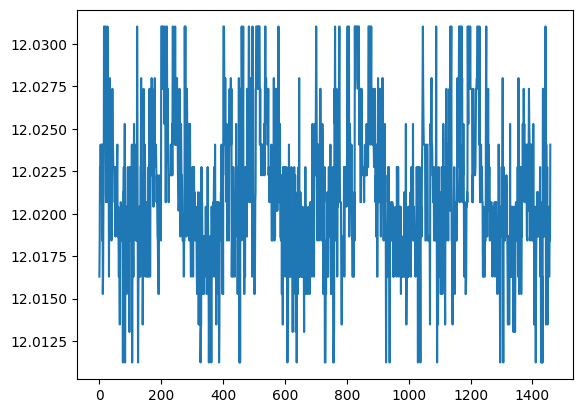

In [87]:
plt.plot(lgbm_pred)

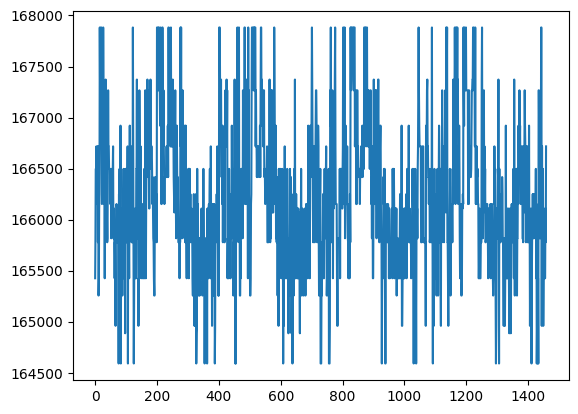

In [88]:
final_prediction = np.expm1(lgbm_pred)
plt.plot(final_prediction)

In [89]:
submission = pd.DataFrame( {'Id' : raw_test.Id, 
                           'SalePrice' : final_prediction})
submission.to_csv('lgbm_notencoded.csv',index=False)